In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import display

### Get article data by PMC ID

In [93]:
from Bio import Entrez

def get_article_data(pmcid):
    Entrez.email = "your-email@example.com"  # Replace with your email

    handle = Entrez.efetch(db="pmc", id=pmcid, rettype="medline", retmode="text")
    article_data = handle.read()
    # print(article_data)
    handle.close()

    title, abstract, authors, year, journal = None, "", [], None, None
    abstract_flag = False
    title_flag=False

    for line in article_data.splitlines():
        if line.startswith("TI  - "):
            title = line[6:]
            title_flag=True
        elif title_flag and line.startswith("  "):
            title += " " + line.strip()
        else:
            title_flag = False
        
        if line.startswith("AB  - "):
            abstract = line[6:]
            abstract_flag = True
        elif abstract_flag and line.startswith("  "):
            abstract += " " + line.strip()
        else:
            abstract_flag = False

        if line.startswith("FAU - "):
            authors.append(line[6:])
        elif line.startswith("DP  - "):
            year = line[6:].split(" ")[0]
        elif line.startswith("JT  - "):
            journal = line[6:]

    return {
        "title": title,
        "abstract": abstract,
        "authors": authors,
        "year": year,
        "journal": journal
    }
# Example usage
pmcid = "PMC10302623"  # Replace with the actual PMCID
article_info = get_article_data(pmcid)
print(article_info)

{'title': 'Phytochemicals as Antimicrobials: Prospecting Himalayan Medicinal Plants as Source of Alternate Medicine to Combat Antimicrobial Resistance.', 'abstract': 'Among all available antimicrobials, antibiotics hold a prime position in the treatment of infectious diseases. However, the emergence of antimicrobial resistance (AMR) has posed a serious threat to the effectiveness of antibiotics, resulting in increased morbidity, mortality, and escalation in healthcare costs causing a global health crisis. The overuse and misuse of antibiotics in global healthcare setups have accelerated the development and spread of AMR, leading to the emergence of multidrug-resistant (MDR) pathogens, which further limits treatment options. This creates a critical need to explore alternative approaches to combat bacterial infections. Phytochemicals have gained attention as a potential source of alternative medicine to address the challenge of AMR. Phytochemicals are structurally and functionally divers

### PMC datasets reading

In [12]:
pmc_labeled_path = "/home/echukhrova/nlp_project/labeled_tables/"

In [254]:
pmc100_orig = pd.read_csv(pmc_labeled_path+'PMC100.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc100_orig = pmc100_orig.rename(columns={'1':'food', '3':'bact', 'text_id':'pmcid'})
pmc95_orig = pd.read_csv(pmc_labeled_path+'PMC095.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc95_orig = pmc95_orig.rename(columns={'1':'food', '3':'bact', 'text_id':'pmcid'})
pmc90_orig = pd.read_csv(pmc_labeled_path+'PMC090.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc90_orig = pmc90_orig.rename(columns={'1':'food', '3':'bact', 'text_id':'pmcid'})
pmc85 = pd.read_csv(pmc_labeled_path+'PMC085.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc80 = pd.read_csv(pmc_labeled_path+'PMC080.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc75 = pd.read_csv(pmc_labeled_path+'PMC075.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc70 = pd.read_csv(pmc_labeled_path+'PMC070.csv').drop(['Unnamed: 0', '-1'], axis='columns')


In [239]:
pmc100_title = pd.read_csv(pmc_labeled_path+'PMC100_TITLE.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc100_title = pmc100_title.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})
pmc100_abstr = pd.read_csv(pmc_labeled_path+'PMC100_ABSTRACT.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc100_abstr = pmc100_abstr.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})

pmc95_title = pd.read_csv(pmc_labeled_path+'PMC095_TITLE.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc95_title = pmc95_title.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})
pmc95_abstr = pd.read_csv(pmc_labeled_path+'PMC095_ABSTRACT.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc95_abstr = pmc95_abstr.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})

pmc90_title = pd.read_csv(pmc_labeled_path+'PMC090_TITLE.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc90_title = pmc90_title.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})
pmc90_abstr = pd.read_csv(pmc_labeled_path+'PMC090_ABSTRACT.csv').drop(['Unnamed: 0', '-1'], axis='columns')
pmc90_abstr = pmc90_abstr.rename(columns={'1':'gut', '3':'microbiome', 'text_id':'pmcid'})

In [255]:
pmc100_gut = pmc100_abstr[(pmc100_abstr.gut > 0) & (pmc100_abstr.microbiome > 0)]
gut100_ind = pmc100_gut.pmcid
pmc100 = pmc100_orig[pmc100_orig.pmcid.isin(gut100_ind)]

pmc95_gut = pmc95_abstr[(pmc95_abstr.gut > 0) & (pmc95_abstr.microbiome > 0)]
gut95_ind = pmc95_gut.pmcid
pmc95 = pmc95_orig[pmc95_orig.pmcid.isin(gut95_ind)]

pmc90_gut = pmc90_abstr[(pmc90_abstr.gut > 0) & (pmc90_abstr.microbiome > 0)]
gut90_ind = pmc90_gut.pmcid
pmc90 = pmc90_orig[pmc90_orig.pmcid.isin(gut90_ind)]

In [256]:
print(f"Length of init PMC100 dataset: {len(pmc100_orig)}")
print(f"Length of 'gut' + 'microbiome' filtered PMC100 dataset: {len(pmc100)}, i.e. {len(pmc100)/len(pmc100_orig) * 100} %")

print(f"Length of init PMC95 dataset: {len(pmc95_orig)}")
print(f"Length of 'gut' + 'microbiome' filtered PMC095 dataset: {len(pmc95)}, i.e. {len(pmc95)/len(pmc95_orig)  * 100} %")

print(f"Length of init PMC90 dataset: {len(pmc90_orig)}")
print(f"Length of 'gut' + 'microbiome' filtered PMC090 dataset: {len(pmc90)}, i.e. {len(pmc90)/len(pmc90_orig)  * 100} %")


Length of init PMC100 dataset: 415559
Length of 'gut' + 'microbiome' filtered PMC100 dataset: 4040, i.e. 0.9721844551555857 %
Length of init PMC95 dataset: 435357
Length of 'gut' + 'microbiome' filtered PMC095 dataset: 4271, i.e. 0.9810339560406747 %
Length of init PMC90 dataset: 442682
Length of 'gut' + 'microbiome' filtered PMC090 dataset: 3813, i.e. 0.8613406463330336 %


In [250]:
len(set(pmc90_orig.pmcid.values).intersection(set(pmc95_orig.pmcid.values))) + \
len(set(pmc100_orig.pmcid.values).intersection(set(pmc95_orig.pmcid.values))) + \
len(set(pmc90_orig.pmcid.values).intersection(set(pmc100_orig.pmcid.values)))

0

In [264]:
print("PMC100 statistics:")
display(eval_len_for_two_bounds(pmc100, food_bounds = [0, 10, 50, 100, 500, 1000], bact_bounds =[0, 10, 50,100,300]))
print("---------------------------------")
print("PMC95 statistics:")
display(eval_len_for_two_bounds(pmc95, food_bounds = [0, 10, 50, 100, 500, 1000], bact_bounds =[0, 10, 50,100,300]))
print("---------------------------------")
print("PMC90 statistics:")
display(eval_len_for_two_bounds(pmc90, food_bounds = [0, 10, 50, 100, 500, 1000], bact_bounds =[0, 10, 50,100,300]))

PMC100 statistics:


food,0,10,50,100,500,1000
bact,,,,,,
0,3563,2580,952,358,5,0
10,2577,1921,704,272,5,0
50,702,528,198,79,3,0
100,162,118,50,23,2,0
300,4,2,1,1,0,0


---------------------------------
PMC95 statistics:


food,0,10,50,100,500,1000
bact,,,,,,
0,3724,2677,966,388,2,0
10,2644,1941,685,265,1,0
50,725,550,200,83,0,0
100,185,150,66,24,0,0
300,4,4,1,0,0,0


---------------------------------
PMC90 statistics:


food,0,10,50,100,500,1000
bact,,,,,,
0,3323,2344,883,347,3,0
10,2347,1696,648,270,3,0
50,687,502,179,81,3,0
100,159,127,52,23,3,0
300,3,3,1,0,0,0


### Many food articles

In [168]:
pmc100.text_id[pmc100['1'] > 500].values

array(['PMC10459315', 'PMC10136752', 'PMC10135282', 'PMC10005405',
       'PMC10493557', 'PMC10221066'], dtype=object)

In [169]:
many_food_pmc = ['PMC10459315', 'PMC10136752', 'PMC10135282', 'PMC10005405',
       'PMC10493557', 'PMC10221066']
many_food_articles_info = {}
for pmcid in many_food_pmc:# Replace with the actual PMCID
    article_info = get_article_data(pmcid)
    many_food_articles_info[pmcid] = article_info

In [170]:
for pmcid in many_food_articles_info:
    print(pmcid+': "'+many_food_articles_info[pmcid]['title']+'"\n')

PMC10459315: "Is There More to Olive Oil than Healthy Lipids?"

PMC10136752: "Integrated Microbiota and Metabolite Changes following Rice Bran Intake during Murine Inflammatory Colitis-Associated Colon Cancer and in Colorectal Cancer Survivors."

PMC10135282: "Dietary Phenolic Compounds: Their Health Benefits and Association with the Gut Microbiota."

PMC10005405: "The Role of Phytochemicals and Gut Microbiome in Atherosclerosis in Preclinical Mouse Models."

PMC10493557: "Effect of Consumption of Animal Products on the Gut Microbiome Composition and Gut Health."

PMC10221066: "Fermented Beverage Benefits: A Comprehensive Review and Comparison of Kombucha and Kefir Microbiome."



### Many bact articles

In [172]:
pmc100.text_id[pmc100['3'] > 300].values

array(['PMC10052337', 'PMC10437823', 'PMC10003303', 'PMC10030519'],
      dtype=object)

In [173]:
many_bact_pmc = ['PMC10052337', 'PMC10437823', 'PMC10003303', 'PMC10030519']
many_bact_articles_info = {}
for pmcid in many_bact_pmc:# Replace with the actual PMCID
    article_info = get_article_data(pmcid)
    many_bact_articles_info[pmcid] = article_info

In [174]:
for pmcid in many_bact_articles_info:
    print(pmcid+': "'+many_bact_articles_info[pmcid]['title']+'"\n')

PMC10052337: "The Gut Microbiome of an Indigenous Agropastoralist Population in a Remote Area of Colombia with High Rates of Gastrointestinal Infections and Dysbiosis."

PMC10437823: "Attention Deficit Hyperactivity Disorder (ADHD) and the gut microbiome: An ecological perspective."

PMC10003303: "Key Stratification of Microbiota Taxa and Metabolites in the Host Metabolic Health–Disease Balance."

PMC10030519: "Gut and airway microbiota dysbiosis and their role in COVID-19 and long-COVID."



### Try to find relevant articles

In [176]:
bound = 40
pmc100_food_bact_bound = pmc100.text_id[(pmc100['1'] > bound) & (pmc100['3'] > bound)].values
print(f"Length of the {bound} bound pmc articles set is {len(pmc100_food_bact_bound)}")
# pmc100_food_bact_bound

Length of the 40 bound pmc articles set is 330


In [101]:
many_bact_articles_info = {}
for pmcid in tqdm(pmc100_food_bact_bound):# Replace with the actual PMCID
    article_info = get_article_data(pmcid)
    many_bact_articles_info[pmcid] = article_info
    print(article_info['title'])

  0%|                                                                                  | 1/1030 [00:01<21:32,  1.26s/it]

The Efficacy of Bacteriocins Against Biofilm-Producing Bacteria Causing Bovine Clinical Mastitis in Dairy Farms: A New Strategy.


  0%|▏                                                                                 | 2/1030 [00:02<16:55,  1.01it/s]

Effects of Mexican Ganoderma lucidum extracts on liver, kidney, and the gut microbiota of Wistar rats: A repeated dose oral toxicity study.


  0%|▏                                                                                 | 3/1030 [00:02<15:24,  1.11it/s]

Maternal microbe-specific modulation of the offspring microbiome and development  during pregnancy and lactation.


  0%|▎                                                                                 | 4/1030 [00:03<13:51,  1.23it/s]

bettercallsal: better calling of Salmonella serotypes from enrichment cultures using shotgun metagenomic profiling and its application in an outbreak setting.


  0%|▍                                                                                 | 5/1030 [00:04<12:48,  1.33it/s]

Immunomodulatory effects of inulin and its intestinal metabolites.


  1%|▍                                                                                 | 6/1030 [00:04<12:41,  1.35it/s]

Differential Salmonella Typhimurium intracellular replication and host cell responses in caecal and ileal organoids derived from chicken.


  1%|▌                                                                                 | 7/1030 [00:05<12:46,  1.33it/s]

IgYs: on her majesty’s secret service.


  1%|▋                                                                                 | 8/1030 [00:06<12:07,  1.41it/s]

Fever integrates antimicrobial defences, inflammation control, and tissue repair  in a cold-blooded vertebrate.


  1%|▋                                                                                 | 9/1030 [00:06<11:47,  1.44it/s]

Impact of intercropping grass on the soil rhizosphere microbial community and soil ecosystem function in a walnut orchard.


  1%|▊                                                                                | 10/1030 [00:07<12:16,  1.38it/s]

Biodiversity of Endophytic Microbes in Diverse Tea Chrysanthemum Cultivars and Their Potential Promoting Effects on Plant Growth and Quality.


  1%|▊                                                                                | 11/1030 [00:08<11:48,  1.44it/s]

Prevalence and Biological Characteristics of Listeria Species Isolated from Livestock and Poultry Meat in Gansu Province, China.


  1%|▉                                                                                | 12/1030 [00:09<12:16,  1.38it/s]

Alternative approaches to therapeutics and subtherapeutics for sustainable poultry production.


  1%|█                                                                                | 13/1030 [00:09<12:10,  1.39it/s]

Changes in the gut microbiota of NOD mice in response to an oral Salmonella-based vaccine against type 1 diabetes.


  1%|█                                                                                | 14/1030 [00:10<11:43,  1.44it/s]

Microbiota Composition during Fermentation of Broomcorn Millet Huangjiu and Their Effects on Flavor Quality.


  1%|█▏                                                                               | 15/1030 [00:11<11:56,  1.42it/s]

Application and Effect of Pediococcus pentosaceus and Lactiplantibacillus plantarum as Starter Cultures on Bacterial Communities and Volatile Flavor Compounds of Zhayu, a Chinese Traditional Fermented Fish Product.


  2%|█▎                                                                               | 16/1030 [00:12<12:24,  1.36it/s]

Abundance and prevalence of ESBL coding genes in patients undergoing first line eradication therapy for Helicobacter pylori.


  2%|█▎                                                                               | 17/1030 [00:12<11:59,  1.41it/s]

Microbiological Survey and Antimicrobial Resistance of Foodborne Bacteria in Select Meat Products and Ethnic Food Products Procured from Food Desert Retail Outlets in Central Virginia, USA.


  2%|█▍                                                                               | 18/1030 [00:13<14:49,  1.14it/s]

An Integrated Approach to Skeletal Muscle Health in Aging.


  2%|█▍                                                                               | 19/1030 [00:14<13:53,  1.21it/s]

Feed nutritional composition affects the intestinal microbiota and digestive enzyme activity of black soldier fly larvae.


  2%|█▌                                                                               | 20/1030 [00:15<13:16,  1.27it/s]

Intramammary Infusion of Micronised Purified Flavonoid Fraction (MPFF) in Mastitis-Diagnosed Dairy Cows Naturally Infected by Staphylococcus spp. in the Late Lactation.


  2%|█▋                                                                               | 21/1030 [00:16<12:38,  1.33it/s]

Environmental Factors Influencing Occurrence of Vibrio parahaemolyticus and Vibrio vulnificus.


  2%|█▋                                                                               | 22/1030 [00:16<12:12,  1.38it/s]

Evaluation of the growth-inducing efficacy of various Bacillus species on the salt-stressed tomato (Lycopersicon esculentum Mill.).


  2%|█▊                                                                               | 23/1030 [00:17<11:51,  1.42it/s]

A Scoping Review of Genus Viscum: Biological and Chemical Aspects of Alcoholic Extracts.


  2%|█▉                                                                               | 24/1030 [00:18<11:51,  1.41it/s]

Diversity of common bean rhizobia in blackland of northeastern China and their symbiotic compatibility with two host varieties.


  2%|█▉                                                                               | 25/1030 [00:18<11:36,  1.44it/s]

Combined effect of physico-chemical and microbial quality of breeding habitat water on oviposition of malarial vector Anopheles subpictus.


  3%|██                                                                               | 26/1030 [00:19<14:29,  1.15it/s]

Together or Alone: Evaluating the Pathogen Inhibition Potential of Bacterial Cocktails against an Amphibian Pathogen.


  3%|██                                                                               | 27/1030 [00:20<13:46,  1.21it/s]

Microbial community succession and volatile compounds changes during spontaneous  fermentation of Cabernet Sauvignon (Vitis vinifera L.) under rain-shelter cultivation.


  3%|██▏                                                                              | 28/1030 [00:21<13:25,  1.24it/s]

Use of Shotgun Metagenomics to Assess the Microbial Diversity and Hydrocarbons Degrading Functions of Auto-Mechanic Workshops Soils Polluted with Gasoline and Diesel Fuel.


  3%|██▎                                                                              | 29/1030 [00:22<12:56,  1.29it/s]

Investigating causal associations among gut microbiota, metabolites, and liver diseases: a Mendelian randomization study.


  3%|██▎                                                                              | 30/1030 [00:22<12:48,  1.30it/s]

Supplemental Clostridium butyricum modulates lipid metabolism by reshaping the gut microbiota composition and bile acid profile in IUGR suckling piglets.


  3%|██▍                                                                              | 31/1030 [00:23<12:27,  1.34it/s]

Semi-Quantitative Biosecurity Assessment Framework Targeting Prevention of the Introduction and Establishment of Salmonella Dublin in Dairy Cattle Herds.


  3%|██▌                                                                              | 32/1030 [00:24<12:05,  1.38it/s]

Genomic features of Klebsiella isolates from artisanal ready-to-eat food production facilities.


  3%|██▌                                                                              | 33/1030 [00:25<12:14,  1.36it/s]

Nutraceuticals Prepared with Specific Strains of Probiotics for Supplementing Gut Microbiota in Hosts Allergic to Certain Foods or Their Additives.


  3%|██▋                                                                              | 34/1030 [00:26<14:38,  1.13it/s]

Soybean Oil Regulates the Fatty Acid Synthesis II System of Bacillus amyloliquefaciens LFB112 by Activating Acetyl-CoA Levels.


  3%|██▊                                                                              | 35/1030 [00:26<13:41,  1.21it/s]

Uncultured Microorganisms and Their Functions in the Fermentation Systems of Traditional Chinese Fermented Foods.


  3%|██▊                                                                              | 36/1030 [00:27<13:38,  1.21it/s]

Alterations in fecal β-defensin-3 secretion as a marker of instability of the gut microbiota.


  4%|██▉                                                                              | 37/1030 [00:28<13:14,  1.25it/s]

A non-antibiotic-disrupted gut microbiome associated with clinical responses to CD19-CAR-T cell cancer immunotherapy.


  4%|██▉                                                                              | 38/1030 [00:29<13:07,  1.26it/s]

The Effect of Exercise Prescription on the Human Gut Microbiota and Comparison between Clinical and Apparently Healthy Populations: A Systematic Review.


  4%|███                                                                              | 39/1030 [00:30<16:13,  1.02it/s]

Prevalence, antibiotic resistance patterns, and biofilm formation ability of Enterobacterales recovered from food of animal origin in Egypt.


  4%|███▏                                                                             | 40/1030 [00:31<14:52,  1.11it/s]

Four Novel Caudoviricetes Bacteriophages Isolated from Baltic Sea Water Infect Colonizers of Aurelia aurita.


  4%|███▏                                                                             | 41/1030 [00:32<14:08,  1.17it/s]

Internalization of Salmonella in Leafy Vegetables during Postharvest Conditions.


  4%|███▎                                                                             | 42/1030 [00:32<13:29,  1.22it/s]

Microbial and Physico-Chemical Characterization of Cold Smoked Sea Bass (Dicentrarchus labrax), a New Product of Fishery.


  4%|███▍                                                                             | 43/1030 [00:35<23:02,  1.40s/it]

Gut Microbiome–Brain Alliance: A Landscape View into Mental and Gastrointestinal  Health and Disorders.


  4%|███▍                                                                             | 44/1030 [00:37<23:38,  1.44s/it]

SARS-CoV-2 and Its Bacterial Co- or Super-Infections Synergize to Trigger COVID-19 Autoimmune Cardiopathies.


  4%|███▌                                                                             | 45/1030 [00:39<27:12,  1.66s/it]

Ralstonia chuxiongensis sp. nov., Ralstonia mojiangensis sp. nov., and Ralstonia  soli sp. nov., isolated from tobacco fields, are three novel species in the family Burkholderiaceae.


  4%|███▌                                                                             | 46/1030 [00:40<22:57,  1.40s/it]

Diversity, composition, and networking of saliva microbiota distinguish the severity of COVID-19 episodes as revealed by an analysis of 16S rRNA variable V1-V3 region sequences.


  5%|███▋                                                                             | 47/1030 [00:41<19:59,  1.22s/it]

Modifications of lung microbiota structure in traumatic brain injury ventilated patients according to time and enteral feeding formulas: a prospective randomized study.


  5%|███▊                                                                             | 48/1030 [00:41<17:44,  1.08s/it]

Effect of the Types of Starter on Microbiological and Physicochemical Properties  of Dry-Cured Ham.


  5%|███▊                                                                             | 49/1030 [00:42<16:05,  1.02it/s]

Ecology and resistance to UV light and antibiotics of microbial communities on UV cabins in the dermatology service of a Spanish hospital.


  5%|███▉                                                                             | 50/1030 [00:43<17:07,  1.05s/it]

A Review of Carbapenem Resistance in Enterobacterales and Its Detection Techniques.


  5%|████                                                                             | 51/1030 [00:44<15:37,  1.04it/s]

Bacterial ACC deaminase: Insights into enzymology, biochemistry, genetics, and potential role in amelioration of environmental stress in crop plants.


  5%|████                                                                             | 52/1030 [00:45<14:18,  1.14it/s]

A single bacterial genus maintains root growth in a complex microbiome.


  5%|████▏                                                                            | 53/1030 [00:45<13:26,  1.21it/s]

Enhanced mitochondrial activity reshapes a gut microbiota profile that delays NASH progression.


  5%|████▏                                                                            | 54/1030 [00:46<12:54,  1.26it/s]

Dietary fiber during gestation improves lactational feed intake of sows by modulating gut microbiota.


  5%|████▎                                                                            | 55/1030 [00:47<12:39,  1.28it/s]

Enterobacter asburiae E7, a Novel Potential Probiotic, Enhances Resistance to Aeromonas veronii Infection via Stimulating the Immune Response in Common Carp (Cyprinus carpio).


  5%|████▍                                                                            | 56/1030 [00:48<12:16,  1.32it/s]

Diversity and characteristics of plant immunity–activating bacteria from Brassicaceae plants.


  6%|████▍                                                                            | 57/1030 [00:48<12:25,  1.31it/s]

Isolation, Characterization, and Comparative Genomic Analysis of Bacteriophage Ec_MI-02 from Pigeon Feces Infecting Escherichia coli O157:H7.


  6%|████▌                                                                            | 58/1030 [00:49<12:06,  1.34it/s]

Characterization of trehalolipid biosurfactant produced by the novel marine strain Rhodococcus sp. SP1d and its potential for environmental applications.


  6%|████▋                                                                            | 59/1030 [00:50<12:19,  1.31it/s]

An agroecological structure model of compost—soil—plant interactions for sustainable organic farming.


  6%|████▋                                                                            | 60/1030 [00:51<12:07,  1.33it/s]

Microbiome analysis of thai traditional fermented soybeans reveals short-chain fatty acid-associated bacterial taxa.


  6%|████▊                                                                            | 61/1030 [00:51<12:20,  1.31it/s]

Astragaloside IV ameliorate acute alcohol-induced liver injury in mice via modulating gut microbiota and regulating NLRP3/caspase-1 signaling pathway.


  6%|████▉                                                                            | 62/1030 [00:52<12:15,  1.32it/s]

A catalog of bacterial reference genomes from cultivated human oral bacteria.


  6%|████▉                                                                            | 63/1030 [00:53<12:23,  1.30it/s]

Seasonal Shifts in Bacterial Community Structures in the Lateral Root of Sugar Beet Grown in an Andosol Field in Japan.


  6%|█████                                                                            | 64/1030 [00:54<11:50,  1.36it/s]

Metagenomic and culture-dependent approaches unveil active microbial community and novel functional genes involved in arsenic mobilization and detoxification in groundwater.


  6%|█████                                                                            | 65/1030 [00:54<11:40,  1.38it/s]

Efficacy of soy protein concentrate replacing animal protein supplements in mucosa-associated microbiota, intestinal health, and growth performance of nursery pigs.


  6%|█████▏                                                                           | 66/1030 [00:55<11:44,  1.37it/s]

Phytochemicals as Antimicrobials: Prospecting Himalayan Medicinal Plants as Source of Alternate Medicine to Combat Antimicrobial Resistance.


  7%|█████▎                                                                           | 67/1030 [00:56<11:30,  1.39it/s]

Isolation and characterization of the lactobacillus strain from honey and its probiotic properties.


  7%|█████▎                                                                           | 68/1030 [00:56<11:32,  1.39it/s]

The Application of Phenolic Acids in The Obtainment of Packaging Materials Based  on Polymers—A Review.


  7%|█████▍                                                                           | 69/1030 [00:57<11:11,  1.43it/s]

Identification and Characterization of a Potential Probiotic, Clostridium butyricum G13, Isolated from the Intestine of the Mud Crab (Scylla paramamosain).


  7%|█████▌                                                                           | 70/1030 [00:59<15:31,  1.03it/s]

Probiotic Potential and Safety Assessment of Type Strains of Weissella and Periweissella Species.


  7%|█████▌                                                                           | 71/1030 [01:00<15:01,  1.06it/s]

Stability of Bacillus and Enterococcus faecium 669 Probiotic Strains When Added to Different Feed Matrices Used in Dairy Production.


  7%|█████▋                                                                           | 72/1030 [01:00<14:23,  1.11it/s]

Phage Endolysins: Advances in the World of Food Safety.


  7%|█████▋                                                                           | 73/1030 [01:01<13:37,  1.17it/s]

Effects of grain-based diets on the rumen and fecal bacterial communities of the  North American bison (Bison bison).


  7%|█████▊                                                                           | 74/1030 [01:02<13:05,  1.22it/s]

Antimicrobial Drug Resistance in Poultry Production: Current Status and Innovative Strategies for Bacterial Control.


  7%|█████▉                                                                           | 75/1030 [01:03<13:46,  1.16it/s]

Core species and interactions prominent in fish-associated microbiome dynamics.


  7%|█████▉                                                                           | 76/1030 [01:04<13:11,  1.21it/s]

Biosynthesis of Nanoparticles Using Plant Extracts and Essential Oils.


  7%|██████                                                                           | 77/1030 [01:04<12:30,  1.27it/s]

Assessment of potential pathogenic bacterial load and multidrug resistance in locally manufactured cosmetics commonly used in Dhaka metropolis.


  8%|██████▏                                                                          | 78/1030 [01:05<12:00,  1.32it/s]

Sodium Humate-Derived Gut Microbiota Ameliorates Intestinal Dysfunction Induced by Salmonella Typhimurium in Mice.


  8%|██████▏                                                                          | 79/1030 [01:06<11:40,  1.36it/s]

Development of the intestinal microbiome in cystic fibrosis in early life.


  8%|██████▎                                                                          | 80/1030 [01:06<12:10,  1.30it/s]

Biocontrol of Soft Rot Dickeya and Pectobacterium Pathogens by Broad-Spectrum Antagonistic Bacteria within Paenibacillus polymyxa Complex.


  8%|██████▎                                                                          | 81/1030 [01:07<11:54,  1.33it/s]

Antibiotic Resistance, Virulence Gene Detection, and Biofilm Formation in Aeromonas spp. Isolated from Fish and Humans in Egypt.


  8%|██████▍                                                                          | 82/1030 [01:08<11:29,  1.38it/s]

Characterization of two novel lytic bacteriophages having lysis potential against MDR avian pathogenic Escherichia coli strains of zoonotic potential.


  8%|██████▌                                                                          | 83/1030 [01:08<11:10,  1.41it/s]

Bacterial Diversity on Historical Audio-Visual Materials and in the Atmosphere of Czech Depositories.


  8%|██████▌                                                                          | 84/1030 [01:09<11:17,  1.40it/s]

Aquaculture ecosystem microbiome at the water-fish interface: the case-study of rainbow trout fed with Tenebrio molitor novel diets.


  8%|██████▋                                                                          | 85/1030 [01:10<11:32,  1.37it/s]

Epidemiological characteristics of Vibrio parahaemolyticus outbreaks, Zhejiang, China, 2010–2022.


  8%|██████▊                                                                          | 86/1030 [01:11<11:27,  1.37it/s]

Epidemiology of Resistance Determinants Identified in Meropenem-Nonsusceptible Enterobacterales Collected as Part of a Global Surveillance Study, 2018 to 2019.


  8%|██████▊                                                                          | 87/1030 [01:11<11:26,  1.37it/s]

Different Types of Hypericum perforatum cvs. (Elixir, Helos, Topas) In Vitro Cultures: A Rich Source of Bioactive Metabolites and Biological Activities of Biomass Extracts.


  9%|██████▉                                                                          | 88/1030 [01:12<11:13,  1.40it/s]

Temporal Microbial Dynamics in Feces Discriminate by Nutrition, Fecal Color, Consistency and Sample Type in Suckling and Newly Weaned Piglets.


  9%|██████▉                                                                          | 89/1030 [01:13<11:36,  1.35it/s]

The emerging role of the small intestinal microbiota in human health and disease.


  9%|███████                                                                          | 90/1030 [01:14<11:23,  1.38it/s]

Cyanobacterial Harmful Algal Bloom Toxin Microcystin and Increased Vibrio Occurrence as Climate-Change-Induced Biological Co-Stressors: Exposure and Disease Outcomes via Their Interaction with Gut–Liver–Brain Axis.


  9%|███████▏                                                                         | 91/1030 [01:14<11:14,  1.39it/s]

Modulatory Effects of Co-Fermented Pu-erh Tea with Aqueous Corn Silk Extract on Gut Microbes and Fecal Metabolites in Mice Fed High-Fat Diet.


  9%|███████▏                                                                         | 92/1030 [01:15<11:40,  1.34it/s]

Diversity and composition of gut microbiota in healthy individuals and patients at different stages of hepatitis B virus-related liver disease.


  9%|███████▎                                                                         | 93/1030 [01:16<11:39,  1.34it/s]

Pathogenic Bacteria and Their Antibiotic Resistance Patterns in Milk, Yoghurt and Milk Contact Surfaces in Debre Berhan Town, Ethiopia.


  9%|███████▍                                                                         | 94/1030 [01:17<11:34,  1.35it/s]

An intracellular phosphorus-starvation signal activates the PhoB/PhoR two-component system in Salmonella enterica.


  9%|███████▍                                                                         | 95/1030 [01:17<11:25,  1.36it/s]

Assessing the Prevalence and Potential Risks of Salmonella Infection Associated with Fresh Salad Vegetable Consumption in the United Arab Emirates.


  9%|███████▌                                                                         | 96/1030 [01:18<11:03,  1.41it/s]

Tea Tree Oil: Properties and the Therapeutic Approach to Acne—A Review.


  9%|███████▋                                                                         | 97/1030 [01:19<13:02,  1.19it/s]

Design and Synthesis of Novel Antimicrobial Agents.


 10%|███████▋                                                                         | 98/1030 [01:20<12:47,  1.21it/s]

Comparative Genomic Analysis of a Novel Vibrio sp. Isolated from an Ulcer Disease Event in Atlantic Salmon (Salmo salar).


 10%|███████▊                                                                         | 99/1030 [01:21<12:05,  1.28it/s]

Medicinal plants of Jordan: Scoping review.


 10%|███████▊                                                                        | 100/1030 [01:21<11:38,  1.33it/s]

Infant gut microbiota colonization: influence of prenatal and postnatal factors,  focusing on diet.


 10%|███████▊                                                                        | 101/1030 [01:22<11:11,  1.38it/s]

Moringa oleifera Leaf Powder as New Source of Protein-Based Feedstuff Improves Growth Performance and Cecal Microbial Diversity of Broiler Chicken.


 10%|███████▉                                                                        | 102/1030 [01:23<11:36,  1.33it/s]

The fermented product of high-yield surfactin strain Bacillus subtilis LYS1 improves the growth performance and intestinal villi morphology in broilers.


 10%|████████                                                                        | 103/1030 [01:24<12:19,  1.25it/s]

Ultrasound Technology as Inactivation Method for Foodborne Pathogens: A Review.


 10%|████████                                                                        | 104/1030 [01:24<12:05,  1.28it/s]

Maternal-infant antibiotic resistance genes transference: what do we know?


 10%|████████▏                                                                       | 105/1030 [01:25<13:13,  1.17it/s]

A Narrative Review of Human Clinical Trials to Improve Lactose Digestion and Tolerance by Feeding Bifidobacteria or Galacto-Oligosacharides.


 10%|████████▏                                                                       | 106/1030 [01:26<12:22,  1.24it/s]

In Situ Inactivation of Selected Bacillus Strains in Brewer’s Spent Grain during  Fermentation by Lactococcus lactis ATCC 11454—The Possibility of Post-Production Residues Management.


 10%|████████▎                                                                       | 107/1030 [01:27<11:54,  1.29it/s]

Silicate solubilizing and plant growth promoting bacteria interact with biogenic  silica to impart heat stress tolerance in rice by modulating physiology and gene expression.


 10%|████████▍                                                                       | 108/1030 [01:28<14:23,  1.07it/s]

Prebiotics for depression: how does the gut microbiota play a role?


 11%|████████▍                                                                       | 109/1030 [01:29<13:33,  1.13it/s]

Plant-Based Dietary Fibers and Polysaccharides as Modulators of Gut Microbiota in Intestinal and Lung Inflammation: Current State and Challenges.


 11%|████████▌                                                                       | 110/1030 [01:30<14:11,  1.08it/s]

Cinnamaldehyde Restores Ceftriaxone Susceptibility against Multidrug-Resistant Salmonella.


 11%|████████▌                                                                       | 111/1030 [01:31<13:36,  1.13it/s]

A cross-sectional study observing the association of psychosocial stress and dietary intake with gut microbiota genera and alpha diversity among a young adult cohort of black and white women in Birmingham, Alabama.


 11%|████████▋                                                                       | 112/1030 [01:32<13:12,  1.16it/s]

Deciphering the mechanism of jujube vinegar on hyperlipoidemia through gut microbiome based on 16S rRNA, BugBase analysis, and the stamp analysis of KEEG.


 11%|████████▊                                                                       | 113/1030 [01:32<12:33,  1.22it/s]

Freshwater transfer affected intestinal microbiota with correlation to cytokine gene expression in Asian sea bass.


 11%|████████▊                                                                       | 114/1030 [01:33<12:20,  1.24it/s]

Morphological and physiological adaptations of psychrophilic Pseudarthrobacter psychrotolerans YJ56 under temperature stress.


 11%|████████▉                                                                       | 115/1030 [01:34<12:09,  1.25it/s]

Egyptian propolis extract for functionalization of cellulose nanofiber/poly(vinyl alcohol) porous hydrogel along with characterization and biological applications.


 11%|█████████                                                                       | 116/1030 [01:35<12:18,  1.24it/s]

Seed endophytic bacterial profiling from wheat varieties of contrasting heat sensitivity.


 11%|█████████                                                                       | 117/1030 [01:35<11:34,  1.31it/s]

The Microbiota–Gut–Brain Axis: Psychoneuroimmunological Insights.


 11%|█████████▏                                                                      | 118/1030 [01:36<11:30,  1.32it/s]

Correlating the succession of microbial communities from Nigerian soils to petroleum biodegradation.


 12%|█████████▏                                                                      | 119/1030 [01:37<11:23,  1.33it/s]

A multiomic approach to defining the essential genome of the globally important pathogen Corynebacterium diphtheriae.


 12%|█████████▎                                                                      | 120/1030 [01:38<11:36,  1.31it/s]

The Role of Carbohydrate Intake on the Gut Microbiome: A Weight of Evidence Systematic Review.


 12%|█████████▍                                                                      | 121/1030 [01:38<11:25,  1.33it/s]

Effects of adding Sophora alopecuroides to high concentrate diet on rumen fermentation parameters and microbial diversity of sheep.


 12%|█████████▍                                                                      | 122/1030 [01:39<11:25,  1.32it/s]

A Review of Gut Microbiota‐Derived Metabolites in Tumor Progression and Cancer Therapy.


 12%|█████████▌                                                                      | 123/1030 [01:40<11:16,  1.34it/s]

Comprehensive Insights into Medicinal Research on Imidazole-Based Supramolecular  Complexes.


 12%|█████████▋                                                                      | 124/1030 [01:41<11:26,  1.32it/s]

Human gut microbiome: A primer for the clinician.


 12%|█████████▋                                                                      | 125/1030 [01:41<11:15,  1.34it/s]

Multi-omics reveals the mechanisms underlying Lactiplantibacillus plantarum P8-mediated attenuation of oxidative stress in broilers challenged with dexamethasone.


 12%|█████████▊                                                                      | 126/1030 [01:42<13:10,  1.14it/s]

Long-term fertilization coupled with rhizobium inoculation promotes soybean yield and alters soil bacterial community composition.


 12%|█████████▊                                                                      | 127/1030 [01:43<12:07,  1.24it/s]

Lung Microbiota: Its Relationship to Respiratory System Diseases and Approaches for Lung-Targeted Probiotic Bacteria Delivery.


 12%|█████████▉                                                                      | 128/1030 [01:44<11:34,  1.30it/s]

Probiotics to prevent necrotizing enterocolitis in very low birth weight infants: A network meta-analysis.


 13%|██████████                                                                      | 129/1030 [01:44<11:07,  1.35it/s]

Exploring the prevalence of antibiotic resistance patterns and drivers of antibiotics resistance of Salmonella in livestock and poultry-derived foods: a systematic review and meta-analysis in Bangladesh from 2000 to 2022.


 13%|██████████                                                                      | 130/1030 [01:45<11:03,  1.36it/s]

Concomitant Campylobacteriosis in a Puppy and in Its Caregiver: A One Health Perspective Paradigm in Human-Pet Relationship.


 13%|██████████▏                                                                     | 131/1030 [01:46<11:30,  1.30it/s]

The microbiota knows: handling-stress and diet transform the microbial landscape  in the gut content of rainbow trout in RAS.


 13%|██████████▎                                                                     | 132/1030 [01:47<11:47,  1.27it/s]

Biological nitrogen fixation in cereal crops: Progress, strategies, and perspectives.


 13%|██████████▎                                                                     | 133/1030 [01:48<12:52,  1.16it/s]

Campylobacter vaccination reduces diarrheal disease and infant growth stunting among rhesus macaques.


 13%|██████████▍                                                                     | 134/1030 [01:50<19:45,  1.32s/it]

Proposal to classify Ralstonia solanacearum phylotype I strains as Ralstonia nicotianae sp. nov., and a genomic comparison between members of the genus Ralstonia.


 13%|██████████▍                                                                     | 135/1030 [01:51<17:21,  1.16s/it]

Antimicrobial Usage, Susceptibility Profiles, and Resistance Genes in Campylobacter Isolated from Cattle, Chicken, and Water Samples in Kajiado County, Kenya.


 13%|██████████▌                                                                     | 136/1030 [01:52<15:34,  1.05s/it]

Natural Products and Biological Activity from Actinomycetes Associated with Marine Algae.


 13%|██████████▋                                                                     | 137/1030 [01:53<14:58,  1.01s/it]

Evaluation of Flathead Grey Mullets (Mugil cephalus) Immunization and Long-Term Protection against Vibrio harveyi Infection Using Three Different Vaccine Preparations.


 13%|██████████▋                                                                     | 138/1030 [01:53<13:28,  1.10it/s]

Characterization of a novel Jerseyvirus phage T102 and its inhibition effect on biofilms of multidrug-resistant Salmonella.


 13%|██████████▊                                                                     | 139/1030 [01:54<12:50,  1.16it/s]

Campylobacter prevalence from food, animals, human and environmental samples in Iran: a systematic review and meta-analysis.


 14%|██████████▊                                                                     | 140/1030 [01:55<12:10,  1.22it/s]

Role of human milk oligosaccharide metabolizing bacteria in the development of atopic dermatitis/eczema.


 14%|██████████▉                                                                     | 141/1030 [01:56<11:29,  1.29it/s]

Overexpression of human alpha-Synuclein leads to dysregulated microbiome/metabolites with ageing in a rat model of Parkinson disease.


 14%|███████████                                                                     | 142/1030 [01:56<11:18,  1.31it/s]

Ancient Clostridium DNA and variants of tetanus neurotoxins associated with human archaeological remains.


 14%|███████████                                                                     | 143/1030 [01:57<10:59,  1.34it/s]

Meat Consumption and Gut Microbiota: a Scoping Review of Literature and Systematic Review of Randomized Controlled Trials in Adults.


 14%|███████████▏                                                                    | 144/1030 [01:58<11:02,  1.34it/s]

Gegen-Qinlian decoction alleviates anxiety-like behaviors in methamphetamine-withdrawn mice by regulating Akkermansia and metabolism in the colon.


 14%|███████████▎                                                                    | 145/1030 [01:58<10:44,  1.37it/s]

Bacteria in the oral cavity of individuals consuming intoxicating substances.


 14%|███████████▎                                                                    | 146/1030 [01:59<10:31,  1.40it/s]

Mendelian randomization analyses reveal causal relationships between the human microbiome and longevity.


 14%|███████████▍                                                                    | 147/1030 [02:00<10:33,  1.39it/s]

Probiotic Escherichia coli Nissle 1917 protect chicks from damage caused by Salmonella enterica serovar Enteritidis colonization.


 14%|███████████▍                                                                    | 148/1030 [02:01<10:31,  1.40it/s]

Role of the Gut–Liver Axis in the Pathobiology of Cholangiopathies: Basic and Clinical Evidence.


 14%|███████████▌                                                                    | 149/1030 [02:01<10:45,  1.37it/s]

Microbial exopolysaccharides in the biomedical and pharmaceutical industries.


 15%|███████████▋                                                                    | 150/1030 [02:02<10:37,  1.38it/s]

Metagenomic analysis reveals specific BTEX degrading microorganisms of a bacterial consortium.


 15%|███████████▋                                                                    | 151/1030 [02:03<10:24,  1.41it/s]

ShlA toxin of Serratia induces P2Y2- and α5β1-dependent autophagy and bacterial clearance from host cells.


 15%|███████████▊                                                                    | 152/1030 [02:03<10:17,  1.42it/s]

Effects of Sodium Nitrate and Coated Methionine on Lactation Performance, Rumen Fermentation Characteristics, Amino Acid Metabolism, and Microbial Communities in Lactating Buffaloes.


 15%|███████████▉                                                                    | 153/1030 [02:04<10:40,  1.37it/s]

Bacteriological Quality and Biotoxin Profile of Ready-to-Eat Foods Vended in Lagos, Nigeria.


 15%|███████████▉                                                                    | 154/1030 [02:05<10:29,  1.39it/s]

Herbal medicine and its impact on the gut microbiota in colorectal cancer.


 15%|████████████                                                                    | 155/1030 [02:06<10:32,  1.38it/s]

Synergistic Fermentation with Functional Microorganisms Improves Safety and Quality of Traditional Chinese Fermented Foods.


 15%|████████████                                                                    | 156/1030 [02:06<10:12,  1.43it/s]

Babies, bugs and brains: How the early microbiome associates with infant brain and behavior development.


 15%|████████████▏                                                                   | 157/1030 [02:07<10:10,  1.43it/s]

Antibacterial activity of exopolysaccharide produced by bee gut-resident Enterococcus sp. BE11 against marine fish pathogens.


 15%|████████████▎                                                                   | 158/1030 [02:08<10:10,  1.43it/s]

Endophytic Bacillus atrophaeus CHGP13 and salicylic acid inhibit blue mold of lemon by regulating defense enzymes.


 15%|████████████▎                                                                   | 159/1030 [02:08<10:32,  1.38it/s]

Effect of High Hydrostatic Pressure Processing on the Microbiological Quality and Bacterial Diversity of Sous-Vide-Cooked Cod.


 16%|████████████▍                                                                   | 160/1030 [02:09<10:28,  1.38it/s]

Human milk oligosaccharides modulate the intestinal microbiome of healthy adults.


 16%|████████████▌                                                                   | 161/1030 [02:10<10:29,  1.38it/s]

Antimicrobial Resistance Profiles and Co-Existence of Multiple Antimicrobial Resistance Genes in mcr-Harbouring Colistin-Resistant Enterobacteriaceae Isolates Recovered from Poultry and Poultry Meats in Malaysia.


 16%|████████████▌                                                                   | 162/1030 [02:11<10:18,  1.40it/s]

The Caulobacter NtrB-NtrC two-component system bridges nitrogen assimilation and  cell development.


 16%|████████████▋                                                                   | 163/1030 [02:12<12:17,  1.18it/s]

Prevalence and antimicrobial resistance of Salmonella enterica serovars Enteritidis and Typhimurium isolated from retail chicken meat in Wasit markets, Iraq.


 16%|████████████▋                                                                   | 164/1030 [02:13<11:52,  1.21it/s]

Immunogenicity and Efficacy of a Feed-Based Bivalent Vaccine against Streptococcosis and Motile Aeromonad Septicemia in Red Hybrid Tilapia (Oreochromis sp.).


 16%|████████████▊                                                                   | 165/1030 [02:13<11:32,  1.25it/s]

Dynamic analysis of volatile metabolites and microbial community and their correlations during the fermentation process of traditional Huangjiu (Chinese rice wine) produced around Winter Solstice.


 16%|████████████▉                                                                   | 166/1030 [02:14<11:45,  1.22it/s]

SPI-1 virulence gene expression modulates motility of Salmonella Typhimurium in a proton motive force- and adhesins-dependent manner.


 16%|████████████▉                                                                   | 167/1030 [02:15<11:18,  1.27it/s]

Antioxidant Activity, Metabolism, and Bioavailability of Polyphenols in the Diet  of Animals.


 16%|█████████████                                                                   | 168/1030 [02:16<10:56,  1.31it/s]

Gut microbiota characteristics of Mongolian and Han populations in anti-tuberculosis drug-induced liver injury: a population-based case–control study.


 16%|█████████████▏                                                                  | 169/1030 [02:17<13:05,  1.10it/s]

In situ snapshots along a mammalian selective autophagy pathway.


 17%|█████████████▏                                                                  | 170/1030 [02:18<12:37,  1.14it/s]

Association between Mastitis Occurrence in Dairy Cows and Bedding Characteristics of Compost-Bedded Pack Barns.


 17%|█████████████▎                                                                  | 171/1030 [02:18<12:01,  1.19it/s]

Microbiological quality assessment of fresh produce: Potential health risk to children and urgent need for improved food safety in school feeding schemes.


 17%|█████████████▎                                                                  | 172/1030 [02:19<11:24,  1.25it/s]

Discovering the Potential Mechanisms of Medicinal Mushrooms Antidepressant Activity: A Review.


 17%|█████████████▍                                                                  | 173/1030 [02:20<11:02,  1.29it/s]

Nanomedicine for drug resistant pathogens and COVID-19 using mushroom nanocomposite inspired with bacteriocin – A review.


 17%|█████████████▌                                                                  | 174/1030 [02:21<10:52,  1.31it/s]

The integrated analysis of digestive physiology and gastrointestinal microbiota structure in Changle goose.


 17%|█████████████▌                                                                  | 175/1030 [02:21<11:00,  1.30it/s]

Recent Trends in Antimicrobial Resistance among Anaerobic Clinical Isolates.


 17%|█████████████▋                                                                  | 176/1030 [02:22<11:01,  1.29it/s]

Comprehensive insights on environmental adaptation strategies in Antarctic bacteria and biotechnological applications of cold adapted molecules.


 17%|█████████████▋                                                                  | 177/1030 [02:23<11:05,  1.28it/s]

Hybridization altered the gut microbiota of pigs.


 17%|█████████████▊                                                                  | 178/1030 [02:24<10:42,  1.33it/s]

Type I interferons drive MAIT cell functions against bacterial pneumonia.


 17%|█████████████▉                                                                  | 179/1030 [02:24<10:48,  1.31it/s]

A comprehensive review on production of bio-surfactants by bio-degradation of waste carbohydrate feedstocks: an approach towards sustainable development.


 17%|█████████████▉                                                                  | 180/1030 [02:25<10:45,  1.32it/s]

In Vivo Functional Properties of Dairy Bacteria.


 18%|██████████████                                                                  | 181/1030 [02:26<10:26,  1.35it/s]

Natural Antimicrobials for Listeria monocytogenes in Ready-to-Eat Meats: Current  Challenges and Future Prospects.


 18%|██████████████▏                                                                 | 182/1030 [02:27<12:17,  1.15it/s]

Bacteriological quality and safety of bottle food and associated factors among bottle-fed babies attending pediatric outpatient clinics of Government Health Institutions in Arba Minch, southern Ethiopia.


 18%|██████████████▏                                                                 | 183/1030 [02:28<11:40,  1.21it/s]

The global profile of antibiotic resistance in bacteria isolated from goats and sheep: A systematic review.


 18%|██████████████▎                                                                 | 184/1030 [02:29<14:04,  1.00it/s]

Whole genome sequence analysis of Aeromonas spp. isolated from ready-to-eat seafood: antimicrobial resistance and virulence factors.


 18%|██████████████▎                                                                 | 185/1030 [02:30<12:50,  1.10it/s]

Impact of Intestinal Microbiota on Growth Performance of Suckling and Weaned Piglets.


 18%|██████████████▍                                                                 | 186/1030 [02:31<12:55,  1.09it/s]

Screening for Multifarious Plant Growth Promoting and Biocontrol Attributes in Bacillus Strains Isolated from Indo Gangetic Soil for Enhancing Growth of Rice Crops.


 18%|██████████████▌                                                                 | 187/1030 [02:32<12:25,  1.13it/s]

Analysis of the microbial community structure and flavor components succession during salt‐reducing pickling process of zhacai (preserved mustard tuber).


 18%|██████████████▌                                                                 | 188/1030 [02:32<11:25,  1.23it/s]

Gastrointestinal symptoms of long COVID-19 related to the ectopic colonization of specific bacteria that move between the upper and lower alimentary tract and alterations in serum metabolites.


 18%|██████████████▋                                                                 | 189/1030 [02:33<13:25,  1.04it/s]

Analysis of the Antibacterial Properties of Compound Essential Oil and the Main Antibacterial Components of Unilateral Essential Oils.


 18%|██████████████▊                                                                 | 190/1030 [02:34<12:38,  1.11it/s]

Coffee-Associated Endophytes: Plant Growth Promotion and Crop Protection.


 19%|██████████████▊                                                                 | 191/1030 [02:35<11:38,  1.20it/s]

Isolation, identification, and screening of biosurfactant-producing and hydrocarbon-degrading bacteria from oil and gas industrial waste.


 19%|██████████████▉                                                                 | 192/1030 [02:36<10:49,  1.29it/s]

Evaluation of Phytochemical Screening, Pigment Content, In Vitro Antioxidant, Antibacterial Potential and GC-MS Metabolite Profiling of Green Seaweed Caulerpa racemosa.


 19%|██████████████▉                                                                 | 193/1030 [02:36<10:27,  1.33it/s]

Time-restricted feeding affects colonic nutrient substrates and modulates the diurnal fluctuation of microbiota in pigs.


 19%|███████████████                                                                 | 194/1030 [02:37<10:06,  1.38it/s]

Evolutionary investigations of the biosynthetic diversity in the skin microbiome  using lsaBGC.


 19%|███████████████▏                                                                | 195/1030 [02:38<09:57,  1.40it/s]

Therapeutic possibilities of gut microbiota modulation in acute decompensation of liver cirrhosis.


 19%|███████████████▏                                                                | 196/1030 [02:38<09:41,  1.44it/s]

Dynamic Changes of the Microbial Community and Volatile Organic Compounds of the  Northern Pike (Esox lucius) during Storage.


 19%|███████████████▎                                                                | 197/1030 [02:39<09:39,  1.44it/s]

Microbiome-liver crosstalk: A multihit therapeutic target for liver disease.


 19%|███████████████▍                                                                | 198/1030 [02:40<09:32,  1.45it/s]

Comparative safety analysis of newly prepackaged backed food products and those approaching the expiry date in Bangladesh.


 19%|███████████████▍                                                                | 199/1030 [02:40<09:31,  1.45it/s]

The association between oral and gut microbiota in male patients with alcohol dependence.


 19%|███████████████▌                                                                | 200/1030 [02:41<09:46,  1.41it/s]

Antibiotic-induced gut microbiota dysbiosis has a functional impact on purine metabolism.


 20%|███████████████▌                                                                | 201/1030 [02:42<10:02,  1.38it/s]

Characteristic Gut Bacteria in High Barley Consuming Japanese Individuals without Hypertension.


 20%|███████████████▋                                                                | 202/1030 [02:43<10:06,  1.37it/s]

Screening, Identification and Physiological Characteristics of Lactobacillus rhamnosus M3 (1) against Intestinal Inflammation.


 20%|███████████████▊                                                                | 203/1030 [02:43<09:51,  1.40it/s]

BopN is a Gatekeeper of the Bordetella Type III Secretion System.


 20%|███████████████▊                                                                | 204/1030 [02:44<09:51,  1.40it/s]

Whole genome characterization of thermophilic Campylobacter species isolated from dairy manure in small specialty crop farms of Northeast Ohio.


 20%|███████████████▉                                                                | 205/1030 [02:45<09:46,  1.41it/s]

Characterization of vB_ValM_PVA8, a broad-host-range bacteriophage infecting Vibrio alginolyticus and Vibrio parahaemolyticus.


 20%|████████████████                                                                | 206/1030 [02:45<09:48,  1.40it/s]

Evaluation of Bacillus aryabhattai B8W22 peroxidase for phenol removal in waste water effluents.


 20%|████████████████                                                                | 207/1030 [02:46<10:05,  1.36it/s]

Biochemical and structural basis of sialic acid utilization by gut microbes.


 20%|████████████████▏                                                               | 208/1030 [02:47<10:04,  1.36it/s]

Application of starch degrading bacteria from tobacco leaves in improving the flavor of flue-cured tobacco.


 20%|████████████████▏                                                               | 209/1030 [02:48<10:47,  1.27it/s]

Complete genome sequence and characterization of a novel Enterococcus faecium with probiotic potential isolated from the gut of Litopenaeus vannamei.


 20%|████████████████▎                                                               | 210/1030 [02:49<10:19,  1.32it/s]

Effects of Glucosinolate-Enriched Red Radish (Raphanus sativus) on In Vitro Models of Intestinal Microbiota and Metabolic Syndrome-Related Functionalities.


 20%|████████████████▍                                                               | 211/1030 [02:49<10:09,  1.34it/s]

Microgravity and evasion of plant innate immunity by human bacterial pathogens.


 21%|████████████████▍                                                               | 212/1030 [02:50<09:48,  1.39it/s]

Beneficial Effects of Bacillus amyloliquefaciens D1 Soy Milk Supplementation on Serum Biochemical Indexes and Intestinal Health of Bearded Chickens.


 21%|████████████████▌                                                               | 213/1030 [02:51<09:30,  1.43it/s]

Identification and characterization of opportunistic pathogen Pectobacterium polonicum causing potato blackleg in China.


 21%|████████████████▌                                                               | 214/1030 [02:51<09:20,  1.46it/s]

Antibiotic Resistance in Selected Emerging Bacterial Foodborne Pathogens—An Issue of Concern?


 21%|████████████████▋                                                               | 215/1030 [02:52<09:24,  1.44it/s]

Reprocessing of side-streams towards obtaining valuable bacterial metabolites.


 21%|████████████████▊                                                               | 216/1030 [02:53<09:11,  1.48it/s]

Advanced Organotypic In Vitro Model Systems for Host–Microbial Coculture.


 21%|████████████████▊                                                               | 217/1030 [02:53<09:16,  1.46it/s]

Microbiome modulation in the prevention and management of colorectal cancer: a systematic review of clinical interventions.


 21%|████████████████▉                                                               | 218/1030 [02:54<09:15,  1.46it/s]

Trichoderma species from plant and soil: An excellent resource for biosynthesis of terpenoids with versatile bioactivities.


 21%|█████████████████                                                               | 219/1030 [02:55<09:03,  1.49it/s]

The Gut–Liver Axis in Pediatric Liver Health and Disease.


 21%|█████████████████                                                               | 220/1030 [02:55<08:58,  1.50it/s]

Comprehensive Analysis of Bacteriocins Produced by the Hypermucoviscous Klebsiella pneumoniae Species Complex.


 21%|█████████████████▏                                                              | 221/1030 [02:56<08:54,  1.51it/s]

Ginger essential oil and citral ameliorates atherosclerosis in ApoE−/− mice by modulating trimethylamine-N-oxide and gut microbiota.


 22%|█████████████████▏                                                              | 222/1030 [02:57<08:53,  1.52it/s]

Newly Isolated Virulent Salmophages for Biocontrol of Multidrug-Resistant Salmonella in Ready-to-Eat Plant-Based Food.


 22%|█████████████████▎                                                              | 223/1030 [02:58<12:01,  1.12it/s]

Bacterial Pigments and Their Multifaceted Roles in Contemporary Biotechnology and Pharmacological Applications.


 22%|█████████████████▍                                                              | 224/1030 [02:59<11:40,  1.15it/s]

Characteristic flavor metabolic network of fish sauce microbiota with different fermentation processes based on metagenomics.


 22%|█████████████████▍                                                              | 225/1030 [03:00<11:02,  1.22it/s]

The role of intestine in metabolic dysregulation in murine Wilson disease.


 22%|█████████████████▌                                                              | 226/1030 [03:00<10:40,  1.26it/s]

Integrating current analyses of the breast cancer microbiome.


 22%|█████████████████▋                                                              | 227/1030 [03:01<10:01,  1.33it/s]

Multidrug resistant and multivirulent avian bacterial pathogens: tackling experimental leg disorders using phytobiotics and antibiotics alone or in combination.


 22%|█████████████████▋                                                              | 228/1030 [03:02<10:23,  1.29it/s]

Sustainable Ornamental Fish Aquaculture: The Implication of Microbial Feed Additives.


 22%|█████████████████▊                                                              | 229/1030 [03:02<10:01,  1.33it/s]

Virulence Factors of the Gut Microbiome Are Associated with BMI and Metabolic Blood Parameters in Children with Obesity.


 22%|█████████████████▊                                                              | 230/1030 [03:03<09:43,  1.37it/s]

A global data-driven census of Salmonella small proteins and their potential functions in bacterial virulence.


 22%|█████████████████▉                                                              | 231/1030 [03:04<09:33,  1.39it/s]

Review of Antimicrobial Nanocoatings in Medicine and Dentistry: Mechanisms of Action, Biocompatibility Performance, Safety, and Benefits Compared to Antibiotics.


 23%|██████████████████                                                              | 232/1030 [03:04<09:12,  1.44it/s]

Antimicrobial-Resistant Bacteria from Free-Living Green Turtles (Chelonia mydas).


 23%|██████████████████                                                              | 233/1030 [03:05<08:58,  1.48it/s]

Alterations in the gut microbiota and the efficacy of adjuvant probiotic therapy  in liver cirrhosis.


 23%|██████████████████▏                                                             | 234/1030 [03:06<09:06,  1.46it/s]

Prevalence and Types of Extended-Spectrum β-Lactamase-Producing Bacteria in Retail Seafood.


 23%|██████████████████▎                                                             | 235/1030 [03:06<09:04,  1.46it/s]

Effects of Ramadan intermittent fasting on gut microbiome: is the diet key?


 23%|██████████████████▎                                                             | 236/1030 [03:07<08:52,  1.49it/s]

Actinobacteria from Arctic and Atlantic deep-sea sediments—Biodiversity and bioactive potential.


 23%|██████████████████▍                                                             | 237/1030 [03:08<08:57,  1.48it/s]

Role of microbial inoculants as bio fertilizers for improving crop productivity:  A review.


 23%|██████████████████▍                                                             | 238/1030 [03:09<09:39,  1.37it/s]

Revisiting ESKAPE Pathogens: virulence, resistance, and combating strategies focusing on quorum sensing.


 23%|██████████████████▌                                                             | 239/1030 [03:09<09:19,  1.41it/s]

Protective effects of yeast extract against alcohol-induced liver injury in rats.


 23%|██████████████████▋                                                             | 240/1030 [03:10<09:18,  1.41it/s]

Clostridium butyricum and Chitooligosaccharides in Synbiotic Combination Ameliorate Symptoms in a DSS-Induced Ulcerative Colitis Mouse Model by Modulating Gut Microbiota and Enhancing Intestinal Barrier Function.


 23%|██████████████████▋                                                             | 241/1030 [03:11<09:12,  1.43it/s]

Benefits of Gut Microbiota Reconstitution by Beta 1,3–1,6 Glucans in Subjects with Autism Spectrum Disorder and Other Neurodegenerative Diseases.


 23%|██████████████████▊                                                             | 242/1030 [03:11<09:17,  1.41it/s]

The microbiota of Mozzarella di Bufala Campana PDO cheese: a study across the manufacturing process.


 24%|██████████████████▊                                                             | 243/1030 [03:12<09:13,  1.42it/s]

Three Klebsiella species as potential pathobionts generating endogenous ethanol in a clinical cohort of patients with auto-brewery syndrome: a case control study.


 24%|██████████████████▉                                                             | 244/1030 [03:13<09:41,  1.35it/s]

An insight on sources and biodegradation of bioplastics: a review.


 24%|███████████████████                                                             | 245/1030 [03:14<09:41,  1.35it/s]

Microbiome and virome on indoor surfaces of an Antarctic research ship.


 24%|███████████████████                                                             | 246/1030 [03:14<09:49,  1.33it/s]

Metaproteomics profiling of the microbial communities in fermentation starters (Daqu) during multi-round production of Chinese liquor.


 24%|███████████████████▏                                                            | 247/1030 [03:15<09:49,  1.33it/s]

Interaction and Metabolic Function of Microbiota during the Washed Processing of  Coffea arabica.


 24%|███████████████████▎                                                            | 248/1030 [03:16<09:51,  1.32it/s]

Assessing the Risk of Seasonal Effects of Campylobacter Contaminated Broiler Meat Prepared In-Home in the United States.


 24%|███████████████████▎                                                            | 249/1030 [03:17<09:51,  1.32it/s]

Linking microbial contamination to food spoilage and food waste: the role of smart packaging, spoilage risk assessments, and date labeling.


 24%|███████████████████▍                                                            | 250/1030 [03:17<09:37,  1.35it/s]

Modulation of the Gut Microbiota by Tomato Flours Obtained after Conventional and Ohmic Heating Extraction and Its Prebiotic Properties †.


 24%|███████████████████▍                                                            | 251/1030 [03:18<09:42,  1.34it/s]

Abrupt perturbation and delayed recovery of the vaginal ecosystem following childbirth.


 24%|███████████████████▌                                                            | 252/1030 [03:19<10:31,  1.23it/s]

Faecal Microbiota Transplantation, Paving the Way to Treat Non-Alcoholic Fatty Liver Disease.


 25%|███████████████████▋                                                            | 253/1030 [03:20<09:55,  1.30it/s]

Beneficial Bacteria Isolated from Food in Relation to the Next Generation of Probiotics.


 25%|███████████████████▋                                                            | 254/1030 [03:20<09:26,  1.37it/s]

A probiotic nanozyme hydrogel regulates vaginal microenvironment for Candida vaginitis therapy.


 25%|███████████████████▊                                                            | 255/1030 [03:21<09:22,  1.38it/s]

A Meta-Analysis of Bacterial Communities in Food Processing Facilities: Driving Forces for Assembly of Core and Accessory Microbiomes across Different Food Commodities.


 25%|███████████████████▉                                                            | 256/1030 [03:22<09:11,  1.40it/s]

Drug‑resistant Acinetobacter baumannii: From molecular mechanisms to potential therapeutics (Review).


 25%|███████████████████▉                                                            | 257/1030 [03:23<09:10,  1.40it/s]

A Review of the Antibacterial, Fungicidal and Antiviral Properties of Selenium Nanoparticles.


 25%|████████████████████                                                            | 258/1030 [03:23<08:58,  1.43it/s]

Application and Acceptability of Microbiomes in the Production Process of Nigerian Indigenous Foods: Drive towards Responsible Production and Consumption.


 25%|████████████████████                                                            | 259/1030 [03:24<08:49,  1.46it/s]

Regulation Transcriptional of Antibiotic Resistance Genes (ARGs) in Bacteria Isolated from WWTP.


 25%|████████████████████▏                                                           | 260/1030 [03:25<08:46,  1.46it/s]

Chicken cecal microbiota reduces abdominal fat deposition by regulating fat metabolism.


 25%|████████████████████▎                                                           | 261/1030 [03:25<08:33,  1.50it/s]

Sole microbiome progression in a hatchery life cycle, from egg to juvenile.


 25%|████████████████████▎                                                           | 262/1030 [03:26<08:31,  1.50it/s]

A systematic review and meta-analysis of the sources of Campylobacter in poultry  production (preharvest) and their relative contributions to the microbial risk of poultry meat.


 26%|████████████████████▍                                                           | 263/1030 [03:27<08:35,  1.49it/s]

Intestinal flora: A new target for traditional Chinese medicine to improve lipid  metabolism disorders.


 26%|████████████████████▌                                                           | 264/1030 [03:27<08:36,  1.48it/s]

Atypical flavobacteria recovered from diseased fish in the Western United States.


 26%|████████████████████▌                                                           | 265/1030 [03:28<08:36,  1.48it/s]

Growth improvement of wheat (Triticum aestivum) and zinc biofortification using potent zinc-solubilizing bacteria.


 26%|████████████████████▋                                                           | 266/1030 [03:29<08:41,  1.47it/s]

Effect of synbiotics on growth performance, gut health, and immunity status in pre-ruminant buffalo calves.


 26%|████████████████████▋                                                           | 267/1030 [03:29<08:56,  1.42it/s]

Effects of a complex probiotic preparation, Fengqiang Shengtai and coccidiosis vaccine on the performance and intestinal microbiota of broilers challenged with Eimeria spp.


 26%|████████████████████▊                                                           | 268/1030 [03:30<08:59,  1.41it/s]

Research Note: Changes in pathogenic characteristics and drug resistance of Salmonella in poultry meat in Jiading District, Shanghai from 2019 to 2021.


 26%|████████████████████▉                                                           | 269/1030 [03:31<08:47,  1.44it/s]

Gut microbiota composition and gene expression changes induced in the Apis cerana exposed to acetamiprid and difenoconazole at environmentally realistic concentrations alone or combined.


 26%|████████████████████▉                                                           | 270/1030 [03:31<08:40,  1.46it/s]

Dysbiosis of the gut microbiome in elderly patients with hepatocellular carcinoma.


 26%|█████████████████████                                                           | 271/1030 [03:32<08:44,  1.45it/s]

The Interplay between Medical Plants and Gut Microbiota in Cancer.


 26%|█████████████████████▏                                                          | 272/1030 [03:33<10:10,  1.24it/s]

Effects of microbial interspecies relationships and physicochemical parameters on volatile flavors in sorghum‐based fermented grains during the fermentation of Shanxi light‐flavored liquor.


 27%|█████████████████████▏                                                          | 273/1030 [03:34<09:41,  1.30it/s]

Beneficial Microorganisms Improve Agricultural Sustainability under Climatic Extremes.


 27%|█████████████████████▎                                                          | 274/1030 [03:35<09:26,  1.34it/s]

Clinical Studies on the Supplementation of Manufactured Human Milk Oligosaccharides: A Systematic Review.


 27%|█████████████████████▎                                                          | 275/1030 [03:35<09:15,  1.36it/s]

Biocontrol of Rhizoctonia solani in basmati rice by the application of Lactobacillus and Weissella spp.


 27%|█████████████████████▍                                                          | 276/1030 [03:36<09:17,  1.35it/s]

Characterization of Growth-Promoting Activities of Consortia of Chlorpyrifos Mineralizing Endophytic Bacteria Naturally Harboring in Rice Plants—A Potential Bio-Stimulant to Develop a Safe and Sustainable Agriculture.


 27%|█████████████████████▌                                                          | 277/1030 [03:37<09:08,  1.37it/s]

Hadza Prevotella Require Diet-derived Microbiota Accessible Carbohydrates to Persist in Mice.


 27%|█████████████████████▌                                                          | 278/1030 [03:37<08:56,  1.40it/s]

Maternal and/or post-weaning supplementation with Bacillus altitudinis spores modulates the microbial composition of colostrum, digesta and faeces in pigs.


 27%|█████████████████████▋                                                          | 279/1030 [03:38<08:45,  1.43it/s]

Effects of sugarcane variety and nitrogen application level on the quality and aerobic stability of sugarcane tops silage.


 27%|█████████████████████▋                                                          | 280/1030 [03:39<08:32,  1.46it/s]

Screening of compound-formulated Bacillus and its effect on plant growth promotion.


 27%|█████████████████████▊                                                          | 281/1030 [03:39<08:30,  1.47it/s]

The Biosynthesis and Functions of Polyamines in the Interaction of Plant Growth-Promoting Rhizobacteria with Plants.


 27%|█████████████████████▉                                                          | 282/1030 [03:40<08:22,  1.49it/s]

Diversity and function of soybean rhizosphere microbiome under nature farming.


 27%|█████████████████████▉                                                          | 283/1030 [03:41<08:47,  1.42it/s]

Azithromycin Exposure Induces Transient Microbial Composition Shifts and Decreases the Airway Microbiota Resilience from Outdoor PM2.5 Stress in Healthy Adults: a Randomized, Double-Blind, Placebo-Controlled Trial.


 28%|██████████████████████                                                          | 284/1030 [03:42<08:42,  1.43it/s]

Orally delivered Bacillus subtilis expressing chicken NK-2 peptide stabilizes gut microbiota and enhances intestinal health and local immunity in coccidiosis-infected broiler chickens1.


 28%|██████████████████████▏                                                         | 285/1030 [03:42<08:31,  1.46it/s]

Impact of HIV on the Oral Microbiome of Children Living in Sub-Saharan Africa, Determined by Using an rpoC Gene Fragment Metataxonomic Approach.


 28%|██████████████████████▏                                                         | 286/1030 [03:43<08:22,  1.48it/s]

Antibacterial Potency of an Active Compound from Sansevieria trifasciata Prain: An Integrated In Vitro and In Silico Study.


 28%|██████████████████████▎                                                         | 287/1030 [03:44<10:13,  1.21it/s]

GPR35‐mediated kynurenic acid sensing contributes to maintenance of gut microbiota homeostasis in ulcerative colitis.


 28%|██████████████████████▎                                                         | 288/1030 [03:45<09:37,  1.29it/s]

Gut Microbiome and Small RNA Integrative-Omic Perspective of Meconium and Milk-FED Infant Stool Samples.


 28%|██████████████████████▍                                                         | 289/1030 [03:45<09:46,  1.26it/s]

A systematic review of experimental studies on Salmonella persistence in insects.


 28%|██████████████████████▌                                                         | 290/1030 [03:46<09:41,  1.27it/s]

Tryptophan metabolite norharman secreted by cultivated Lactobacillus attenuates acute pancreatitis as an antagonist of histone deacetylases.


 28%|██████████████████████▌                                                         | 291/1030 [03:47<10:00,  1.23it/s]

Valuable effects of lactobacillus and citicoline on steatohepatitis: role of Nrf2/HO-1 and gut microbiota.


 28%|██████████████████████▋                                                         | 292/1030 [03:48<10:01,  1.23it/s]

Effects of Steaming on Sweet Potato Soluble Dietary Fiber: Content, Structure, and Lactobacillus Proliferation In Vitro.


 28%|██████████████████████▊                                                         | 293/1030 [03:49<09:47,  1.26it/s]

Regulation of type VI secretion systems at the transcriptional, posttranscriptional and posttranslational level.


 29%|██████████████████████▊                                                         | 294/1030 [03:49<09:44,  1.26it/s]

Nutritional benefits of sourdoughs: A systematic review.


 29%|██████████████████████▉                                                         | 295/1030 [03:50<09:48,  1.25it/s]

Associations among Milk Microbiota, Milk Fatty Acids, Milk Glycans, and Inflammation from Lactating Holstein Cows.


 29%|██████████████████████▉                                                         | 296/1030 [03:51<09:35,  1.27it/s]

The Role of Microbiota in Liver Transplantation and Liver Transplantation-Related Biliary Complications.


 29%|███████████████████████                                                         | 297/1030 [03:52<09:16,  1.32it/s]

High-fat diet-induced gut microbiota alteration promotes lipogenesis by butyric acid/miR-204/ACSS2 axis in chickens.


 29%|███████████████████████▏                                                        | 298/1030 [03:53<09:14,  1.32it/s]

Antimicrobial resistance, Extended-Spectrum β-Lactamase production and virulence  genes in Salmonella enterica and Escherichia coli isolates from estuarine environment.


 29%|███████████████████████▏                                                        | 299/1030 [03:53<09:20,  1.30it/s]

Effects of rye inclusion in dog food on fecal microbiota and short-chain fatty acids.


 29%|███████████████████████▎                                                        | 300/1030 [03:54<09:16,  1.31it/s]

Bacteriophages and food safety: An updated overview.


 29%|███████████████████████▍                                                        | 301/1030 [03:55<08:48,  1.38it/s]

Bioaffinity Nanoprobes for Foodborne Pathogen Sensing.


 29%|███████████████████████▍                                                        | 302/1030 [03:55<08:43,  1.39it/s]

Resistance of Argopecten purpuratus scallop larvae to vibriosis is associated with the front-loading of immune genes and enhanced antimicrobial response.


 29%|███████████████████████▌                                                        | 303/1030 [03:56<09:06,  1.33it/s]

Intestinal flora in the constipation patients before versus after lactulose intervention.


 30%|███████████████████████▌                                                        | 304/1030 [03:57<08:56,  1.35it/s]

Early gut microbiota intervention in premature infants: Application perspectives.


 30%|███████████████████████▋                                                        | 305/1030 [03:58<08:38,  1.40it/s]

Microbiota perturbation by anti-microbiota vaccine reduces the colonization of Borrelia afzelii in Ixodes ricinus.


 30%|███████████████████████▊                                                        | 306/1030 [03:58<08:38,  1.40it/s]

Paper Abstracts.


 30%|███████████████████████▊                                                        | 307/1030 [03:59<08:30,  1.42it/s]

Postbiotics against Obesity: Perception and Overview Based on Pre-Clinical and Clinical Studies.


 30%|███████████████████████▉                                                        | 308/1030 [04:00<08:24,  1.43it/s]

Omega-3-Supplemented Fat Diet Drives Immune Metabolic Response in Visceral Adipose Tissue by Modulating Gut Microbiota in a Mouse Model of Obesity.


 30%|████████████████████████                                                        | 309/1030 [04:00<08:36,  1.40it/s]

Bacterial Communities in Lanna Fermented Soybeans from Three Different Ethnolinguistic Groups in Northern Thailand.


 30%|████████████████████████                                                        | 310/1030 [04:01<08:34,  1.40it/s]

Influence of Live Attenuated Salmonella Vaccines on Cecal Microbiome Composition  and Microbiota Abundances in Young Broiler Chickens.


 30%|████████████████████████▏                                                       | 311/1030 [04:02<08:37,  1.39it/s]

Emerging Roles of Gut Microbial Modulation of Bile Acid Composition in the Etiology of Cardiovascular Diseases.


 30%|████████████████████████▏                                                       | 312/1030 [04:03<08:36,  1.39it/s]

Elucidation of the Bovine Intramammary Bacteriome and Resistome from healthy cows of Swiss dairy farms in the Canton Tessin.


 30%|████████████████████████▎                                                       | 313/1030 [04:03<08:47,  1.36it/s]

Biodegradable Polymers and Polymer Composites with Antibacterial Properties.


 30%|████████████████████████▍                                                       | 314/1030 [04:04<08:36,  1.39it/s]

Microbial diversity and community composition of fecal microbiota in dual-purpose and egg type ducks.


 31%|████████████████████████▍                                                       | 315/1030 [04:05<08:46,  1.36it/s]

Effects of diet and castration on fatty acid composition and volatile compounds in the meat of Korean native black goats.


 31%|████████████████████████▌                                                       | 316/1030 [04:05<08:32,  1.39it/s]

Microbial Hyaluronic Acid Production: A Review.


 31%|████████████████████████▌                                                       | 317/1030 [04:06<08:20,  1.42it/s]

Bio-organic fertilizers promote yield, chemical composition, and antioxidant and  antimicrobial activities of essential oil in fennel (Foeniculum vulgare) seeds.


 31%|████████████████████████▋                                                       | 318/1030 [04:07<08:15,  1.44it/s]

Gut microbiota promoting propionic acid production accompanies diet-induced intentional weight loss in cats.


 31%|████████████████████████▊                                                       | 319/1030 [04:08<08:17,  1.43it/s]

Prevalence and Antibiotic Resistance of Bacillus sp. Isolated from Raw Milk.


 31%|████████████████████████▊                                                       | 320/1030 [04:08<08:10,  1.45it/s]

Exploring the correlation of metabolites changes and microbial succession in solid-state fermentation of Sichuan Sun-dried vinegar.


 31%|████████████████████████▉                                                       | 321/1030 [04:09<08:02,  1.47it/s]

Delving into Agri-Food Waste Composition for Antibacterial Phytochemicals.


 31%|█████████████████████████                                                       | 322/1030 [04:10<07:59,  1.48it/s]

Foodborne Microbial Communities as Potential Reservoirs of Antimicrobial Resistance Genes for Pathogens: A Critical Review of the Recent Literature.


 31%|█████████████████████████                                                       | 323/1030 [04:10<08:04,  1.46it/s]

Bacillus VOCs in the Context of Biological Control.


 31%|█████████████████████████▏                                                      | 324/1030 [04:11<07:59,  1.47it/s]

Effect of Non-Nutritive Sweeteners on the Gut Microbiota.


 32%|█████████████████████████▏                                                      | 325/1030 [04:12<08:06,  1.45it/s]

Metapangenomics of wild and cultivated banana microbiome reveals a plethora of host-associated protective functions.


 32%|█████████████████████████▎                                                      | 326/1030 [04:12<08:34,  1.37it/s]

A Comparative Study of the Effects of Whole Cereals and Refined Cereals on Intestinal Microbiota.


 32%|█████████████████████████▍                                                      | 327/1030 [04:14<09:46,  1.20it/s]

Gut microbiota changes in insect-fed monogastric species: state-of-the-art and future perspectives.


 32%|█████████████████████████▍                                                      | 328/1030 [04:14<09:32,  1.23it/s]

Role of Dietary Fiber and Energy Intake on Gut Microbiome in Vegans, Vegetarians, and Flexitarians in Comparison to Omnivores—Insights from the Nutritional Evaluation (NuEva) Study.


 32%|█████████████████████████▌                                                      | 329/1030 [04:15<09:03,  1.29it/s]

Molecular epidemiology and antimicrobial susceptibility of diarrheagenic Escherichia coli isolated from children under age five with and without diarrhea in Central Ethiopia.


 32%|█████████████████████████▋                                                      | 330/1030 [04:16<10:56,  1.07it/s]

Characterization, genome analysis and antibiofilm efficacy of lytic Proteus phages RP6 and RP7 isolated from university hospital sewage.


 32%|█████████████████████████▋                                                      | 331/1030 [04:17<10:08,  1.15it/s]

Current Status of Probiotics in European Sea Bass Aquaculture as One Important Mediterranean and Atlantic Commercial Species: A Review.


 32%|█████████████████████████▊                                                      | 332/1030 [04:18<09:43,  1.20it/s]

The Behavior of Some Bacterial Strains Isolated from Fallow Deer Compared to Antimicrobial Substances in Western Romania.


 32%|█████████████████████████▊                                                      | 333/1030 [04:18<09:05,  1.28it/s]

Feeding citrus flavonoid extracts decreases bacterial endotoxin and systemic inflammation and improves immunometabolic status by modulating hindgut microbiome and metabolome in lactating dairy cows.


 32%|█████████████████████████▉                                                      | 334/1030 [04:19<08:41,  1.33it/s]

The influence of curcumin additives on the viability of probiotic bacteria, antibacterial activity against pathogenic microorganisms, and quality indicators of low-fat yogurt.


 33%|██████████████████████████                                                      | 335/1030 [04:20<08:18,  1.39it/s]

Diverse Virulence Attributes of Pantoea alfalfae sp. nov. CQ10 Responsible for Bacterial Leaf Blight in Alfalfa Revealed by Genomic Analysis.


 33%|██████████████████████████                                                      | 336/1030 [04:20<07:59,  1.45it/s]

Taxonomy, Sequence Variance and Functional Profiling of the Microbial Community of Long-Ripened Cheddar Cheese Using Shotgun Metagenomics.


 33%|██████████████████████████▏                                                     | 337/1030 [04:21<07:52,  1.47it/s]

Antimicrobial susceptibility of western Canadian Brachyspira isolates: Development and standardization of an agar dilution susceptibility test method.


 33%|██████████████████████████▎                                                     | 338/1030 [04:22<07:56,  1.45it/s]

Relationship between Oat Consumption, Gut Microbiota Modulation, and Short-Chain  Fatty Acid Synthesis: An Integrative Review.


 33%|██████████████████████████▎                                                     | 339/1030 [04:22<08:01,  1.43it/s]

Cronobacter spp. Isolated from Quick-Frozen Foods in China: Incidence, Genetic Characteristics, and Antibiotic Resistance.


 33%|██████████████████████████▍                                                     | 340/1030 [04:23<08:04,  1.42it/s]

Dietary Patterns, Gut Microbiota Remodeling, and Cardiometabolic Disease.


 33%|██████████████████████████▍                                                     | 341/1030 [04:24<08:21,  1.37it/s]

Shigella induces epigenetic reprogramming of zebrafish neutrophils.


 33%|██████████████████████████▌                                                     | 342/1030 [04:25<08:07,  1.41it/s]

Use of Blood Powder (Ground and Irradiated) for the Manufacture of Chocolate Agar.


 33%|██████████████████████████▋                                                     | 343/1030 [04:25<08:00,  1.43it/s]

The occurrence and molecular detection of mcr-1 and mcr-5 genes in Enterobacteriaceae isolated from poultry and poultry meats in Malaysia.


 33%|██████████████████████████▋                                                     | 344/1030 [04:26<08:12,  1.39it/s]

Changes in the Gut Microbiome Associated with Intussusception in Patients with Peutz-Jeghers Syndrome.


 33%|██████████████████████████▊                                                     | 345/1030 [04:27<08:19,  1.37it/s]

Is there a placental microbiota? A critical review and re-analysis of published placental microbiota datasets.


 34%|██████████████████████████▊                                                     | 346/1030 [04:28<08:26,  1.35it/s]

Breastfeeding patterns are associated with human milk microbiome composition: The Mother-Infant Microbiomes, Behavior, and Ecology Study (MIMBES).


 34%|██████████████████████████▉                                                     | 347/1030 [04:28<08:22,  1.36it/s]

Dietary protein levels modulate the gut microbiome composition through fecal samples derived from lactating ewes.


 34%|███████████████████████████                                                     | 348/1030 [04:29<08:08,  1.39it/s]

Drug resistance and extended-spectrum β-lactamase (ESBLs) - producing Enterobacteriaceae, Acinetobacter and Pseudomonas species from the views of one-health approach in Ethiopia: a systematic review and meta-analysis.


 34%|███████████████████████████                                                     | 349/1030 [04:30<08:06,  1.40it/s]

The synergistic ramification of insoluble dietary fiber and associated non-extractable polyphenols on gut microbial population escorting alleviation of lifestyle diseases.


 34%|███████████████████████████▏                                                    | 350/1030 [04:30<07:53,  1.44it/s]

The phenotypic and genotypic antimicrobial resistance patterns of Salmonella isolated from chickens and meat at poultry slaughterhouses in Japan and Thailand.


 34%|███████████████████████████▎                                                    | 351/1030 [04:31<08:20,  1.36it/s]

Modulation of the Gut Microbiota with Prebiotics and Antimicrobial Agents from Pleurotus ostreatus Mushroom.


 34%|███████████████████████████▎                                                    | 352/1030 [04:32<09:45,  1.16it/s]

An Overview on Antimicrobial Potential of Edible Terrestrial Plants and Marine Macroalgae Rhodophyta and Chlorophyta Extracts.


 34%|███████████████████████████▍                                                    | 353/1030 [04:33<09:19,  1.21it/s]

Application of Electrochemical Biosensors for Determination of Food Spoilage.


 34%|███████████████████████████▍                                                    | 354/1030 [04:34<09:15,  1.22it/s]

A TNF-IL-1 circuit controls Yersinia within intestinal granulomas.


 34%|███████████████████████████▌                                                    | 355/1030 [04:35<09:25,  1.19it/s]

Exploring the Phytobeneficial and Biocontrol Capacities of Endophytic Bacteria Isolated from Hybrid Vanilla Pods.


 35%|███████████████████████████▋                                                    | 356/1030 [04:35<08:51,  1.27it/s]

Plant Disease Resistance-Related Pathways Recruit Beneficial Bacteria by Remodeling Root Exudates upon Bacillus cereus AR156 Treatment.


 35%|███████████████████████████▋                                                    | 357/1030 [04:36<08:25,  1.33it/s]

Gut microbiome diversity, variability, and latent community types compared with shifts in body weight during the freshman year of college in dormitory-housed adolescents.


 35%|███████████████████████████▊                                                    | 358/1030 [04:37<08:20,  1.34it/s]

A review on synthesis and antibacterial potential of bio-selenium nanoparticles in the food industry.


 35%|███████████████████████████▉                                                    | 359/1030 [04:38<08:09,  1.37it/s]

Dynamics of Phyllosphere Microbiota and Chemical Parameters at Various Growth Stages and Their Contribution to Anaerobic Fermentation of Pennisetum giganteum.


 35%|███████████████████████████▉                                                    | 360/1030 [04:38<08:47,  1.27it/s]

The benefits of edible mushroom polysaccharides for health and their influence on gut microbiota: a review.


 35%|████████████████████████████                                                    | 361/1030 [04:39<08:28,  1.32it/s]

Bioengineering for the Microbial Degradation of Petroleum Hydrocarbon Contaminants.


 35%|████████████████████████████                                                    | 362/1030 [04:40<08:14,  1.35it/s]

Probiotics and vitamins modulate the cecal microbiota of laying hens submitted to induced molting.


 35%|████████████████████████████▏                                                   | 363/1030 [04:40<07:54,  1.41it/s]

The Influence of Polyphenols on Atherosclerosis Development.


 35%|████████████████████████████▎                                                   | 364/1030 [04:41<07:39,  1.45it/s]

Effects of Bacillus coagulans and Lactobacillus plantarum on the Fermentation Characteristics, Microbial Community, and Functional Shifts during Alfalfa Silage Fermentation.


 35%|████████████████████████████▎                                                   | 365/1030 [04:42<07:45,  1.43it/s]

Influence of gut microecology in the development of malignant tumors and its potential therapeutic application: A review.


 36%|████████████████████████████▍                                                   | 366/1030 [04:43<07:46,  1.42it/s]

Probiotics to improve the gut microbiome in premature infants: are we there yet?


 36%|████████████████████████████▌                                                   | 367/1030 [04:43<07:49,  1.41it/s]

Changes in the Human Gut Microbiome during Dietary Supplementation with Modified  Rice Bran Arabinoxylan Compound.


 36%|████████████████████████████▌                                                   | 368/1030 [04:44<07:42,  1.43it/s]

Identifying Bacteria with Public Health Significance from Farmed Nile Tilapia (Oreochromis niloticus), Zambia.


 36%|████████████████████████████▋                                                   | 369/1030 [04:45<07:50,  1.41it/s]

Wound Dressing Modifications for Accelerated Healing of Infected Wounds.


 36%|████████████████████████████▋                                                   | 370/1030 [04:45<08:01,  1.37it/s]

Shaping the Physicochemical, Functional, Microbiological and Sensory Properties of Yoghurts Using Plant Additives.


 36%|████████████████████████████▊                                                   | 371/1030 [04:46<08:04,  1.36it/s]

Antimicrobial Resistance in Romania: Updates on Gram-Negative ESCAPE Pathogens in the Clinical, Veterinary, and Aquatic Sectors.


 36%|████████████████████████████▉                                                   | 372/1030 [04:47<07:52,  1.39it/s]

Mobile Colistin Resistance (mcr) Gene-Containing Organisms in Poultry Sector in Low- and Middle-Income Countries: Epidemiology, Characteristics, and One Health Control Strategies.


 36%|████████████████████████████▉                                                   | 373/1030 [04:48<07:43,  1.42it/s]

Microbial Succession in the Cheese Ripening Process—Competition of the Starter Cultures and the Microbiota of the Cheese Plant Environment.


 36%|█████████████████████████████                                                   | 374/1030 [04:48<08:05,  1.35it/s]

Intratumoral Microbiota Changes with Tumor Stage and Influences the Immune Signature of Oral Squamous Cell Carcinoma.


 36%|█████████████████████████████▏                                                  | 375/1030 [04:49<08:02,  1.36it/s]

Green Tea Extract Alters Gut Microbiota and their Metabolism of Adults with Metabolic Syndrome in a Host-free Human Colonic Model.


 37%|█████████████████████████████▏                                                  | 376/1030 [04:50<08:03,  1.35it/s]

The Evaluation of Activity of Selected Lactic Acid Bacteria for Bioconversion of  Milk and Whey from Goat Milk to Release Biomolecules with Antibacterial Activity.


 37%|█████████████████████████████▎                                                  | 377/1030 [04:51<07:56,  1.37it/s]

Comparisons of Physicochemical Properties, Bacterial Diversities, Isoflavone Profiles and Antioxidant Activities on Household and Commercial doenjang.


 37%|█████████████████████████████▎                                                  | 378/1030 [04:51<07:54,  1.37it/s]

Investigating the antidepressant effect of Ziyan green tea on chronic unpredictable mild stress mice through fecal metabolomics.


 37%|█████████████████████████████▍                                                  | 379/1030 [04:52<07:57,  1.36it/s]

A comprehensive history of motility and Archaellation in Archaea.


 37%|█████████████████████████████▌                                                  | 380/1030 [04:53<07:44,  1.40it/s]

Effects from supplementary feeding of bamboo powder in perinatal period on farrowing process, serum biochemical indexes, and fecal microbes of sows and offspring piglets.


 37%|█████████████████████████████▌                                                  | 381/1030 [04:53<07:55,  1.36it/s]

Food, gut barrier dysfunction, and related diseases: A new target for future individualized disease prevention and management.


 37%|█████████████████████████████▋                                                  | 382/1030 [04:54<07:56,  1.36it/s]

Peracetic acid application as an antimicrobial and its residual (HEDP): a holistic approach on the technological characteristics of chicken meat.


 37%|█████████████████████████████▋                                                  | 383/1030 [04:55<08:07,  1.33it/s]

The Role of Lactoferrin in Intestinal Health.


 37%|█████████████████████████████▊                                                  | 384/1030 [04:56<08:20,  1.29it/s]

Screening microbial inoculants and their interventions for cross-kingdom management of wilt disease of solanaceous crops- a step toward sustainable agriculture.


 37%|█████████████████████████████▉                                                  | 385/1030 [04:57<07:58,  1.35it/s]

Dietary-Derived Exosome-like Nanoparticles as Bacterial Modulators: Beyond MicroRNAs.


 37%|█████████████████████████████▉                                                  | 386/1030 [04:57<07:43,  1.39it/s]

Microbiota and Cyanotoxin Content of Retail Spirulina Supplements and Spirulina Supplemented Foods.


 38%|██████████████████████████████                                                  | 387/1030 [04:58<08:31,  1.26it/s]

Whole genomes of deep-sea sponge-associated bacteria exhibit high novel natural product potential.


 38%|██████████████████████████████▏                                                 | 388/1030 [04:59<08:24,  1.27it/s]

Bioactivity Screening and Genomic Analysis Reveals Deep-Sea Fish Microbiome Isolates as Sources of Novel Antimicrobials.


 38%|██████████████████████████████▏                                                 | 389/1030 [05:00<08:11,  1.30it/s]

The role of intestinal microbiota and microRNAs in the anti-inflammatory effects  of cranberry: from pre-clinical to clinical studies.


 38%|██████████████████████████████▎                                                 | 390/1030 [05:01<09:10,  1.16it/s]

Evaluation of Bacillus paramycoides Strains Isolated from Channa Fish sp. on Growth Performance of Labeo rohita Fingerlings Challenged by Fish Pathogen Aeromonas hydrophila MTCC 12301.


 38%|██████████████████████████████▎                                                 | 391/1030 [05:02<09:38,  1.11it/s]

Feasibility insights into the application of Paenibacillus pabuli E1 in animal feed to eliminate non-starch polysaccharides.


 38%|██████████████████████████████▍                                                 | 392/1030 [05:02<08:54,  1.19it/s]

Side Streams of Vegetable Processing and Its Bioactive Compounds Support Microbiota, Intestine Milieu, and Immune System.


 38%|██████████████████████████████▌                                                 | 393/1030 [05:03<08:32,  1.24it/s]

Strategies for the Development of Bioprotective Cultures in Food Preservation.


 38%|██████████████████████████████▌                                                 | 394/1030 [05:04<08:22,  1.26it/s]

A comprehensive review on infant formula: nutritional and functional constituents, recent trends in processing and its impact on infants’ gut microbiota.


 38%|██████████████████████████████▋                                                 | 395/1030 [05:05<08:13,  1.29it/s]

Rhizobacterial mediated interactions in Curcuma longa for plant growth and enhanced crop productivity: a systematic review.


 38%|██████████████████████████████▊                                                 | 396/1030 [05:06<08:45,  1.21it/s]

Culture-Dependent and Metabarcoding Characterization of the Sugar Beet (Beta vulgaris L.) Microbiome for High-Yield Isolation of Bacteria with Plant Growth-Promoting Traits.


 39%|██████████████████████████████▊                                                 | 397/1030 [05:07<09:28,  1.11it/s]

Cronobacter Species in the Built Food Production Environment: A Review on Persistence, Pathogenicity, Regulation and Detection Methods.


 39%|██████████████████████████████▉                                                 | 398/1030 [05:07<09:13,  1.14it/s]

Growth of Gram-Negative Bacteria in Antiseptics, Disinfectants and Hand Hygiene Products in Two Tertiary Care Hospitals in West Africa—A Cross-Sectional Survey.


 39%|██████████████████████████████▉                                                 | 399/1030 [05:08<08:43,  1.21it/s]

Improvement of growth, yield and associated bacteriome of rice by the application of probiotic Paraburkholderia and Delftia.


 39%|███████████████████████████████                                                 | 400/1030 [05:09<08:59,  1.17it/s]

Lifestyle patterns influence the composition of the gut microbiome in a healthy Chinese population.


 39%|███████████████████████████████▏                                                | 401/1030 [05:10<08:24,  1.25it/s]

Unraveling the role of type 1 fimbriae in Salmonella pathogenesis: insights from  a comparative analysis of Salmonella Enteritidis and Salmonella Gallinarum.


 39%|███████████████████████████████▏                                                | 402/1030 [05:11<08:13,  1.27it/s]

Diversity and Co-Occurrence Pattern Analysis of Cecal and Jejunal Microbiota in Two Rabbit Breeds.


 39%|███████████████████████████████▎                                                | 403/1030 [05:11<08:38,  1.21it/s]

Cysteine dependence of Lactobacillus iners is a potential therapeutic target for  vaginal microbiota modulation.


 39%|███████████████████████████████▍                                                | 404/1030 [05:12<08:09,  1.28it/s]

Phytochemicals as Invaluable Sources of Potent Antimicrobial Agents to Combat Antibiotic Resistance.


 39%|███████████████████████████████▍                                                | 405/1030 [05:13<08:11,  1.27it/s]

Current State of Knowledge Regarding WHO High Priority Pathogens—Resistance Mechanisms and Proposed Solutions through Candidates Such as Essential Oils: A Systematic Review.


 39%|███████████████████████████████▌                                                | 406/1030 [05:14<07:52,  1.32it/s]

Gut pathogen colonization precedes bloodstream infection in the neonatal intensive care unit.


 40%|███████████████████████████████▌                                                | 407/1030 [05:14<07:41,  1.35it/s]

Mechanism of Metabolic Response to Hepatectomy by Integrated Analysis of Gut Microbiota, Metabolomics, and Proteomics.


 40%|███████████████████████████████▋                                                | 408/1030 [05:15<07:39,  1.35it/s]

Influence of Maternal Breast Milk and Vaginal Microbiome on Neonatal Gut Microbiome: a Longitudinal Study during the First Year.


 40%|███████████████████████████████▊                                                | 409/1030 [05:16<07:29,  1.38it/s]

Heavy metal, microbial and pesticides residue contaminations are limiting the potential consumption of green leafy vegetables in Ghana: An overview.


 40%|███████████████████████████████▊                                                | 410/1030 [05:16<07:24,  1.40it/s]

The temporal dynamics of antimicrobial-resistant Salmonella enterica and predominant serovars in China.


 40%|███████████████████████████████▉                                                | 411/1030 [05:17<07:32,  1.37it/s]

A Study on Differential Biomarkers in the Milk of Holstein Cows with Different Somatic Cells Count Levels.


 40%|████████████████████████████████                                                | 412/1030 [05:18<07:38,  1.35it/s]

Microalgae, Seaweeds and Aquatic Bacteria, Archaea, and Yeasts: Sources of Carotenoids with Potential Antioxidant and Anti-Inflammatory Health-Promoting Actions in the Sustainability Era.


 40%|████████████████████████████████                                                | 413/1030 [05:19<07:20,  1.40it/s]

Effect of short‐term consumption of yellow peas as noodles on the intestinal environment: A single‐armed pre‐post comparative pilot study.


 40%|████████████████████████████████▏                                               | 414/1030 [05:19<07:12,  1.42it/s]

Occurrence, molecular characterization and antibiotic resistance of Cronobacter spp. isolated from wet rice and flour products in Guangdong, China.


 40%|████████████████████████████████▏                                               | 415/1030 [05:20<07:04,  1.45it/s]

Exploring the Milk Microbiota of Healthy and Mastitic Nili Ravi Buffalo Using 16S rRNA Gene Base Metagenomic Analysis.


 40%|████████████████████████████████▎                                               | 416/1030 [05:21<06:59,  1.46it/s]

Lactiplantibacillus plantarum, lactiplantibacillus pentosus and inulin meal inclusion boost the metagenomic function of broiler chickens.


 40%|████████████████████████████████▍                                               | 417/1030 [05:21<06:58,  1.46it/s]

Polyhydroxybutyrate production by recombinant Escherichia coli based on genes related to synthesis pathway of PHB from Massilia sp. UMI-21.


 41%|████████████████████████████████▍                                               | 418/1030 [05:22<06:51,  1.49it/s]

Disclosing the native blueberry rhizosphere community in Portugal—an integrated metagenomic and isolation approach.


 41%|████████████████████████████████▌                                               | 419/1030 [05:23<07:07,  1.43it/s]

Genomic Characterization of Antibiotic-Resistant Campylobacterales Isolated from  Chilean Poultry Meat.


 41%|████████████████████████████████▌                                               | 420/1030 [05:24<08:23,  1.21it/s]

Rothia from the Human Nose Inhibit Moraxella catarrhalis Colonization with a Secreted Peptidoglycan Endopeptidase.


 41%|████████████████████████████████▋                                               | 421/1030 [05:25<08:17,  1.22it/s]

Fermented Bamboo Fiber Improves Productive Performance by Regulating Gut Microbiota and Inhibiting Chronic Inflammation of Sows and Piglets during Late Gestation and Lactation.


 41%|████████████████████████████████▊                                               | 422/1030 [05:25<08:18,  1.22it/s]

Evaluation of microbial communities of Chinese Feng-flavor Daqu with effects of environmental factors using traceability analysis.


 41%|████████████████████████████████▊                                               | 423/1030 [05:26<07:55,  1.28it/s]

Population Dynamics of Intestinal Enterococcus Modulate Galleria mellonella Metamorphosis.


 41%|████████████████████████████████▉                                               | 424/1030 [05:27<07:45,  1.30it/s]

Physiological effects of in ovo delivery of bioactive substances in broiler chickens.


 41%|█████████████████████████████████                                               | 425/1030 [05:28<07:39,  1.32it/s]

Natural fermentation quality, bacteria, and functional profiles of three cuttings of alfalfa silage in a year in Inner Mongolia, China.


 41%|█████████████████████████████████                                               | 426/1030 [05:28<07:26,  1.35it/s]

Antibiotic Resistance Profiles and ARG Detection from Isolated Bacteria in a Culture-Dependent Study at the Codfish Industry Level.


 41%|█████████████████████████████████▏                                              | 427/1030 [05:29<07:38,  1.31it/s]

Fishmeal Protein Replacement by Defatted and Full-Fat Black Soldier Fly Larvae Meal in Juvenile Turbot Diet: Effects on the Growth Performance and Intestinal Microbiota.


 42%|█████████████████████████████████▏                                              | 428/1030 [05:30<07:24,  1.35it/s]

Recent Perspective of Lactobacillus in Reducing Oxidative Stress to Prevent Disease.


 42%|█████████████████████████████████▎                                              | 429/1030 [05:31<07:20,  1.37it/s]

Suppressive Effects of Volatile Compounds from Bacillus spp. on Magnaporthe oryzae Triticum (MoT) Pathotype, Causal Agent of Wheat Blast.


 42%|█████████████████████████████████▍                                              | 430/1030 [05:31<07:04,  1.41it/s]

Microbiological safety and quality of ceviche, poke, and sushi dishes sold at retail outlets in Orange County, CA.


 42%|█████████████████████████████████▍                                              | 431/1030 [05:32<06:51,  1.46it/s]

Effects of Shenling Baizhu powder on intestinal microflora metabolites and liver  mitochondrial energy metabolism in nonalcoholic fatty liver mice.


 42%|█████████████████████████████████▌                                              | 432/1030 [05:32<06:45,  1.48it/s]

Effects of Sodium Butyrate Supplementation in Milk on the Growth Performance and  Intestinal Microbiota of Preweaning Holstein Calves.


 42%|█████████████████████████████████▋                                              | 433/1030 [05:34<08:06,  1.23it/s]

Sugar Concentration, Nitrogen Availability, and Phylogenetic Factors Determine the Ability of Acinetobacter spp. and Rosenbergiella spp. to Grow in Floral Nectar.


 42%|█████████████████████████████████▋                                              | 434/1030 [05:34<07:55,  1.25it/s]

Aquaculture bacterial pathogen database: Pathogen monitoring and screening in coastal waters using environmental DNA.


 42%|█████████████████████████████████▊                                              | 435/1030 [05:35<07:41,  1.29it/s]

Study on the quality formation mechanism of Zao chili with enhanced fermentation  by Lactipllantbacillus plantarum 5-1.


 42%|█████████████████████████████████▊                                              | 436/1030 [05:36<07:52,  1.26it/s]

Periodontitis salivary microbiota exacerbates nonalcoholic fatty liver disease in high-fat diet-induced obese mice.


 42%|█████████████████████████████████▉                                              | 437/1030 [05:37<07:24,  1.33it/s]

Resistant starches from dietary pulses modulate the gut metabolome in association with microbiome in a humanized murine model of ageing.


 43%|██████████████████████████████████                                              | 438/1030 [05:37<07:06,  1.39it/s]

Divergent endophytic viromes and phage genome repertoires among banana (Musa) species.


 43%|██████████████████████████████████                                              | 439/1030 [05:38<06:59,  1.41it/s]

Limosilactobacillus mucosae-derived extracellular vesicles modulates macrophage phenotype and orchestrates gut homeostasis in a diarrheal piglet model.


 43%|██████████████████████████████████▏                                             | 440/1030 [05:39<07:00,  1.40it/s]

Bacterial-Mediated Salinity Stress Tolerance in Maize (Zea mays L.): A Fortunate  Way toward Sustainable Agriculture.


 43%|██████████████████████████████████▎                                             | 441/1030 [05:39<06:48,  1.44it/s]

Systematic Microbiome Dysbiosis Is Associated with IgA Nephropathy.


 43%|██████████████████████████████████▎                                             | 442/1030 [05:40<06:52,  1.42it/s]

Clinical efficacy of Gualou Xiaoyong Decoction and painless lactation manipulation in treating lactation acute mastitis and breast abscess: An observational study.


 43%|██████████████████████████████████▍                                             | 443/1030 [05:41<07:03,  1.38it/s]

Short-Term Alternate Feeding between Terrestrially Sourced Oil- and Fish Oil-Based Diets Modulates the Intestinal Microecology of Juvenile Turbot.


 43%|██████████████████████████████████▍                                             | 444/1030 [05:41<06:51,  1.43it/s]

Progress in the application of Enterococcus faecium in animal husbandry.


 43%|██████████████████████████████████▌                                             | 445/1030 [05:42<07:03,  1.38it/s]

Comparison of bacterial diversity in Bactrocera cucurbitae (Coquillett) ovaries and eggs based on 16S rRNA sequencing.


 43%|██████████████████████████████████▋                                             | 446/1030 [05:43<06:50,  1.42it/s]

Dynamic Changes in Flavor and Microbiota in Traditionally Fermented Bamboo Shoots (Chimonobambusa szechuanensis (Rendle) Keng f.).


 43%|██████████████████████████████████▋                                             | 447/1030 [05:44<07:22,  1.32it/s]

Recent trends in the use of bacteriophages as replacement of antimicrobials against food-animal pathogens.


 43%|██████████████████████████████████▊                                             | 448/1030 [05:45<07:25,  1.31it/s]

The hepatoprotective candidates by synergistic formula of marine and terrestrial  against Acetaminophen toxicity using in-vitro, in-vivo, and in silico screening approach.


 44%|██████████████████████████████████▊                                             | 449/1030 [05:45<07:36,  1.27it/s]

Widespread Bradyrhizobium distribution of diverse Type III effectors that trigger legume nodulation in the absence of Nod factor.


 44%|██████████████████████████████████▉                                             | 450/1030 [05:46<07:43,  1.25it/s]

Antimicrobial Efficiency of Pistacia lentiscus L. Derivates against Oral Biofilm-Associated Diseases—A Narrative Review.


 44%|███████████████████████████████████                                             | 451/1030 [05:47<07:21,  1.31it/s]

Microbial diversity and metabolic function in duodenum, jejunum and ileum of emu  (Dromaius novaehollandiae).


 44%|███████████████████████████████████                                             | 452/1030 [05:48<07:03,  1.37it/s]

Gut microbiota-derived short-chain fatty acids regulate gastrointestinal tumor immunity: a novel therapeutic strategy?


 44%|███████████████████████████████████▏                                            | 453/1030 [05:48<06:50,  1.41it/s]

Gut microbiota and fecal short chain fatty acids differ with adiposity and country of origin: the METS-microbiome study.


 44%|███████████████████████████████████▎                                            | 454/1030 [05:50<08:58,  1.07it/s]

Oil-Contaminated Soil Remediation with Biodegradation by Autochthonous Microorganisms and Phytoremediation by Maize (Zea mays).


 44%|███████████████████████████████████▎                                            | 455/1030 [05:50<08:14,  1.16it/s]

Role of gut microbiota metabolism and biotransformation on dietary natural products to human health implications with special reference to biochemoinformatics approach.


 44%|███████████████████████████████████▍                                            | 456/1030 [05:51<07:52,  1.21it/s]

Enzymatically prepared alginate oligosaccharides improve broiler chicken growth performance by modulating the gut microbiota and growth hormone signals.


 44%|███████████████████████████████████▍                                            | 457/1030 [05:52<07:21,  1.30it/s]

Circulation of thermophilic Campylobacter in pigeons, turkeys, and humans at live bird markets in Egypt.


 44%|███████████████████████████████████▌                                            | 458/1030 [05:52<07:00,  1.36it/s]

Bacillus subtilis PM5 from Camel Milk Boosts Chicken Immunity and Abrogates Salmonella entertitidis Infections.


 45%|███████████████████████████████████▋                                            | 459/1030 [05:53<07:15,  1.31it/s]

The occurrence of antibiotic-resistant enteric bacteria in Selected Nigerian traditional dairy products.


 45%|███████████████████████████████████▋                                            | 460/1030 [05:54<06:58,  1.36it/s]

Antibiotic resistomes in face-mask biofilm along an urban river: Multiple drivers and co-occurrence with human opportunistic pathogens.


 45%|███████████████████████████████████▊                                            | 461/1030 [05:55<08:44,  1.09it/s]

Bacteriospermia and its antimicrobial resistance in relation to boar sperm quality during short-term storage with or without antibiotics in a tropical environment.


 45%|███████████████████████████████████▉                                            | 462/1030 [05:56<08:04,  1.17it/s]

Synbiotics as Supplemental Therapy for the Alleviation of Chemotherapy-Associated Symptoms in Patients with Solid Tumours.


 45%|███████████████████████████████████▉                                            | 463/1030 [05:57<07:27,  1.27it/s]

Insights into the Biocontrol Function of a Burkholderia gladioli Strain against Botrytis cinerea.


 45%|████████████████████████████████████                                            | 464/1030 [05:57<07:04,  1.33it/s]

Analysis of changes in bacterial diversity in healthy and bacterial wilt mulberry samples using metagenomic sequencing and culture-dependent approaches.


 45%|████████████████████████████████████                                            | 465/1030 [05:58<06:49,  1.38it/s]

Targeting Lung–Gut Axis for Regulating Pollution Particle–Mediated Inflammation and Metabolic Disorders.


 45%|████████████████████████████████████▏                                           | 466/1030 [05:59<06:37,  1.42it/s]

Microbiota-Liver-Bile Salts Axis, a Novel Mechanism Involved in the Contrasting Effects of Sodium Selenite and Selenium-Nanoparticle Supplementation on Adipose Tissue Development in Adolescent Rats.


 45%|████████████████████████████████████▎                                           | 467/1030 [05:59<07:00,  1.34it/s]

The role of complex interactions between the intestinal flora and host in regulating intestinal homeostasis and inflammatory bowel disease.


 45%|████████████████████████████████████▎                                           | 468/1030 [06:00<06:48,  1.38it/s]

Salmonella enterica subspecies enterica serovar Choleraesuis in a Swedish gilt-producing herd, a case report.


 46%|████████████████████████████████████▍                                           | 469/1030 [06:01<06:32,  1.43it/s]

Effect of Nuts on Gastrointestinal Health.


 46%|████████████████████████████████████▌                                           | 470/1030 [06:01<06:31,  1.43it/s]

β-glucans: a potential source for maintaining gut microbiota and the immune system.


 46%|████████████████████████████████████▌                                           | 471/1030 [06:02<06:38,  1.40it/s]

Novel long-acting brimonidine tartrate loaded-PCL/PVP nanofibers for versatile biomedical applications: fabrication, characterization and antimicrobial evaluation.


 46%|████████████████████████████████████▋                                           | 472/1030 [06:03<06:40,  1.39it/s]

A-MYB and BRDT-dependent RNA Polymerase II pause release orchestrates transcriptional regulation in mammalian meiosis.


 46%|████████████████████████████████████▋                                           | 473/1030 [06:04<06:39,  1.39it/s]

Proanthocyanidins: Impact on Gut Microbiota and Intestinal Action Mechanisms in the Prevention and Treatment of Metabolic Syndrome.


 46%|████████████████████████████████████▊                                           | 474/1030 [06:04<06:50,  1.36it/s]

CXCL10 as a shared specific marker in rheumatoid arthritis and inflammatory bowel disease and a clue involved in the mechanism of intestinal flora in rheumatoid arthritis.


 46%|████████████████████████████████████▉                                           | 475/1030 [06:05<07:01,  1.32it/s]

Cellulase–lactic acid bacteria synergy action regulates silage fermentation of woody plant.


 46%|████████████████████████████████████▉                                           | 476/1030 [06:06<07:06,  1.30it/s]

First report on metagenomics and their predictive functional analysis of fermented bamboo shoot food of Tripura, North East India.


 46%|█████████████████████████████████████                                           | 477/1030 [06:07<06:50,  1.35it/s]

Small protein modules dictate prophage fates during polylysogeny.


 46%|█████████████████████████████████████▏                                          | 478/1030 [06:08<08:54,  1.03it/s]

Dietary fiber modulates gut microbiome and metabolome in a host sex-specific manner in a murine model of aging.


 47%|█████████████████████████████████████▏                                          | 479/1030 [06:09<09:02,  1.02it/s]

Antimicrobial resistance and genomic characterization of Salmonella enterica isolates from chicken meat.


 47%|█████████████████████████████████████▎                                          | 480/1030 [06:10<08:20,  1.10it/s]

Unravelling the potential of insects for medicinal purposes – A comprehensive review.


 47%|█████████████████████████████████████▎                                          | 481/1030 [06:11<07:56,  1.15it/s]

The Role of Phytochemicals and Gut Microbiome in Atherosclerosis in Preclinical Mouse Models.


 47%|█████████████████████████████████████▍                                          | 482/1030 [06:11<07:31,  1.21it/s]

Activity of Patchouli and Tea Tree Essential Oils against Staphylococci Isolated  from Pyoderma in Dogs and Their Synergistic Potential with Gentamicin and Enrofloxacin.


 47%|█████████████████████████████████████▌                                          | 483/1030 [06:12<07:21,  1.24it/s]

Towards the diversification of lactococcal starter and non‐starter species in mesophilic dairy culture systems.


 47%|█████████████████████████████████████▌                                          | 484/1030 [06:13<06:52,  1.32it/s]

A High-Salt Diet Exacerbates Liver Fibrosis through Enterococcus-Dependent Macrophage Activation.


 47%|█████████████████████████████████████▋                                          | 485/1030 [06:14<07:03,  1.29it/s]

Efficacy of Bifidobacterium longum alone or in multi-strain probiotic formulations during early life and beyond.


 47%|█████████████████████████████████████▋                                          | 486/1030 [06:14<06:46,  1.34it/s]

Rye and Rye Bran as Components of Diets in Piglet Production—Effects on Salmonella Prevalence.


 47%|█████████████████████████████████████▊                                          | 487/1030 [06:15<06:32,  1.38it/s]

The oral microbiota is a reservoir for antimicrobial resistance: resistome and phenotypic resistance characteristics of oral biofilm in health, caries, and periodontitis.


 47%|█████████████████████████████████████▉                                          | 488/1030 [06:16<06:27,  1.40it/s]

Oral microbiome variations related to ageing: possible implications beyond oral health.


 47%|█████████████████████████████████████▉                                          | 489/1030 [06:16<06:24,  1.41it/s]

State of the art in research on the gut-liver and gut-brain axis in poultry.


 48%|██████████████████████████████████████                                          | 490/1030 [06:17<06:13,  1.45it/s]

Community-based mechanisms underlying the root cadmium uptake regulated by Cd-tolerant strains in rice (Oryza sativa. L).


 48%|██████████████████████████████████████▏                                         | 491/1030 [06:18<06:09,  1.46it/s]

A Scoping Review Evaluating the Current State of Gut Microbiota Research in Africa.


 48%|██████████████████████████████████████▏                                         | 492/1030 [06:18<06:23,  1.40it/s]

Evidence for wastewaters as environments where mobile antibiotic resistance genes emerge.


 48%|██████████████████████████████████████▎                                         | 493/1030 [06:19<06:26,  1.39it/s]

Pullulanase: unleashing the power of enzyme with a promising future in the food industry.


 48%|██████████████████████████████████████▎                                         | 494/1030 [06:20<06:51,  1.30it/s]

Characterization of lactic acid bacteria isolated from street pickles of Dhaka, Bangladesh.


 48%|██████████████████████████████████████▍                                         | 495/1030 [06:21<06:31,  1.37it/s]

Endophytic bacterial communities in wild rice (Oryza officinalis) and their plant growth-promoting effects on perennial rice.


 48%|██████████████████████████████████████▌                                         | 496/1030 [06:21<06:32,  1.36it/s]

Probiotics, Prebiotics, and Synbiotics Utilization in Crayfish Aquaculture and Factors Affecting Gut Microbiota.


 48%|██████████████████████████████████████▌                                         | 497/1030 [06:22<06:35,  1.35it/s]

Post-Harvest Prevention of Fusariotoxin Contamination of Agricultural Products by Irreversible Microbial Biotransformation: Current Status and Prospects.


 48%|██████████████████████████████████████▋                                         | 498/1030 [06:23<06:22,  1.39it/s]

Rutin alleviates colon lesions and regulates gut microbiota in diabetic mice.


 48%|██████████████████████████████████████▊                                         | 499/1030 [06:24<06:14,  1.42it/s]

Slight Temperature Deviation during a 56-Day Storage Period Does Not Affect the Microbiota of Fresh Vacuum-Packed Pork Loins.


 49%|██████████████████████████████████████▊                                         | 500/1030 [06:24<06:13,  1.42it/s]

Effect of Citrus aurantium juice as a disinfecting agent on quality and bacterial communities of striped catfish steaks stored at −20 °C.


 49%|██████████████████████████████████████▉                                         | 501/1030 [06:25<06:04,  1.45it/s]

Modulation of Fat Deposition–Gut Interactions in Obese Mice by Administrating with Nobiletin.


 49%|██████████████████████████████████████▉                                         | 502/1030 [06:26<06:02,  1.46it/s]

Bovine Udder Health: From Standard Diagnostic Methods to New Approaches—A Practical Investigation of Various Udder Health Parameters in Combination with 16S rRNA Sequencing.


 49%|███████████████████████████████████████                                         | 503/1030 [06:26<06:07,  1.44it/s]

Distinct cervical tissue-adherent and luminal microbiome communities correlate with mucosal host gene expression and protein levels in Kenyan sex workers.


 49%|███████████████████████████████████████▏                                        | 504/1030 [06:28<08:29,  1.03it/s]

Comparative HPLC–DAD–ESI-QTOF/MS/MS Analysis of Bioactive Phenolic Compounds Content in the Methanolic Extracts from Flowering Herbs of Monarda Species and Their Free Radical Scavenging and Antimicrobial Activities.


 49%|███████████████████████████████████████▏                                        | 505/1030 [06:29<07:54,  1.11it/s]

Effects of six commercially available koji (Chinese Xiaoqu) on the production of  ethyl acetate, ethyl lactate, and higher alcohols in Chinese Baijiu (distilled spirit) brewing.


 49%|███████████████████████████████████████▎                                        | 506/1030 [06:30<08:28,  1.03it/s]

Phyto-microbiome to mitigate abiotic stress in crop plants.


 49%|███████████████████████████████████████▍                                        | 507/1030 [06:31<07:54,  1.10it/s]

Chemical and microbiological characterization of two traditional Mongolian high‐fat dairy products produced in Xilin Gol, China.


 49%|███████████████████████████████████████▍                                        | 508/1030 [06:31<07:12,  1.21it/s]

Acquisition, co-option, and duplication of the rtx toxin system and the emergence of virulence in Kingella.


 49%|███████████████████████████████████████▌                                        | 509/1030 [06:32<06:46,  1.28it/s]

Mucin-microbiome signatures shape the tumor microenvironment in gastric cancer.


 50%|███████████████████████████████████████▌                                        | 510/1030 [06:33<06:21,  1.36it/s]

Harnessing diversity and antagonism within the pig skin microbiota to identify novel mediators of colonization resistance to methicillin-resistant Staphylococcus aureus.


 50%|███████████████████████████████████████▋                                        | 511/1030 [06:35<10:06,  1.17s/it]

A Global Survey of Hypervirulent Aeromonas hydrophila (vAh) Identified vAh Strains in the Lower Mekong River Basin and Diverse Opportunistic Pathogens from Farmed Fish and Other Environmental Sources.


 50%|███████████████████████████████████████▊                                        | 512/1030 [06:35<08:49,  1.02s/it]

A Look at Plant-Growth-Promoting Bacteria.


 50%|███████████████████████████████████████▊                                        | 513/1030 [06:36<08:03,  1.07it/s]

Selective Antagonism of Lactiplantibacillus plantarum and Pediococcus acidilactici against Vibrio and Aeromonas in the Bacterial Community of Artemia nauplii.


 50%|███████████████████████████████████████▉                                        | 514/1030 [06:37<08:32,  1.01it/s]

Dietary Polysaccharides Exert Anti-Fatigue Functions via the Gut-Muscle Axis: Advances and Prospectives.


 50%|████████████████████████████████████████                                        | 515/1030 [06:38<07:43,  1.11it/s]

Wood fibers are a crucial microhabitat for cellulose- and xylan- degrading bacteria in the hindgut of the wood-feeding beetle Odontotaenius disjunctus.


 50%|████████████████████████████████████████                                        | 516/1030 [06:39<07:05,  1.21it/s]

Role of the gut microbiota in anticancer therapy: from molecular mechanisms to clinical applications.


 50%|████████████████████████████████████████▏                                       | 517/1030 [06:39<06:57,  1.23it/s]

Rosemary extract improves egg quality by altering gut barrier function, intestinal microbiota and oviductal gene expressions in late-phase laying hens.


 50%|████████████████████████████████████████▏                                       | 518/1030 [06:40<06:44,  1.27it/s]

Improving the consistency of experimental swine dysentery inoculation strategies.


 50%|████████████████████████████████████████▎                                       | 519/1030 [06:41<06:19,  1.35it/s]

The Microbial Genetic Diversity and Succession Associated with Processing Waters  at Different Broiler Processing Stages in an Abattoir in Australia.


 50%|████████████████████████████████████████▍                                       | 520/1030 [06:42<06:26,  1.32it/s]

Host gut-derived Bacillus probiotics supplementation improves growth performance, serum and liver immunity, gut health, and resistive capacity against Vibrio harveyi infection in hybrid grouper (♀Epinephelus fuscoguttatus × ♂Epinephelus lanceolatus).


 51%|████████████████████████████████████████▍                                       | 521/1030 [06:42<06:09,  1.38it/s]

Prediction of breast cancer using blood microbiome and identification of foods for breast cancer prevention.


 51%|████████████████████████████████████████▌                                       | 522/1030 [06:43<05:56,  1.42it/s]

Mining the nanotube-forming Bacillus amyloliquefaciens MR14M3 genome for determining anti-Candida auris and anti-Candida albicans potential by pathogenicity and comparative genomics analysis.


 51%|████████████████████████████████████████▌                                       | 523/1030 [06:43<05:52,  1.44it/s]

Current Scenario and Future Prospects of Endophytic Microbes: Promising Candidates for Abiotic and Biotic Stress Management for Agricultural and Environmental Sustainability.


 51%|████████████████████████████████████████▋                                       | 524/1030 [06:44<05:48,  1.45it/s]

The Intestinal Microbiome after Traumatic Injury.


 51%|████████████████████████████████████████▊                                       | 525/1030 [06:45<05:42,  1.48it/s]

Could Gut Microbiota Composition Be a Useful Indicator of a Long-Term Dietary Pattern?


 51%|████████████████████████████████████████▊                                       | 526/1030 [06:45<05:37,  1.49it/s]

Metagenomic Insights into the Regulatory Effects of Microbial Community on the Formation of Biogenic Amines and Volatile Flavor Components during the Brewing of Hongqu Rice Wine.


 51%|████████████████████████████████████████▉                                       | 527/1030 [06:46<05:53,  1.42it/s]

Gut microbiome and Parkinson's disease: Perspective on pathogenesis and treatment.


 51%|█████████████████████████████████████████                                       | 528/1030 [06:47<05:41,  1.47it/s]

Liposomal Epigallocatechin-3-Gallate for the Treatment of Intestinal Dysbiosis in Children with Autism Spectrum Disorder: A Comprehensive Review.


 51%|█████████████████████████████████████████                                       | 529/1030 [06:48<05:36,  1.49it/s]

The Development of Gut Microbiota and Its Changes Following C. jejuni Infection in Broilers.


 51%|█████████████████████████████████████████▏                                      | 530/1030 [06:48<05:38,  1.48it/s]

Chemistry and Bioactivity of Croton Essential Oils: Literature Survey and Croton  hirtus from Vietnam.


 52%|█████████████████████████████████████████▏                                      | 531/1030 [06:49<05:34,  1.49it/s]

Isolation and Characterization of Bacterial Endophytes from Small Nodules of Field-Grown Peanut.


 52%|█████████████████████████████████████████▎                                      | 532/1030 [06:50<05:33,  1.49it/s]

Short-chain fatty acids in diseases.


 52%|█████████████████████████████████████████▍                                      | 533/1030 [06:50<06:03,  1.37it/s]

Inactivation of Salmonella using ultrasound in combination with Litsea cubeba essential oil nanoemulsion and its bactericidal application on cherry tomatoes.


 52%|█████████████████████████████████████████▍                                      | 534/1030 [06:51<05:50,  1.42it/s]

Penthorum chinense Pursh improves type 2 diabetes mellitus via modulating gut microbiota in db/db mice.


 52%|█████████████████████████████████████████▌                                      | 535/1030 [06:52<05:42,  1.44it/s]

Effect of two insect meals on the gut commensal microbiome of healthy sea trout (Salmo trutta vr. trutta).


 52%|█████████████████████████████████████████▋                                      | 536/1030 [06:52<05:45,  1.43it/s]

Ameliorative avian gut environment and bird productivity through the application  of safe antibiotics alternatives: a comprehensive review.


 52%|█████████████████████████████████████████▋                                      | 537/1030 [06:53<05:40,  1.45it/s]

High-Throughput Screening of Natural Product and Synthetic Molecule Libraries for Antibacterial Drug Discovery.


 52%|█████████████████████████████████████████▊                                      | 538/1030 [06:54<05:32,  1.48it/s]

Flavonoid Synthesis by Deinococcus sp. 43 Isolated from the Ginkgo Rhizosphere.


 52%|█████████████████████████████████████████▊                                      | 539/1030 [06:54<05:25,  1.51it/s]

Analysis of Intestinal Microbiota and Metabolic Pathways before and after a 2-Month-Long Hydrolyzed Fish and Rice Starch Hypoallergenic Diet Trial in Pruritic Dogs.


 52%|█████████████████████████████████████████▉                                      | 540/1030 [06:55<05:21,  1.53it/s]

Analysing the dynamics of the bacterial community in pozol, a Mexican fermented corn dough.


 53%|██████████████████████████████████████████                                      | 541/1030 [06:56<05:20,  1.53it/s]

Molecular identification, antimicrobial resistance and virulence gene profiling of Staphylococcus spp. associated with bovine sub-clinical mastitis in Bangladesh.


 53%|██████████████████████████████████████████                                      | 542/1030 [06:56<05:18,  1.53it/s]

Swine gut microbiome associated with non-digestible carbohydrate utilization.


 53%|██████████████████████████████████████████▏                                     | 543/1030 [06:57<05:42,  1.42it/s]

Diversity of the type VI secretion systems in the Neisseria spp.


 53%|██████████████████████████████████████████▎                                     | 544/1030 [06:58<05:34,  1.45it/s]

The Antioxidant Effect of Dietary Bioactives Arises from the Interplay between the Physiology of the Host and the Gut Microbiota: Involvement of Short-Chain Fatty Acids.


 53%|██████████████████████████████████████████▎                                     | 545/1030 [06:58<05:33,  1.46it/s]

The balanced unsaturated fatty acid supplement constituted by woody edible oils improved lipid metabolism and gut microbiota in high-fat diet mice.


 53%|██████████████████████████████████████████▍                                     | 546/1030 [06:59<05:26,  1.48it/s]

Weighted Gene Co-Expression Network Analysis Identifies a Functional Guild and Metabolite Cluster Mediating the Relationship between Mucosal Inflammation and Adherence to the Mediterranean Diet in Ulcerative Colitis.


 53%|██████████████████████████████████████████▍                                     | 547/1030 [07:00<05:37,  1.43it/s]

Antibiotic resistance and virulence genes profiling of Vibrio cholerae and Vibrio mimicus isolates from some seafood collected at the aquatic environment and wet markets in Eastern Cape Province, South Africa.


 53%|██████████████████████████████████████████▌                                     | 548/1030 [07:01<05:39,  1.42it/s]

The Colonization of Rumen Microbiota and Intervention in Pre-Weaned Ruminants.


 53%|██████████████████████████████████████████▋                                     | 549/1030 [07:01<05:39,  1.42it/s]

Lavandula x intermedia—A Bastard Lavender or a Plant of Many Values? Part II. Biological Activities and Applications of Lavandin.


 53%|██████████████████████████████████████████▋                                     | 550/1030 [07:02<05:29,  1.46it/s]

Endophytic bacteria isolated from Urticadioica L.- preliminary screening for enzyme and polyphenols production.


 53%|██████████████████████████████████████████▊                                     | 551/1030 [07:03<05:36,  1.42it/s]

Modulation of bone remodeling by the gut microbiota: a new therapy for osteoporosis.


 54%|██████████████████████████████████████████▊                                     | 552/1030 [07:03<05:26,  1.46it/s]

Age-related effects on the modulation of gut microbiota by pectins and their derivatives: an in vitro study.


 54%|██████████████████████████████████████████▉                                     | 553/1030 [07:04<05:27,  1.46it/s]

Shotgun Proteomics Analysis, Functional Networks, and Peptide Biomarkers for Seafood-Originating Biogenic-Amine-Producing Bacteria.


 54%|███████████████████████████████████████████                                     | 554/1030 [07:05<05:35,  1.42it/s]

Unveiling the Antibiotic Susceptibility and Antimicrobial Potential of Bacteria from Human Breast Milk of Pakistani Women: An Exploratory Study.


 54%|███████████████████████████████████████████                                     | 555/1030 [07:05<05:32,  1.43it/s]

Fermentation for Designing Innovative Plant-Based Meat and Dairy Alternatives.


 54%|███████████████████████████████████████████▏                                    | 556/1030 [07:06<05:24,  1.46it/s]

Maternal and food microbial sources shape the infant microbiome of a rural Ethiopian population.


 54%|███████████████████████████████████████████▎                                    | 557/1030 [07:07<05:18,  1.48it/s]

The role of plant growth promoting rhizobacteria in plant drought stress responses.


 54%|███████████████████████████████████████████▎                                    | 558/1030 [07:07<05:22,  1.46it/s]

Guar gum as galactomannan source induces dysbiosis and reduces performance in broiler chickens and dietary β-mannanase restores the gut homeostasis.


 54%|███████████████████████████████████████████▍                                    | 559/1030 [07:08<05:17,  1.49it/s]

Prevalence of Antibiotic-Resistant Seafood-Borne Pathogens in Retail Seafood Sold in Malaysia: A Systematic Review and Meta-Analysis.


 54%|███████████████████████████████████████████▍                                    | 560/1030 [07:09<05:18,  1.47it/s]

Vibrio type III secretion system 2 is not restricted to the Vibrionaceae and encodes differentially distributed repertoires of effector proteins.


 54%|███████████████████████████████████████████▌                                    | 561/1030 [07:09<05:13,  1.49it/s]

A Systematic Review of Culture-Based Methods for Monitoring Antibiotic-Resistant  Acinetobacter, Aeromonas, and Pseudomonas as Environmentally Relevant Pathogens in Wastewater and Surface Water.


 55%|███████████████████████████████████████████▋                                    | 562/1030 [07:10<05:23,  1.45it/s]

Analysis of Bacterial Phosphorylcholine-Related Genes Reveals an Association between Type-Specific Biosynthesis Pathways and Biomolecules Targeted for Phosphorylcholine Modification.


 55%|███████████████████████████████████████████▋                                    | 563/1030 [07:12<08:37,  1.11s/it]

Uncovering Genomic Features and Biosynthetic Gene Clusters in Endophytic Bacteria from Roots of the Medicinal Plant Alkanna tinctoria Tausch as a Strategy To Identify Novel Biocontrol Bacteria.


 55%|███████████████████████████████████████████▊                                    | 564/1030 [07:13<07:50,  1.01s/it]

Research progress on anti-stress nutrition strategies in swine.


 55%|███████████████████████████████████████████▉                                    | 565/1030 [07:14<07:04,  1.10it/s]

Contribution of the microbiome for better phenotyping of people living with obesity.


 55%|███████████████████████████████████████████▉                                    | 566/1030 [07:14<06:23,  1.21it/s]

Comparison of peroxyacetic acid and acidified sodium chlorite at reducing natural microbial contamination on chicken meat pieces.


 55%|████████████████████████████████████████████                                    | 567/1030 [07:15<05:57,  1.29it/s]

Featured Prebiotic Agent: The Roles and Mechanisms of Direct and Indirect Prebiotic Activities of Lactoferrin and Its Application in Disease Control.


 55%|████████████████████████████████████████████                                    | 568/1030 [07:16<05:42,  1.35it/s]

Modulation of gut microbiota by foods and herbs to prevent cardiovascular diseases.


 55%|████████████████████████████████████████████▏                                   | 569/1030 [07:16<05:37,  1.37it/s]

Dietary bile acid supplementation in weaned piglets with intrauterine growth retardation improves colonic microbiota, metabolic activity, and epithelial function.


 55%|████████████████████████████████████████████▎                                   | 570/1030 [07:17<05:33,  1.38it/s]

The effects of protease, xylanase, and xylo-oligosaccharides on growth performance, nutrient utilization, short-chain fatty acids, and microbiota in Eimeria-challenged broiler chickens fed low-protein diet.


 55%|████████████████████████████████████████████▎                                   | 571/1030 [07:18<05:30,  1.39it/s]

Probiotics for Neurodegenerative Diseases: A Systemic Review.


 56%|████████████████████████████████████████████▍                                   | 572/1030 [07:18<05:19,  1.43it/s]

Association between Gut Microbiota and Digestive System Cancers: A Bidirectional  Two-Sample Mendelian Randomization Study.


 56%|████████████████████████████████████████████▌                                   | 573/1030 [07:19<05:31,  1.38it/s]

Conditions Necessary for the Transfer of Antimicrobial Resistance in Poultry Litter.


 56%|████████████████████████████████████████████▌                                   | 574/1030 [07:20<05:29,  1.39it/s]

Genetic Characterization of Listeria from Food of Non-Animal Origin Products and  from Producing and Processing Companies in Bavaria, Germany.


 56%|████████████████████████████████████████████▋                                   | 575/1030 [07:21<06:10,  1.23it/s]

Bifidobacterium-derived short-chain fatty acids and indole compounds attenuate nonalcoholic fatty liver disease by modulating gut-liver axis.


 56%|████████████████████████████████████████████▋                                   | 576/1030 [07:22<06:15,  1.21it/s]

Dietary Supplementation of Microbial Dextran and Inulin Exerts Hypocholesterolemic Effects and Modulates Gut Microbiota in BALB/c Mice Models.


 56%|████████████████████████████████████████████▊                                   | 577/1030 [07:23<05:53,  1.28it/s]

Identification, proteolytic activity quantification and biofilm-forming characterization of Gram-positive, proteolytic, psychrotrophic bacteria isolated from cold raw milk.


 56%|████████████████████████████████████████████▉                                   | 578/1030 [07:23<05:44,  1.31it/s]

Integrative analysis of the gut microbiota and faecal and serum short-chain fatty acids and tryptophan metabolites in patients with cirrhosis and hepatic encephalopathy.


 56%|████████████████████████████████████████████▉                                   | 579/1030 [07:24<06:31,  1.15it/s]

Bacteria of Zoonotic Interest Identified on Edible Freshwater Fish Imported to Australia.


 56%|█████████████████████████████████████████████                                   | 580/1030 [07:25<05:59,  1.25it/s]

RG-I Domain Matters to the In Vitro Fermentation Characteristics of Pectic Polysaccharides Recycled from Citrus Canning Processing Water.


 56%|█████████████████████████████████████████████▏                                  | 581/1030 [07:26<05:47,  1.29it/s]

The Intersection of COVID-19 and Metabolic-Associated Fatty Liver Disease: An Overview of the Current Evidence.


 57%|█████████████████████████████████████████████▏                                  | 582/1030 [07:26<05:29,  1.36it/s]

The upper respiratory tract microbiota of healthy adults is affected by Streptococcus pneumoniae carriage, smoking habits, and contact with children.


 57%|█████████████████████████████████████████████▎                                  | 583/1030 [07:27<05:17,  1.41it/s]

The gut microbiota contributes to the pathogenesis of anorexia nervosa in humans  and mice.


 57%|█████████████████████████████████████████████▎                                  | 584/1030 [07:28<05:14,  1.42it/s]

Composition, Microbiota, Mechanisms, and Anti-Obesity Properties of Rice Bran.


 57%|█████████████████████████████████████████████▍                                  | 585/1030 [07:28<05:06,  1.45it/s]

The Novel Role of Phage Particles in Chronic Liver Diseases.


 57%|█████████████████████████████████████████████▌                                  | 586/1030 [07:29<05:21,  1.38it/s]

Attention Deficit Hyperactivity Disorder (ADHD) and the gut microbiome: An ecological perspective.


 57%|█████████████████████████████████████████████▌                                  | 587/1030 [07:30<05:24,  1.36it/s]

Deconstructed Plastic Substrate Preferences of Microbial Populations from the Natural Environment.


 57%|█████████████████████████████████████████████▋                                  | 588/1030 [07:31<05:17,  1.39it/s]

Tumorigenesis in Inflammatory Bowel Disease: Microbiota-Environment Interconnections.


 57%|█████████████████████████████████████████████▋                                  | 589/1030 [07:31<05:04,  1.45it/s]

Comparative genomics unveils extensive genomic variation between populations of Listeria species in natural and food-associated environments.


 57%|█████████████████████████████████████████████▊                                  | 590/1030 [07:32<04:58,  1.47it/s]

Gram-negative bacteria resist antimicrobial agents by a DzrR-mediated envelope stress response.


 57%|█████████████████████████████████████████████▉                                  | 591/1030 [07:33<04:54,  1.49it/s]

Host-Specific Diversity of Culturable Bacteria in the Gut Systems of Fungus-Growing Termites and Their Potential Functions towards Lignocellulose Bioconversion.


 57%|█████████████████████████████████████████████▉                                  | 592/1030 [07:33<04:51,  1.50it/s]

Resistance Profile of Bovine Mastitis Isolates, Presence of the mecA Gene and Identification of ESBL Producing Strains from Small Rural Dairy Properties.


 58%|██████████████████████████████████████████████                                  | 593/1030 [07:34<04:54,  1.48it/s]

Rapid and Simple Detection of Burkholderia gladioli in Food Matrices Using RPA-CRISPR/Cas12a Method.


 58%|██████████████████████████████████████████████▏                                 | 594/1030 [07:35<04:54,  1.48it/s]

Exopolysaccharides Producing Bacteria: A Review.


 58%|██████████████████████████████████████████████▏                                 | 595/1030 [07:35<05:09,  1.40it/s]

Prevalence and antimicrobial resistance profiles of Vibrio spp. and Enterococcus  spp. in retail shrimp in Northern California.


 58%|██████████████████████████████████████████████▎                                 | 596/1030 [07:36<05:00,  1.45it/s]

Exploring the biodiversity of Bifidobacterium asteroides among honey bee microbiomes.


 58%|██████████████████████████████████████████████▎                                 | 597/1030 [07:37<04:55,  1.46it/s]

Bacillus licheniformis: A Producer of Antimicrobial Substances, including Antimycobacterials, Which Are Feasible for Medical Applications.


 58%|██████████████████████████████████████████████▍                                 | 598/1030 [07:37<04:52,  1.48it/s]

Prevalence and risk factors of Klebsiella spp. in milk samples from dairy cows with mastitis—A global systematic review.


 58%|██████████████████████████████████████████████▌                                 | 599/1030 [07:38<04:55,  1.46it/s]

Metabolic profiling of Chimonanthus grammatus via UHPLC-HRMS-MS with computer-assisted structure elucidation and its antimicrobial activity.


 58%|██████████████████████████████████████████████▌                                 | 600/1030 [07:39<04:48,  1.49it/s]

Application of a novel lytic Jerseyvirus phage LPSent1 for the biological control of the multidrug-resistant Salmonella Enteritidis in foods.


 58%|██████████████████████████████████████████████▋                                 | 601/1030 [07:39<04:43,  1.51it/s]

NMR-Based Metabolomic Study on Phaseolus vulgaris Flour Fermented by Lactic Acid  Bacteria and Yeasts.


 58%|██████████████████████████████████████████████▊                                 | 602/1030 [07:40<04:51,  1.47it/s]

Paraburkholderia sabiae Uses One Type VI Secretion System (T6SS-1) as a Powerful  Weapon against Notorious Plant Pathogens.


 59%|██████████████████████████████████████████████▊                                 | 603/1030 [07:41<05:03,  1.41it/s]

Maternal gut microbiota in the postpartum Period: A Systematic review.


 59%|██████████████████████████████████████████████▉                                 | 604/1030 [07:41<04:57,  1.43it/s]

Microbial Dysbiosis Tunes the Immune Response Towards Allergic Disease Outcomes.


 59%|██████████████████████████████████████████████▉                                 | 605/1030 [07:42<04:48,  1.48it/s]

Consumption of Solnul™ Resistant Potato Starch Produces a Prebiotic Effect in a Randomized, Placebo-Controlled Clinical Trial.


 59%|███████████████████████████████████████████████                                 | 606/1030 [07:43<04:46,  1.48it/s]

Fermented Stevia Improves Alcohol Poisoning Symptoms Associated with Changes in Mouse Gut Microbiota.


 59%|███████████████████████████████████████████████▏                                | 607/1030 [07:43<04:48,  1.46it/s]

Electrophysiological and Behavioral Responses of Virgin Female Bactrocera tryoni  to Microbial Volatiles from Enterobacteriaceae.


 59%|███████████████████████████████████████████████▏                                | 608/1030 [07:44<04:46,  1.48it/s]

Microflora, Contents of Polyamines, Biogenic Amines, and TVB-N in Bovine Offal and Game Meat for the Raw-Feeding of Adult Dogs.


 59%|███████████████████████████████████████████████▎                                | 609/1030 [07:45<04:39,  1.51it/s]

Inflammatory Bowel Sugar Disease: A Pause From New Pharmacological Agents and an  Embrace of Natural Therapy.


 59%|███████████████████████████████████████████████▍                                | 610/1030 [07:45<04:41,  1.49it/s]

Shift in vacuolar to cytosolic regime of infecting Salmonella from a dual proteome perspective.


 59%|███████████████████████████████████████████████▍                                | 611/1030 [07:46<04:52,  1.43it/s]

Ruminococcus gnavus: friend or foe for human health.


 59%|███████████████████████████████████████████████▌                                | 612/1030 [07:47<04:51,  1.44it/s]

Long-term continuous cultivation of Kenyan infant fecal microbiota using the host adapted PolyFermS model.


 60%|███████████████████████████████████████████████▌                                | 613/1030 [07:48<04:44,  1.47it/s]

Study on the Hepatoprotective Effect Mechanism of Polysaccharides from Charred Angelica sinensis on the Layer Chickens Based on the Detection of the Intestinal Floras and Short-Chain Fatty Acids of Cecal Contents and Association Analysis.


 60%|███████████████████████████████████████████████▋                                | 614/1030 [07:48<04:37,  1.50it/s]

Gut microbial beta-glucuronidase: a vital regulator in female estrogen metabolism.


 60%|███████████████████████████████████████████████▊                                | 615/1030 [07:49<04:33,  1.52it/s]

Analysis of the Effect of Various Potential Antimicrobial Agents on the Quality of the Unpasteurized Carrot Juice.


 60%|███████████████████████████████████████████████▊                                | 616/1030 [07:49<04:31,  1.53it/s]

Gut Microbiota and its Metabolites: Bridge of Dietary Nutrients and Alzheimer’s Disease.


 60%|███████████████████████████████████████████████▉                                | 617/1030 [07:50<04:40,  1.47it/s]

Impaired flux of bile acids from the liver to the gut reveals microbiome-immune interactions associated with liver damage.


 60%|████████████████████████████████████████████████                                | 618/1030 [07:51<04:36,  1.49it/s]

Comparative effects of soy protein concentrate, enzyme-treated soybean meal, and  fermented soybean meal replacing animal protein supplements in feeds on growth performance and intestinal health of nursery pigs.


 60%|████████████████████████████████████████████████                                | 619/1030 [07:52<04:40,  1.47it/s]

Understanding the link between gut microbiota, dietary intake, and nutritional status in children with autism and typical development.


 60%|████████████████████████████████████████████████▏                               | 620/1030 [07:53<07:01,  1.03s/it]

Fecal Microbiota, Forage Nutrients, and Metabolic Responses of Horses Grazing Warm- and Cool-Season Grass Pastures.


 60%|████████████████████████████████████████████████▏                               | 621/1030 [07:54<06:14,  1.09it/s]

Potential Source and Transmission Pathway of Gut Bacteria in the Diamondback Moth, Plutella xylostella.


 60%|████████████████████████████████████████████████▎                               | 622/1030 [07:55<05:53,  1.15it/s]

Diet-derived metabolites and mucus link the gut microbiome to fever after cytotoxic cancer treatment.


 60%|████████████████████████████████████████████████▍                               | 623/1030 [07:55<05:25,  1.25it/s]

Gut dysbiosis is associated with aortic aneurysm formation and progression in Takayasu arteritis.


 61%|████████████████████████████████████████████████▍                               | 624/1030 [07:56<05:07,  1.32it/s]

High Levels of Multidrug-Resistant and Beta-Lactamase-Producing Bacteria in Meat  and Meat Contact Surfaces, Debre Berhan Town, Ethiopia.


 61%|████████████████████████████████████████████████▌                               | 625/1030 [07:57<04:52,  1.38it/s]

Phytochemical profiling, antimicrobial, and antioxidant activities of hydroethanolic extracts of prickly pear (Opuntia ficus indica) fruit and pulp.


 61%|████████████████████████████████████████████████▌                               | 626/1030 [07:57<04:46,  1.41it/s]

Presence of Foodborne Bacteria in Wild Boar and Wild Boar Meat—A Literature Survey for the Period 2012–2022.


 61%|████████████████████████████████████████████████▋                               | 627/1030 [07:58<04:43,  1.42it/s]

Red Meat Intake, Indole-3-Acetate, and Dorea longicatena Together Affect Insulin  Resistance after Gastric Bypass.


 61%|████████████████████████████████████████████████▊                               | 628/1030 [07:59<04:50,  1.38it/s]

Exploring the Plasticity of Diet on Gut Microbiota and Its Correlation with Gut Health.


 61%|████████████████████████████████████████████████▊                               | 629/1030 [08:00<04:39,  1.43it/s]

Insect-based agri-food waste valorization: Agricultural applications and roles of insect gut microbiota.


 61%|████████████████████████████████████████████████▉                               | 630/1030 [08:00<04:30,  1.48it/s]

Bioactive Potential of Aqueous Phenolic Extracts of Spices for Their Use in the Food Industry—A Systematic Review.


 61%|█████████████████████████████████████████████████                               | 631/1030 [08:01<04:28,  1.48it/s]

Maltooligosaccharides: Properties, Production and Applications.


 61%|█████████████████████████████████████████████████                               | 632/1030 [08:01<04:25,  1.50it/s]

The metabolome and bacterial composition of high-moisture Italian ryegrass silage inoculated with lactic acid bacteria during ensiling.


 61%|█████████████████████████████████████████████████▏                              | 633/1030 [08:02<04:21,  1.52it/s]

Vibrio-Sequins - dPCR-traceable DNA standards for quantitative genomics of Vibrio spp.


 62%|█████████████████████████████████████████████████▏                              | 634/1030 [08:03<04:31,  1.46it/s]

Interplay between Phytochemicals and the Colonic Microbiota.


 62%|█████████████████████████████████████████████████▎                              | 635/1030 [08:04<04:26,  1.48it/s]

Microbial metabolites as modulators of the infant gut microbiome and host-microbial interactions in early life.


 62%|█████████████████████████████████████████████████▍                              | 636/1030 [08:04<04:35,  1.43it/s]

A Comprehensive Review of Bioactive Compounds from Lactic Acid Bacteria: Potential Functions as Functional Food in Dietetics and the Food Industry.


 62%|█████████████████████████████████████████████████▍                              | 637/1030 [08:05<04:32,  1.44it/s]

Comprehensive Genome Analysis of Cellulose and Xylan-Active CAZymes from the Genus Paenibacillus: Special Emphasis on the Novel Xylanolytic Paenibacillus sp. LS1.


 62%|█████████████████████████████████████████████████▌                              | 638/1030 [08:06<04:26,  1.47it/s]

Comparison of the effects of probiotics, rifaximin, and lactulose in the treatment of minimal hepatic encephalopathy and gut microbiota.


 62%|█████████████████████████████████████████████████▋                              | 639/1030 [08:07<04:55,  1.33it/s]

Effect of Consumption of Animal Products on the Gut Microbiome Composition and Gut Health.


 62%|█████████████████████████████████████████████████▋                              | 640/1030 [08:07<04:40,  1.39it/s]

Optimal generation of hepatic tissue-resident memory CD4 T cells requires IL-1 and IL-2.


 62%|█████████████████████████████████████████████████▊                              | 641/1030 [08:08<04:32,  1.43it/s]

Probiotic powder ameliorates colorectal cancer by regulating Bifidobacterium animalis, Clostridium cocleatum, and immune cell composition.


 62%|█████████████████████████████████████████████████▊                              | 642/1030 [08:08<04:26,  1.46it/s]

Potential of Bifidobacteriumlactis IDCC 4301 isolated from breast milk‐fed infant feces as a probiotic and functional ingredient.


 62%|█████████████████████████████████████████████████▉                              | 643/1030 [08:09<04:23,  1.47it/s]

Compliance with Nutritional Recommendations and Gut Microbiota Profile in Galician Overweight/Obese and Normal-Weight Individuals.


 63%|██████████████████████████████████████████████████                              | 644/1030 [08:10<04:27,  1.44it/s]

Microbial and Biochemical Profile of Different Types of Greek Table Olives.


 63%|██████████████████████████████████████████████████                              | 645/1030 [08:11<04:21,  1.47it/s]

Future Modulation of Gut Microbiota: From Eubiotics to FMT, Engineered Bacteria,  and Phage Therapy.


 63%|██████████████████████████████████████████████████▏                             | 646/1030 [08:11<04:24,  1.45it/s]

Regulatory Effects of the Probiotic Clostridium butyricum on Gut Microbes, Intestinal Health, and Growth Performance of Chickens.


 63%|██████████████████████████████████████████████████▎                             | 647/1030 [08:12<04:48,  1.33it/s]

Pre-, pro-, syn-, and Postbiotics in Infant Formulas: What Are the Immune Benefits for Infants?


 63%|██████████████████████████████████████████████████▎                             | 648/1030 [08:13<04:34,  1.39it/s]

Viability of Probiotic Microorganisms and the Effect of Their Addition to Fruit and Vegetable Juices.


 63%|██████████████████████████████████████████████████▍                             | 649/1030 [08:13<04:26,  1.43it/s]

Microbial Communities and Correlation between Microbiota and Volatile Compounds in Fermentation Starters of Chinese Sweet Rice Wine from Different Regions.


 63%|██████████████████████████████████████████████████▍                             | 650/1030 [08:14<04:18,  1.47it/s]

Application of Acidulants to Control Salmonella spp. in Rendered Animal Fats and  Oils with Different Levels of Unsaturation.


 63%|██████████████████████████████████████████████████▌                             | 651/1030 [08:15<04:35,  1.38it/s]

Synthetic and natural antimicrobials as a control against food borne pathogens: A review.


 63%|██████████████████████████████████████████████████▋                             | 652/1030 [08:16<04:46,  1.32it/s]

Physicochemical, sensory and microbiological characteristics of coriander seed powder yogurt.


 63%|██████████████████████████████████████████████████▋                             | 653/1030 [08:16<04:41,  1.34it/s]

﻿A review of Eupholidoptera (Orthoptera, Tettigoniidae) from Crete, Gavdos, Gavdopoula, and Andikithira.


 63%|██████████████████████████████████████████████████▊                             | 654/1030 [08:17<04:29,  1.39it/s]

Seed bio-priming with phosphate-solubilizing bacteria strains to improve rice (Oryza sativa L. var. FARO 44) growth under ferruginous ultisol conditions.


 64%|██████████████████████████████████████████████████▊                             | 655/1030 [08:18<04:23,  1.42it/s]

Use of Organic Acid Mixtures Containing 2-Hydroxy-4-(Methylthio) Butanoic Acid (HMTBa) to Mitigate Salmonella enterica, Shiga Toxin-Producing Escherichia coli (STEC) and Aspergillus flavus in Pet Food Kibbles.


 64%|██████████████████████████████████████████████████▉                             | 656/1030 [08:19<04:27,  1.40it/s]

Global branches and local states of the human gut microbiome define associations  with environmental and intrinsic factors.


 64%|███████████████████████████████████████████████████                             | 657/1030 [08:19<04:31,  1.37it/s]

Antibiotics and Bacterial Resistance—A Short Story of an Endless Arms Race.


 64%|███████████████████████████████████████████████████                             | 658/1030 [08:20<04:40,  1.33it/s]

Antibiotic Resistance among Gastrointestinal Bacteria in Broilers: A Review Focused on Enterococcus spp. and Escherichia coli.


 64%|███████████████████████████████████████████████████▏                            | 659/1030 [08:21<04:31,  1.36it/s]

Effect of Two-Step Sous Vide Cooking and Storage on Microbiological and Oxidative Stability of Chicken Breast.


 64%|███████████████████████████████████████████████████▎                            | 660/1030 [08:21<04:30,  1.37it/s]

Shigella IpaH9.8 limits GBP1-dependent LPS release from intracytosolic bacteria to suppress caspase-4 activation.


 64%|███████████████████████████████████████████████████▎                            | 661/1030 [08:22<04:18,  1.43it/s]

Microbial food safety of lettuce produced under irrigated wastewater from Onyasia River in Ghana.


 64%|███████████████████████████████████████████████████▍                            | 662/1030 [08:23<04:10,  1.47it/s]

Microbial Diversity and Correlation between Breast Milk and the Infant Gut.


 64%|███████████████████████████████████████████████████▍                            | 663/1030 [08:23<04:08,  1.48it/s]

Factors associated with antimicrobial resistant enterococci in Canadian beef cattle: A scoping review.


 64%|███████████████████████████████████████████████████▌                            | 664/1030 [08:24<04:09,  1.47it/s]

Gut-on-a-Chip for the Analysis of Bacteria–Bacteria Interactions in Gut Microbial Community: What Would Be Needed for Bacterial Co-Culture Study to Explore the Diet–Microbiota Relationship?


 65%|███████████████████████████████████████████████████▋                            | 665/1030 [08:25<04:04,  1.49it/s]

Lactococcus lactis endocarditis and liver abscess in an immunocompetent patient:  a case report and review of the literature.


 65%|███████████████████████████████████████████████████▋                            | 666/1030 [08:25<03:59,  1.52it/s]

Exploring potential correlations between bacterial communities, organic acids, and volatile metabolites of traditional fermented sauerkraut collected from different regions of Heilongjiang Province in Northeast China.


 65%|███████████████████████████████████████████████████▊                            | 667/1030 [08:26<04:02,  1.50it/s]

Plant Growth Promotion Using Bacillus cereus.


 65%|███████████████████████████████████████████████████▉                            | 668/1030 [08:27<03:56,  1.53it/s]

Gastrointestinal tract involvement in systemic sclerosis: The roles of diet and the microbiome.


 65%|███████████████████████████████████████████████████▉                            | 669/1030 [08:27<03:54,  1.54it/s]

Resistance, Tolerance, Virulence and Bacterial Pathogen Fitness—Current State and Envisioned Solutions for the Near Future.


 65%|████████████████████████████████████████████████████                            | 670/1030 [08:28<03:51,  1.55it/s]

Emerging Paradigms in Inflammatory Disease Management: Exploring Bioactive Compounds and the Gut Microbiota.


 65%|████████████████████████████████████████████████████                            | 671/1030 [08:29<03:50,  1.55it/s]

Present Status, Limitations, and Prospects of Using Streptomyces Bacteria as a Potential Probiotic Agent in Aquaculture.


 65%|████████████████████████████████████████████████████▏                           | 672/1030 [08:29<03:50,  1.56it/s]

Constipation-Predominant Irritable Bowel Syndrome (IBS-C): Effects of Different Nutritional Patterns on Intestinal Dysbiosis and Symptoms.


 65%|████████████████████████████████████████████████████▎                           | 673/1030 [08:30<03:49,  1.55it/s]

Plant–Microbes Interaction: Exploring the Impact of Cold-Tolerant Bacillus Strains RJGP41 and GBAC46 Volatiles on Tomato Growth Promotion through Different Mechanisms.


 65%|████████████████████████████████████████████████████▎                           | 674/1030 [08:31<03:51,  1.54it/s]

The gut-cardiovascular connection: new era for cardiovascular therapy.


 66%|████████████████████████████████████████████████████▍                           | 675/1030 [08:31<03:55,  1.51it/s]

The Role of Dietary Antioxidants and Their Potential Mechanisms in Alzheimer’s Disease Treatment.


 66%|████████████████████████████████████████████████████▌                           | 676/1030 [08:32<03:57,  1.49it/s]

Multi-omics reveals that the host-microbiome metabolism crosstalk of differential rumen bacterial enterotypes can regulate the milk protein synthesis of dairy cows.


 66%|████████████████████████████████████████████████████▌                           | 677/1030 [08:33<03:54,  1.51it/s]

On the use of antibiotics to control plant pathogenic bacteria: a genetic and genomic perspective.


 66%|████████████████████████████████████████████████████▋                           | 678/1030 [08:33<03:50,  1.53it/s]

Feature architecture aware phylogenetic profiling indicates a functional diversification of type IVa pili in the nosocomial pathogen Acinetobacter baumannii.


 66%|████████████████████████████████████████████████████▋                           | 679/1030 [08:34<04:03,  1.44it/s]

Recent advances in the biological activities of microbial exopolysaccharides.


 66%|████████████████████████████████████████████████████▊                           | 680/1030 [08:35<04:02,  1.44it/s]

Effects of different cultivation media on root bacterial community characteristics of greenhouse tomatoes.


 66%|████████████████████████████████████████████████████▉                           | 681/1030 [08:35<04:06,  1.42it/s]

Recent advances and opportunities related to the use of bee products in food processing.


 66%|████████████████████████████████████████████████████▉                           | 682/1030 [08:36<04:10,  1.39it/s]

Paraburkholderia phytofirmans PsJN colonization of rice endosphere triggers an atypical transcriptomic response compared to rice native Burkholderia s.l. endophytes.


 66%|█████████████████████████████████████████████████████                           | 683/1030 [08:37<04:00,  1.44it/s]

Protein Content in the Diet Influences Growth and Diarrhea in Weaning Piglets.


 66%|█████████████████████████████████████████████████████▏                          | 684/1030 [08:38<03:59,  1.44it/s]

Microbial Contamination and Antibiotic Resistance in Marketed Food in Bangladesh: Current Situation and Possible Improvements.


 67%|█████████████████████████████████████████████████████▏                          | 685/1030 [08:38<03:56,  1.46it/s]

A 3D Bioprinted Gut Anaerobic Model for Studying Bacteria–Host Interactions.


 67%|█████████████████████████████████████████████████████▎                          | 686/1030 [08:39<03:58,  1.44it/s]

Synergistic Effect of Combination of Various Microbial Hurdles in the Biopreservation of Meat and Meat Products—Systematic Review.


 67%|█████████████████████████████████████████████████████▎                          | 687/1030 [08:40<03:51,  1.48it/s]

Antimicrobial resistance in bacteria isolated from peridomestic Rattus species: A scoping literature review.


 67%|█████████████████████████████████████████████████████▍                          | 688/1030 [08:40<03:46,  1.51it/s]

Bacteremia in Severe Mastitis of Dairy Cows.


 67%|█████████████████████████████████████████████████████▌                          | 689/1030 [08:41<03:43,  1.53it/s]

Bioactive Antimicrobial Peptides from Food Proteins: Perspectives and Challenges  for Controlling Foodborne Pathogens.


 67%|█████████████████████████████████████████████████████▌                          | 690/1030 [08:41<03:40,  1.54it/s]

Isolation of Potential Probiotic Bacillus spp. from the Intestine of Nile Tilapia to Construct Recombinant Probiotic Expressing CC Chemokine and Its Effectiveness on Innate Immune Responses in Nile Tilapia.


 67%|█████████████████████████████████████████████████████▋                          | 691/1030 [08:42<03:38,  1.55it/s]

A new member of the flavodoxin superfamily from Fusobacterium nucleatum that functions in heme trafficking and reduction of anaerobilin.


 67%|█████████████████████████████████████████████████████▋                          | 692/1030 [08:43<03:39,  1.54it/s]

Vitamin B12 produced by Cetobacterium somerae improves host resistance against pathogen infection through strengthening the interactions within gut microbiota.


 67%|█████████████████████████████████████████████████████▊                          | 693/1030 [08:43<03:40,  1.53it/s]

Deep Divergence and Genomic Diversification of Gut Symbionts of Neotropical Stingless Bees.


 67%|█████████████████████████████████████████████████████▉                          | 694/1030 [08:44<03:38,  1.54it/s]

Probiotics and Human Milk Differentially Influence the Gut Microbiome and NEC Incidence in Preterm Pigs.


 67%|█████████████████████████████████████████████████████▉                          | 695/1030 [08:45<03:43,  1.50it/s]

Effects of Animal and Vegetable Proteins on Gut Microbiota in Subjects with Overweight or Obesity.


 68%|██████████████████████████████████████████████████████                          | 696/1030 [08:45<03:49,  1.45it/s]

Robust cross-cohort gut microbiome associations with COVID-19 severity.


 68%|██████████████████████████████████████████████████████▏                         | 697/1030 [08:46<03:51,  1.44it/s]

Effect of Probiotics in Breast Cancer: A Systematic Review and Meta-Analysis.


 68%|██████████████████████████████████████████████████████▏                         | 698/1030 [08:47<03:46,  1.47it/s]

Two novel Planococcus species isolated from baijiu pit mud with potential application in brewing.


 68%|██████████████████████████████████████████████████████▎                         | 699/1030 [08:48<03:50,  1.44it/s]

A Longitudinal Characterization of the Seminal Microbiota and Antibiotic Resistance in Yearling Beef Bulls Subjected to Different Rates of Gain.


 68%|██████████████████████████████████████████████████████▎                         | 700/1030 [08:48<03:45,  1.47it/s]

Soy and Gastrointestinal Health: A Review.


 68%|██████████████████████████████████████████████████████▍                         | 701/1030 [08:49<03:45,  1.46it/s]

Evidence of horizontal gene transfer within porB in 19 018 whole-genome Neisseria spp. isolates: a global phylogenetic analysis.


 68%|██████████████████████████████████████████████████████▌                         | 702/1030 [08:50<03:42,  1.47it/s]

Bacterial Changes in Boiled Crayfish between Different Storage Periods and Characterizations of the Specific Spoilage Bacteria.


 68%|██████████████████████████████████████████████████████▌                         | 703/1030 [08:50<03:43,  1.47it/s]

Gut microbiota in a mouse model of obesity and peripheral neuropathy associated with plasma and nerve lipidomics and nerve transcriptomics.


 68%|██████████████████████████████████████████████████████▋                         | 704/1030 [08:51<03:37,  1.50it/s]

Global diversity of enterococci and description of 18 novel species.


 68%|██████████████████████████████████████████████████████▊                         | 705/1030 [08:52<03:38,  1.49it/s]

Biologically Active Compounds from Probiotic Microorganisms and Plant Extracts Used as Biopreservatives.


 69%|██████████████████████████████████████████████████████▊                         | 706/1030 [08:52<03:34,  1.51it/s]

Toward an improved definition of a healthy microbiome for healthy aging.


 69%|██████████████████████████████████████████████████████▉                         | 707/1030 [08:53<03:33,  1.51it/s]

Antimicrobial activity in Asterceae: The selected genera characterization and against multidrug resistance bacteria.


 69%|██████████████████████████████████████████████████████▉                         | 708/1030 [08:54<03:31,  1.52it/s]

After a century of nisin research - where are we now?


 69%|███████████████████████████████████████████████████████                         | 709/1030 [08:54<03:31,  1.52it/s]

Characterization of Leuconostoc carnosum and Latilactobacillus sakei during Cooked Pork Ham Processing.


 69%|███████████████████████████████████████████████████████▏                        | 710/1030 [08:55<03:27,  1.54it/s]

Probiotic and technological characterization of selected Lactobacillus strains isolated from different egyptian cheeses.


 69%|███████████████████████████████████████████████████████▏                        | 711/1030 [08:56<03:35,  1.48it/s]

Food Safety Monitoring of Salmonella spp. in Northern Italy 2019–2021.


 69%|███████████████████████████████████████████████████████▎                        | 712/1030 [08:56<03:38,  1.45it/s]

Metagenomic Sequencing Reveals the Taxonomic and Functional Characteristics of Rumen Micro-organisms in Gayals.


 69%|███████████████████████████████████████████████████████▍                        | 713/1030 [08:57<03:37,  1.45it/s]

Characterization of the Rhizosphere Bacterial Microbiome and Coffee Bean Fermentation in the Castillo-Tambo and Bourbon Varieties in the Popayán-Colombia Plateau.


 69%|███████████████████████████████████████████████████████▍                        | 714/1030 [08:58<03:36,  1.46it/s]

Tenebrio molitor (Linnaeus, 1758): Microbiological Screening of Feed for a Safe Food Choice.


 69%|███████████████████████████████████████████████████████▌                        | 715/1030 [08:58<03:32,  1.48it/s]

The impact of protein source and grain inclusion on digestibility, fecal metabolites, and fecal microbiome in adult canines.


 70%|███████████████████████████████████████████████████████▌                        | 716/1030 [08:59<03:39,  1.43it/s]

Distinguishing Natural Infections of the Bovine Mammary Gland by Staphylococcus from Streptococcus spp. Using Quantitative Milk Proteomics.


 70%|███████████████████████████████████████████████████████▋                        | 717/1030 [09:00<03:34,  1.46it/s]

A systematic assessment of matrix-assisted laser desorption/ionization time of flight mass spectrometry (MALDI-TOF MS) application for rapid identification of pathogenic microbes that affect food crops: delivered and future deliverables.


 70%|███████████████████████████████████████████████████████▊                        | 718/1030 [09:00<03:28,  1.49it/s]

The Gut Microbiome Responds Progressively to Fat and/or Sugar-Rich Diets and Is Differentially Modified by Dietary Fat and Sugar.


 70%|███████████████████████████████████████████████████████▊                        | 719/1030 [09:01<03:28,  1.49it/s]

Microbiological Quality and Safety of Fresh Turkey Meat at Retail Level, Including the Presence of ESBL-Producing Enterobacteriaceae and Methicillin-Resistant S. aureus.


 70%|███████████████████████████████████████████████████████▉                        | 720/1030 [09:02<03:29,  1.48it/s]

The role of probiotics in vannamei shrimp aquaculture performance – A review.


 70%|████████████████████████████████████████████████████████                        | 721/1030 [09:02<03:25,  1.50it/s]

Gut microbiota Turicibacter strains differentially modify bile acids and host lipids.


 70%|████████████████████████████████████████████████████████                        | 722/1030 [09:03<03:22,  1.52it/s]

Bioprospection of the bacterial β-myrcene-biotransforming trait in the rhizosphere.


 70%|████████████████████████████████████████████████████████▏                       | 723/1030 [09:04<03:34,  1.43it/s]

Longitudinal Study for the Detection and Quantification of Campylobacter spp. in  Dairy Cows during Milking and in the Dairy Farm Environment.


 70%|████████████████████████████████████████████████████████▏                       | 724/1030 [09:05<03:37,  1.41it/s]

Yak Milk: Nutritional Value, Functional Activity, and Current Applications.


 70%|████████████████████████████████████████████████████████▎                       | 725/1030 [09:05<03:55,  1.30it/s]

Validation of the Thermo Scientific™ SureTect™ Vibrio cholerae, Vibrio parahaemolyticus, and Vibrio vulnificus PCR Assay for the Detection of Vibrio cholerae, Vibrio parahaemolyticus, and Vibrio vulnificus in Seafood Matrixes: AOAC Performance Tested MethodsSM 022301.


 70%|████████████████████████████████████████████████████████▍                       | 726/1030 [09:06<03:43,  1.36it/s]

Prospecting Plant Extracts and Bioactive Molecules with Antimicrobial Activity in Brazilian Biomes: A Review.


 71%|████████████████████████████████████████████████████████▍                       | 727/1030 [09:07<03:35,  1.41it/s]

Distinct Bacterial Communities in São Jorge Cheese with Protected Designation of  Origin (PDO).


 71%|████████████████████████████████████████████████████████▌                       | 728/1030 [09:07<03:27,  1.45it/s]

Dietary micro-fibrillated cellulose improves growth, reduces diarrhea, modulates  gut microbiota, and increases butyrate production in post-weaning piglets.


 71%|████████████████████████████████████████████████████████▌                       | 729/1030 [09:08<03:24,  1.47it/s]

A Longitudinal Study on the Dynamics of Salmonella enterica Prevalence and Serovar Composition in Beef Cattle Feces and Lymph Nodes and Potential Contributing Sources from the Feedlot Environment.


 71%|████████████████████████████████████████████████████████▋                       | 730/1030 [09:09<03:23,  1.47it/s]

Different Diet Energy Levels Alter Body Condition, Glucolipid Metabolism, Fecal Microbiota and Metabolites in Adult Beagle Dogs.


 71%|████████████████████████████████████████████████████████▊                       | 731/1030 [09:09<03:20,  1.49it/s]

Effects of probiotics on non-alcoholic fatty liver disease: a review of human clinical trials.


 71%|████████████████████████████████████████████████████████▊                       | 732/1030 [09:10<03:18,  1.50it/s]

Role of Dietary Defatted Rice Bran in the Modulation of Gut Microbiota in AOM/DSS-Induced Colitis-Associated Colorectal Cancer Rat Model.


 71%|████████████████████████████████████████████████████████▉                       | 733/1030 [09:11<03:20,  1.48it/s]

Bacteria‐instructed B cells cross‐prime naïve CD8+ T cells triggering effective cytotoxic responses.


 71%|█████████████████████████████████████████████████████████                       | 734/1030 [09:11<03:21,  1.47it/s]

Further Interpretation of the Volatile, Microbial Community and Edible Quality of Fresh Fermented Rice Noodles with Different Selected Strains.


 71%|█████████████████████████████████████████████████████████                       | 735/1030 [09:12<03:40,  1.34it/s]

Bioprospecting and Challenges of Plant Microbiome Research for Sustainable Agriculture, a Review on Soybean Endophytic Bacteria.


 71%|█████████████████████████████████████████████████████████▏                      | 736/1030 [09:13<03:54,  1.26it/s]

Single-Molecule Approach to 16S rRNA for Vaginal Microbiome Signatures in Response to Metronidazole Treatment.


 72%|█████████████████████████████████████████████████████████▏                      | 737/1030 [09:14<03:50,  1.27it/s]

Neurodegenerative and Neurodevelopmental Diseases and the Gut-Brain Axis: The Potential of Therapeutic Targeting of the Microbiome.


 72%|█████████████████████████████████████████████████████████▎                      | 738/1030 [09:15<03:37,  1.34it/s]

Caffeine Consumption Helps Honey Bees Fight a Bacterial Pathogen.


 72%|█████████████████████████████████████████████████████████▍                      | 739/1030 [09:15<03:33,  1.36it/s]

Regulation of dietary fiber on intestinal microorganisms and its effects on animal health.


 72%|█████████████████████████████████████████████████████████▍                      | 740/1030 [09:16<03:27,  1.40it/s]

Age-related alterations in metabolome and microbiome provide insights in dietary  transition in giant pandas.


 72%|█████████████████████████████████████████████████████████▌                      | 741/1030 [09:17<03:26,  1.40it/s]

Isothermal nucleic acid amplification and its uses in modern diagnostic technologies.


 72%|█████████████████████████████████████████████████████████▋                      | 742/1030 [09:17<03:23,  1.41it/s]

Vitamins as regulators of calcium-containing kidney stones — new perspectives on  the role of the gut microbiome.


 72%|█████████████████████████████████████████████████████████▋                      | 743/1030 [09:18<03:45,  1.27it/s]

A survey of elastase-producing bacteria and characteristics of the most potent producer, Priestia megaterium gasm32.


 72%|█████████████████████████████████████████████████████████▊                      | 744/1030 [09:19<03:52,  1.23it/s]

Differences in gut microbiota associated with stress resilience and susceptibility to single prolonged stress in female rodents.


 72%|█████████████████████████████████████████████████████████▊                      | 745/1030 [09:20<03:50,  1.24it/s]

The Screening of the Protective Antigens of Aeromonas hydrophila Using the Reverse Vaccinology Approach: Potential Candidates for Subunit Vaccine Development.


 72%|█████████████████████████████████████████████████████████▉                      | 746/1030 [09:21<03:41,  1.28it/s]

Infant Formula Supplemented with Five Human Milk Oligosaccharides Shifts the Fecal Microbiome of Formula-Fed Infants Closer to That of Breastfed Infants.


 73%|██████████████████████████████████████████████████████████                      | 747/1030 [09:21<03:27,  1.36it/s]

Gut microbiome of mealworms (Tenebrio molitor Larvae) show similar responses to polystyrene and corn straw diets.


 73%|██████████████████████████████████████████████████████████                      | 748/1030 [09:22<03:20,  1.41it/s]

Novel Antibiotic Resistance Genes Identified by Functional Gene Library Screening in Stenotrophomonas maltophilia and Chryseobacterium spp. Bacteria of Soil Origin.


 73%|██████████████████████████████████████████████████████████▏                     | 749/1030 [09:23<03:14,  1.44it/s]

A novel variant of the Listeria monocytogenes type VII secretion system EssC component is associated with an Rhs toxin.


 73%|██████████████████████████████████████████████████████████▎                     | 750/1030 [09:23<03:10,  1.47it/s]

Antifungal mechanisms of the antagonistic bacterium Bacillus mojavensis UTF-33 and its potential as a new biopesticide.


 73%|██████████████████████████████████████████████████████████▎                     | 751/1030 [09:24<03:05,  1.50it/s]

Clinical Spectrum and Outcomes of Cryptogenic Klebsiella pneumoniae Liver Abscess in the Americas: A Scoping Review.


 73%|██████████████████████████████████████████████████████████▍                     | 752/1030 [09:25<03:06,  1.49it/s]

Bile Acids and Short-Chain Fatty Acids Are Modulated after Onion and Apple Consumption in Obese Zucker Rats.


 73%|██████████████████████████████████████████████████████████▍                     | 753/1030 [09:25<03:02,  1.52it/s]

Dendrobium officinale aqueous extract influences the immune response following vaccination against SARS-CoV-2.


 73%|██████████████████████████████████████████████████████████▌                     | 754/1030 [09:26<03:03,  1.50it/s]

Microbial isolation and characterization from two flex lines from the urine processor assembly onboard the international space station.


 73%|██████████████████████████████████████████████████████████▋                     | 755/1030 [09:27<03:09,  1.45it/s]

Suspension of oral hygiene practices highlights key bacterial shifts in saliva, tongue, and tooth plaque during gingival inflammation and resolution.


 73%|██████████████████████████████████████████████████████████▋                     | 756/1030 [09:28<04:10,  1.09it/s]

A Comprehensive Review on Bacterial Vaccines Combating Antimicrobial Resistance in Poultry.


 73%|██████████████████████████████████████████████████████████▊                     | 757/1030 [09:29<03:51,  1.18it/s]

16S-rRNA-Based Metagenomic Profiling of the Bacterial Communities in Traditional  Bulgarian Sourdoughs.


 74%|██████████████████████████████████████████████████████████▊                     | 758/1030 [09:30<03:40,  1.23it/s]

Insights into the circulating microbiome of Atlantic and Greenland halibut populations: the role of species-specific and environmental factors.


 74%|██████████████████████████████████████████████████████████▉                     | 759/1030 [09:30<03:31,  1.28it/s]

Utilization of dietary mixed-linkage β-glucans by the Firmicute Blautia producta.


 74%|███████████████████████████████████████████████████████████                     | 760/1030 [09:31<03:18,  1.36it/s]

Investigating the Ability of Edwardsiella ictaluri and Flavobacterium covae to Persist within Commercial Catfish Pond Sediments under Laboratory Conditions.


 74%|███████████████████████████████████████████████████████████                     | 761/1030 [09:32<03:17,  1.36it/s]

Bacillus cabrialesii: Five Years of Research on a Novel Species of Biological Control and Plant Growth-Promoting Bacteria.


 74%|███████████████████████████████████████████████████████████▏                    | 762/1030 [09:32<03:12,  1.39it/s]

Composition of the intestinal microbiota of infant rhesus macaques at different ages before and after weaning.


 74%|███████████████████████████████████████████████████████████▎                    | 763/1030 [09:33<03:16,  1.36it/s]

An insight into the role of the organic acids produced by Enterobacter sp. strain 15S in solubilizing tricalcium phosphate: in situ study on cucumber.


 74%|███████████████████████████████████████████████████████████▎                    | 764/1030 [09:34<03:08,  1.41it/s]

The roles of gut microbiota and its metabolites in diabetic nephropathy.


 74%|███████████████████████████████████████████████████████████▍                    | 765/1030 [09:34<03:08,  1.41it/s]

The ribonuclease PNPase is a key regulator of biofilm formation in Listeria monocytogenes and affects invasion of host cells.


 74%|███████████████████████████████████████████████████████████▍                    | 766/1030 [09:35<03:02,  1.44it/s]

Study on the Trend in Microbial Changes during the Fermentation of Black Tea and  Its Effect on the Quality.


 74%|███████████████████████████████████████████████████████████▌                    | 767/1030 [09:36<03:02,  1.44it/s]

Antimicrobial Resistance, Virulence Properties and Genetic Diversity of Salmonella Typhimurium Recovered from Domestic and Imported Seafood.


 75%|███████████████████████████████████████████████████████████▋                    | 768/1030 [09:37<03:29,  1.25it/s]

Enhance of tomato production and induction of changes on the organic profile mediated by Rhizobium biofortification.


 75%|███████████████████████████████████████████████████████████▋                    | 769/1030 [09:38<03:17,  1.32it/s]

Deciphering microbial community dynamics along the fermentation course of soy sauce under different temperatures using metagenomic analysis.


 75%|███████████████████████████████████████████████████████████▊                    | 770/1030 [09:38<03:28,  1.25it/s]

Innova 2020: A Follow-Up Study of the Fecal Microbiota of Infants Using a Novel Infant Formula between 6 Months and 12 Months of Age.


 75%|███████████████████████████████████████████████████████████▉                    | 771/1030 [09:39<03:15,  1.32it/s]

Microbial applications for sustainable space exploration beyond low Earth orbit.


 75%|███████████████████████████████████████████████████████████▉                    | 772/1030 [09:40<03:12,  1.34it/s]

Chinese herbal medicines for treating ulcerative colitis via regulating gut microbiota-intestinal immunity axis.


 75%|████████████████████████████████████████████████████████████                    | 773/1030 [09:41<03:21,  1.28it/s]

Accounting Gut Microbiota as the Mediator of Beneficial Effects of Dietary (Poly)phenols on Skeletal Muscle in Aging.


 75%|████████████████████████████████████████████████████████████                    | 774/1030 [09:41<03:09,  1.35it/s]

Plant Growth-Promoting Rhizobacteria for Sustainable Agricultural Production.


 75%|████████████████████████████████████████████████████████████▏                   | 775/1030 [09:42<03:06,  1.37it/s]

Antibacterial plant combinations prevent postweaning diarrhea in organically raised piglets challenged with enterotoxigenic Escherichia coli F18.


 75%|████████████████████████████████████████████████████████████▎                   | 776/1030 [09:43<03:03,  1.38it/s]

Relationship of environmental factors in pond water and dynamic changes of gut microbes of sea bass Lateolabrax japonicus.


 75%|████████████████████████████████████████████████████████████▎                   | 777/1030 [09:43<02:57,  1.43it/s]

Digestibility and Palatability of the Diet and Intestinal Functionality of Dogs Fed a Blend of Yeast Cell Wall and Oregano Essential Oil.


 76%|████████████████████████████████████████████████████████████▍                   | 778/1030 [09:44<02:56,  1.43it/s]

Microbiota and mycobiota in bronchoalveolar lavage fluid of silicosis patients.


 76%|████████████████████████████████████████████████████████████▌                   | 779/1030 [09:45<02:51,  1.46it/s]

Effect of Maternal Diet on Maternal Milk and Breastfed Infant Gut Microbiomes: A  Scoping Review.


 76%|████████████████████████████████████████████████████████████▌                   | 780/1030 [09:45<02:48,  1.48it/s]

Variations of bile bacterial community alongside gallstone disease progression and key taxa involved in poor outcomes after endoscopic surgery.


 76%|████████████████████████████████████████████████████████████▋                   | 781/1030 [09:46<02:51,  1.45it/s]

Role of Polysaccharides from Marine Seaweed as Feed Additives for Methane Mitigation in Ruminants: A Critical Review.


 76%|████████████████████████████████████████████████████████████▋                   | 782/1030 [09:47<02:48,  1.48it/s]

Global Epidemiology and Mechanisms of Resistance of Acinetobacter baumannii-calcoaceticus Complex.


 76%|████████████████████████████████████████████████████████████▊                   | 783/1030 [09:47<02:49,  1.46it/s]

The impact of inpatient bloodstream infections caused by antibiotic-resistant bacteria in low- and middle-income countries: A systematic review and meta-analysis.


 76%|████████████████████████████████████████████████████████████▉                   | 784/1030 [09:48<02:48,  1.46it/s]

Metabolic response of intestinal microbiota to guar gum consumption.


 76%|████████████████████████████████████████████████████████████▉                   | 785/1030 [09:49<02:44,  1.49it/s]

The Role of Gut Microbiota in Anxiety, Depression, and Other Mental Disorders as  Well as the Protective Effects of Dietary Components.


 76%|█████████████████████████████████████████████████████████████                   | 786/1030 [09:50<02:49,  1.44it/s]

Plant Essential Oils as a Tool in the Control of Bovine Mastitis: An Update.


 76%|█████████████████████████████████████████████████████████████▏                  | 787/1030 [09:50<02:45,  1.47it/s]

Polysaccharides: The Potential Prebiotics for Metabolic Associated Fatty Liver Disease (MAFLD).


 77%|█████████████████████████████████████████████████████████████▏                  | 788/1030 [09:51<02:42,  1.49it/s]

Efficacy of probiotics in the treatment of minimal hepatic encephalopathy: A systematic review and meta-analysis.


 77%|█████████████████████████████████████████████████████████████▎                  | 789/1030 [09:51<02:40,  1.51it/s]

A systematic review on the impact of gastrointestinal microbiota composition and  function on cognition in healthy infants and children.


 77%|█████████████████████████████████████████████████████████████▎                  | 790/1030 [09:52<02:43,  1.47it/s]

Genetic diversity of Salmonella enterica isolated over 13 years from raw California almonds and from an almond orchard.


 77%|█████████████████████████████████████████████████████████████▍                  | 791/1030 [09:53<02:41,  1.48it/s]

Lactobacillus reuteri strain 8008 attenuated the aggravation of depressive-like behavior induced by CUMS in high-fat diet-fed mice through regulating the gut microbiota.


 77%|█████████████████████████████████████████████████████████████▌                  | 792/1030 [09:53<02:37,  1.51it/s]

Bacterial culture and antimicrobial susceptibility results from bovine milk samples submitted to four veterinary diagnostic laboratories in Australia from 2015 to 2019.


 77%|█████████████████████████████████████████████████████████████▌                  | 793/1030 [09:54<02:37,  1.51it/s]

Altered human gut virome in patients undergoing antibiotics therapy for Helicobacter pylori.


 77%|█████████████████████████████████████████████████████████████▋                  | 794/1030 [09:55<02:34,  1.52it/s]

The comparative perspective of phytochemistry and biological properties of the Apiaceae family plants.


 77%|█████████████████████████████████████████████████████████████▋                  | 795/1030 [09:56<02:47,  1.40it/s]

Recent updates on correlation between reactive oxygen species and synbiotics for  effective management of ulcerative colitis.


 77%|█████████████████████████████████████████████████████████████▊                  | 796/1030 [09:56<02:43,  1.43it/s]

Isolation and Characterization of Lactobacillus crispatus, Lactococcus lactis, and Carnobacterium divergens as Potential Probiotic Bacteria from Fermented Black and Green Olives (Olea europaea): An Exploratory Study.


 77%|█████████████████████████████████████████████████████████████▉                  | 797/1030 [09:57<02:39,  1.46it/s]

The Relationship between the Source of Dietary Animal Fats and Proteins and the Gut Microbiota Condition and Obesity in Humans.


 77%|█████████████████████████████████████████████████████████████▉                  | 798/1030 [09:58<02:51,  1.35it/s]

Gene Co-Expression Network Analysis Reveals the Hub Genes and Key Pathways Associated with Resistance to Salmonella Enteritidis Colonization in Chicken.


 78%|██████████████████████████████████████████████████████████████                  | 799/1030 [09:58<02:44,  1.41it/s]

Combined analysis of 16S rDNA sequencing and metabolomics to find biomarkers of drug-induced liver injury.


 78%|██████████████████████████████████████████████████████████████▏                 | 800/1030 [09:59<02:49,  1.36it/s]

An overview of carbapenem-resistant organisms from food-producing animals, seafood, aquaculture, companion animals, and wildlife.


 78%|██████████████████████████████████████████████████████████████▏                 | 801/1030 [10:00<02:44,  1.39it/s]

Probiotic potential of Lactobacillus plantarum DMR14 for preserving and extending shelf life of fruits and fruit juice.


 78%|██████████████████████████████████████████████████████████████▎                 | 802/1030 [10:01<02:48,  1.35it/s]

Contamination of pulse oximeter probes before and after decontamination in two intensive care units.


 78%|██████████████████████████████████████████████████████████████▎                 | 803/1030 [10:01<02:44,  1.38it/s]

Assessment on the efficacy of methods 2 to 5 and method 7 set out in Commission Regulation (EU) No 142/2011 to inactivate relevant pathogens when producing processed animal protein of porcine origin intended to feed poultry and aquaculture animals.


 78%|██████████████████████████████████████████████████████████████▍                 | 804/1030 [10:02<02:37,  1.43it/s]

Intestinal flora plays a role in the progression of hepatitis-cirrhosis-liver cancer.


 78%|██████████████████████████████████████████████████████████████▌                 | 805/1030 [10:03<02:43,  1.38it/s]

Advances in Diagnostic Approaches and Therapeutic Management in Bovine Mastitis.


 78%|██████████████████████████████████████████████████████████████▌                 | 806/1030 [10:04<03:22,  1.11it/s]

Effects of OsomeFood Clean Label plant-based meals on the gut microbiome.


 78%|██████████████████████████████████████████████████████████████▋                 | 807/1030 [10:05<03:04,  1.21it/s]

Effects of Phytochemicals from Fermented Food Sources in Alzheimer’s Disease In Vivo Experimental Models: A Systematic Review.


 78%|██████████████████████████████████████████████████████████████▊                 | 808/1030 [10:05<02:53,  1.28it/s]

“Cross-talk” between gut microbiome dysbiosis and osteoarthritis progression: a systematic review.


 79%|██████████████████████████████████████████████████████████████▊                 | 809/1030 [10:06<02:43,  1.35it/s]

Quantification of diversity sampling bias resulting from rice root bacterial isolation on popular and nitrogen-free culture media using 16S amplicon barcoding.


 79%|██████████████████████████████████████████████████████████████▉                 | 810/1030 [10:07<02:35,  1.41it/s]

Characterization of Host-Associated Microbiota and Isolation of Antagonistic Bacteria from Greater Amberjack (Seriola dumerili, Risso, 1810) Larvae.


 79%|██████████████████████████████████████████████████████████████▉                 | 811/1030 [10:07<02:34,  1.42it/s]

Effect of heat treatment on microbiological safety of supermarket food waste as substrate for black soldier fly larvae (Hermetia illucens).


 79%|███████████████████████████████████████████████████████████████                 | 812/1030 [10:08<02:45,  1.32it/s]

The infant gut microbiota: in pursuit of non-protein nitrogen.


 79%|███████████████████████████████████████████████████████████████▏                | 813/1030 [10:09<02:37,  1.37it/s]

Lactic acid bacteria biofilms and their antimicrobial potential against pathogenic microorganisms.


 79%|███████████████████████████████████████████████████████████████▏                | 814/1030 [10:10<02:33,  1.41it/s]

Speaking the host language: how Salmonella effector proteins manipulate the host.


 79%|███████████████████████████████████████████████████████████████▎                | 815/1030 [10:10<02:30,  1.42it/s]

Effect of yeast species and processing on intestinal microbiota of Atlantic salmon (Salmo salar) fed soybean meal-based diets in seawater.


 79%|███████████████████████████████████████████████████████████████▍                | 816/1030 [10:11<02:49,  1.26it/s]

A systematic review of associations between gut microbiota composition and growth failure in preterm neonates.


 79%|███████████████████████████████████████████████████████████████▍                | 817/1030 [10:12<02:40,  1.32it/s]

Dietary Macleaya cordata extract supplementation improves the growth performance  and gut health of broiler chickens with necrotic enteritis.


 79%|███████████████████████████████████████████████████████████████▌                | 818/1030 [10:13<03:20,  1.06it/s]

Biopolymers Produced by Lactic Acid Bacteria: Characterization and Food Application.


 80%|███████████████████████████████████████████████████████████████▌                | 819/1030 [10:14<03:01,  1.16it/s]

Occurrence of Carbapenemases, Extended-Spectrum Beta-Lactamases and AmpCs among Beta-Lactamase-Producing Gram-Negative Bacteria from Clinical Sources in Accra, Ghana.


 80%|███████████████████████████████████████████████████████████████▋                | 820/1030 [10:15<02:50,  1.23it/s]

Evolutionary analysis and structure modelling of the Rcs-repressor IgaA unveil a  functional role of two cytoplasmic small β-barrel (SBB) domains.


 80%|███████████████████████████████████████████████████████████████▊                | 821/1030 [10:15<02:41,  1.29it/s]

Validation of N-Light™ Salmonella Risk Test Kit for Detection of Salmonella spp.  on Environmental Surfaces: AOAC Performance Tested MethodSM 072204.


 80%|███████████████████████████████████████████████████████████████▊                | 822/1030 [10:16<02:37,  1.32it/s]

Antibiotic Therapy Strategies for Treating Gram-Negative Severe Infections in the Critically Ill: A Narrative Review.


 80%|███████████████████████████████████████████████████████████████▉                | 823/1030 [10:17<02:30,  1.38it/s]

Benefits of Biotics for Cardiovascular Diseases.


 80%|████████████████████████████████████████████████████████████████                | 824/1030 [10:17<02:25,  1.42it/s]

Oligofructose improves small intestinal lipid-sensing mechanisms via alterations  to the small intestinal microbiota.


 80%|████████████████████████████████████████████████████████████████                | 825/1030 [10:18<02:22,  1.44it/s]

Essential Oils and Their Combination with Lactic Acid Bacteria and Bacteriocins to Improve the Safety and Shelf Life of Foods: A Review.


 80%|████████████████████████████████████████████████████████████████▏               | 826/1030 [10:19<02:18,  1.47it/s]

Anaerobic fermentation featuring wheat bran and rice bran realizes the clean transformation of Chinese cabbage waste into livestock feed.


 80%|████████████████████████████████████████████████████████████████▏               | 827/1030 [10:19<02:16,  1.49it/s]

Bacillus-Loaded Biochar as Soil Amendment for Improved Germination of Maize Seeds.


 80%|████████████████████████████████████████████████████████████████▎               | 828/1030 [10:20<02:19,  1.45it/s]

Aluminum-Immobilizing Rhizobacteria Modulate Root Exudation and Nutrient Uptake and Increase Aluminum Tolerance of Pea Mutant E107 (brz).


 80%|████████████████████████████████████████████████████████████████▍               | 829/1030 [10:21<02:20,  1.43it/s]

Gut microbiota and Autism Spectrum Disorder: From pathogenesis to potential therapeutic perspectives.


 81%|████████████████████████████████████████████████████████████████▍               | 830/1030 [10:22<02:20,  1.43it/s]

The composition of environmental microbiota in three tree fruit packing facilities changed over seasons and contained taxa indicative of L. monocytogenes contamination.


 81%|████████████████████████████████████████████████████████████████▌               | 831/1030 [10:22<02:25,  1.37it/s]

Dynamics of bacterial and archaeal communities during horse bedding and green waste composting.


 81%|████████████████████████████████████████████████████████████████▌               | 832/1030 [10:23<02:23,  1.38it/s]

Gre factors help Salmonella adapt to oxidative stress by improving transcription  elongation and fidelity of metabolic genes.


 81%|████████████████████████████████████████████████████████████████▋               | 833/1030 [10:24<02:19,  1.41it/s]

Lonicera japonica Thunb. as a promising antibacterial agent for Bacillus cereus ATCC14579 based on network pharmacology, metabolomics, and in vitro experiments†.


 81%|████████████████████████████████████████████████████████████████▊               | 834/1030 [10:25<02:19,  1.41it/s]

Comparison of bacterial profiles in human milk from mothers of term and preterm infants.


 81%|████████████████████████████████████████████████████████████████▊               | 835/1030 [10:25<02:28,  1.31it/s]

Prevalence and Antibiotic Resistance of Salmonella and Campylobacter Isolates from Raw Chicken Breasts in Retail Markets in the United States and Comparison to Data from the Plant Level.


 81%|████████████████████████████████████████████████████████████████▉               | 836/1030 [10:26<02:20,  1.38it/s]

Dietary Fat Modulation of Gut Microbiota and Impact on Regulatory Pathways Controlling Food Intake.


 81%|█████████████████████████████████████████████████████████████████               | 837/1030 [10:27<02:19,  1.38it/s]

BlaTEM-positive Salmonella enterica serovars Agona and Derby are prevalent among  food-producing animals in Chongqing, China.


 81%|█████████████████████████████████████████████████████████████████               | 838/1030 [10:27<02:17,  1.39it/s]

Investigation of the Genus Flavobacterium as a Reservoir for Fish-Pathogenic Bacterial Species: the Case of Flavobacterium collinsii.


 81%|█████████████████████████████████████████████████████████████████▏              | 839/1030 [10:28<02:12,  1.44it/s]

Characterization of Functional Microorganisms in Representative Traditional Fermented Dongcai from Different Regions of China.


 82%|█████████████████████████████████████████████████████████████████▏              | 840/1030 [10:29<02:10,  1.45it/s]

Identification and characterization of inulinases by bioinformatics analysis of bacterial glycoside hydrolases family 32 (GH32).


 82%|█████████████████████████████████████████████████████████████████▎              | 841/1030 [10:29<02:11,  1.44it/s]

Characterization of the Culturable Sporobiota of Spanish Olive Groves and Its Tolerance toward Environmental Challenges.


 82%|█████████████████████████████████████████████████████████████████▍              | 842/1030 [10:30<02:10,  1.44it/s]

Bioaccessibility of Maillard Reaction Products from Biscuits Formulated from Buckwheat Flours Fermented by Selected Lactic Acid Bacteria.


 82%|█████████████████████████████████████████████████████████████████▍              | 843/1030 [10:31<02:07,  1.46it/s]

Whole-Genome Analysis of Antimicrobial-Resistant Salmonella enterica Isolated from Duck Carcasses in Hanoi, Vietnam.


 82%|█████████████████████████████████████████████████████████████████▌              | 844/1030 [10:31<02:04,  1.49it/s]

Microbial Community Dynamics and the Correlation between Specific Bacterial Strains and Higher Alcohols Production in Tartary Buckwheat Huangjiu Fermentation.


 82%|█████████████████████████████████████████████████████████████████▋              | 845/1030 [10:32<02:07,  1.45it/s]

Effect of Microencapsulated Basil Extract on Cream Cheese Quality and Stability.


 82%|█████████████████████████████████████████████████████████████████▋              | 846/1030 [10:33<02:06,  1.45it/s]

The Use of Ozone Technology: An Eco–Friendly Method for the Sanitization of the Dairy Supply Chain.


 82%|█████████████████████████████████████████████████████████████████▊              | 847/1030 [10:34<02:07,  1.44it/s]

Prevalence of Salmonella Typhimurium and Salmonella Enteritidis isolated from poultry meat: virulence and antimicrobial-resistant genes.


 82%|█████████████████████████████████████████████████████████████████▊              | 848/1030 [10:34<02:04,  1.46it/s]

Case Studies of Small-Medium Food Enterprises around the World: Major Constraints and Benefits from the Implementation of Food Safety Management Systems.


 82%|█████████████████████████████████████████████████████████████████▉              | 849/1030 [10:35<02:05,  1.45it/s]

Effects of Fermentation on Bioactivity and the Composition of Polyphenols Contained in Polyphenol-Rich Foods: A Review.


 83%|██████████████████████████████████████████████████████████████████              | 850/1030 [10:36<02:02,  1.47it/s]

Characterization of SARS-CoV-2 Distribution and Microbial Succession in a Clinical Microbiology Testing Facility during the SARS-CoV-2 Pandemic.


 83%|██████████████████████████████████████████████████████████████████              | 851/1030 [10:36<02:00,  1.49it/s]

Impact of disposable mask microplastics pollution on the aquatic environment and  microalgae growth.


 83%|██████████████████████████████████████████████████████████████████▏             | 852/1030 [10:37<02:01,  1.46it/s]

Identification and characterization of gut-associated lactic acid bacteria isolated from the bean bug, Riptortus pedestris (Hemiptera: Alydidae).


 83%|██████████████████████████████████████████████████████████████████▎             | 853/1030 [10:38<02:02,  1.44it/s]

Role of prebiotics, probiotics, and synbiotics in management of inflammatory bowel disease: Current perspectives.


 83%|██████████████████████████████████████████████████████████████████▎             | 854/1030 [10:38<02:00,  1.46it/s]

Dedicated bacterial esterases reverse lipopolysaccharide ubiquitylation to block  immune sensing.


 83%|██████████████████████████████████████████████████████████████████▍             | 855/1030 [10:39<01:58,  1.48it/s]

Culturing the desert microbiota.


 83%|██████████████████████████████████████████████████████████████████▍             | 856/1030 [10:40<01:57,  1.48it/s]

Genomic surveillance of multidrug-resistant Klebsiella in Wales reveals persistent spread of Klebsiella pneumoniae ST307 and adaptive evolution of pOXA-48-like plasmids.


 83%|██████████████████████████████████████████████████████████████████▌             | 857/1030 [10:40<02:01,  1.42it/s]

Exposing new taxonomic variation with inflammation — a murine model-specific genome database for gut microbiome researchers.


 83%|██████████████████████████████████████████████████████████████████▋             | 858/1030 [10:41<01:58,  1.45it/s]

Molecular Mechanism and Clinical Effects of Probiotics in the Management of Cow’s Milk Protein Allergy.


 83%|██████████████████████████████████████████████████████████████████▋             | 859/1030 [10:42<01:57,  1.46it/s]

Insight into biodiversity of the recently rearranged genus Dickeya.


 83%|██████████████████████████████████████████████████████████████████▊             | 860/1030 [10:42<01:55,  1.47it/s]

Characterization and the host specificity of Pet-CM3–4, a new phage infecting Cronobacter and Enterobacter strains.


 84%|██████████████████████████████████████████████████████████████████▊             | 861/1030 [10:43<01:53,  1.50it/s]

Metagenomic analysis of soybean endosphere microbiome to reveal signatures of microbes for health and disease.


 84%|██████████████████████████████████████████████████████████████████▉             | 862/1030 [10:44<01:53,  1.48it/s]

Effective combination of arugula vermicompost, chitin and inhibitory bacteria for suppression of the root-knot nematode Meloidogyne javanica and explanation of their beneficial properties based on microbial analysis.


 84%|███████████████████████████████████████████████████████████████████             | 863/1030 [10:45<01:56,  1.43it/s]

The small intestine: dining table of host–microbiota meetings.


 84%|███████████████████████████████████████████████████████████████████             | 864/1030 [10:45<01:54,  1.45it/s]

Dietary (poly)phenols mitigate inflammatory bowel disease: Therapeutic targets, mechanisms of action, and clinical observations.


 84%|███████████████████████████████████████████████████████████████████▏            | 865/1030 [10:46<01:51,  1.48it/s]

Targeting Gut Microbiota for the Treatment of Primary Biliary Cholangitis: From Bench to Bedside.


 84%|███████████████████████████████████████████████████████████████████▎            | 866/1030 [10:47<01:57,  1.39it/s]

Functional Surface Coatings on Orthodontic Appliances: Reviews of Friction Reduction, Antibacterial Properties, and Corrosion Resistance.


 84%|███████████████████████████████████████████████████████████████████▎            | 867/1030 [10:47<01:57,  1.38it/s]

Fish Probiotics: Cell Surface Properties of Fish Intestinal Lactobacilli and Escherichia coli.


 84%|███████████████████████████████████████████████████████████████████▍            | 868/1030 [10:48<01:55,  1.41it/s]

Capsulized Fecal Microbiota Transplantation Induces Remission in Patients with Ulcerative Colitis by Gut Microbial Colonization and Metabolite Regulation.


 84%|███████████████████████████████████████████████████████████████████▍            | 869/1030 [10:49<01:56,  1.39it/s]

Microbiota and Resistome Analysis of Colostrum and Milk from Dairy Cows Treated with and without Dry Cow Therapies.


 84%|███████████████████████████████████████████████████████████████████▌            | 870/1030 [10:50<01:52,  1.42it/s]

Altered gut microbiota and microbial metabolism in children with hepatic glycogen storage disease: a case-control study.


 85%|███████████████████████████████████████████████████████████████████▋            | 871/1030 [10:50<01:53,  1.40it/s]

The Potential of Ginkgo biloba as a Source of Biologically Active Compounds—A Review of the Recent Literature and Patents.


 85%|███████████████████████████████████████████████████████████████████▋            | 872/1030 [10:51<01:50,  1.44it/s]

Advances in the Metabolic Mechanism and Functional Characteristics of Equol.


 85%|███████████████████████████████████████████████████████████████████▊            | 873/1030 [10:52<01:49,  1.44it/s]

Lupin, a Unique Legume That Is Nodulated by Multiple Microsymbionts: The Role of  Horizontal Gene Transfer.


 85%|███████████████████████████████████████████████████████████████████▉            | 874/1030 [10:52<01:50,  1.41it/s]

Metabolic capabilities are highly conserved among human nasal-associated Corynebacterium species in pangenomic analyses.


 85%|███████████████████████████████████████████████████████████████████▉            | 875/1030 [10:53<01:46,  1.45it/s]

Identifying and ranking causal microbial biomarkers for colorectal cancer at different cancer subsites and stages: a Mendelian randomization study.


 85%|████████████████████████████████████████████████████████████████████            | 876/1030 [10:54<01:43,  1.49it/s]

Gut microbiome and metabolic-associated fatty liver disease: Current status and potential applications.


 85%|████████████████████████████████████████████████████████████████████            | 877/1030 [10:54<01:44,  1.46it/s]

A review on pathogenicity of Aeromonas hydrophila and their mitigation through medicinal herbs in aquaculture.


 85%|████████████████████████████████████████████████████████████████████▏           | 878/1030 [10:55<01:42,  1.48it/s]

Engineered reporter phages for detection of Escherichia coli, Enterococcus, and Klebsiella in urine.


 85%|████████████████████████████████████████████████████████████████████▎           | 879/1030 [10:56<01:41,  1.49it/s]

Protective Cultures in Food Products: From Science to Market.


 85%|████████████████████████████████████████████████████████████████████▎           | 880/1030 [10:56<01:40,  1.49it/s]

Wide-genome selection of lactic acid bacteria harboring genes that promote the elimination of antinutritional factors.


 86%|████████████████████████████████████████████████████████████████████▍           | 881/1030 [10:57<01:39,  1.50it/s]

Understanding the sugar beet holobiont for sustainable agriculture.


 86%|████████████████████████████████████████████████████████████████████▌           | 882/1030 [10:58<01:41,  1.46it/s]

The Genus Diospyros: A Review of Novel Insights into the Biological Activity and  Species of Mozambican Flora.


 86%|████████████████████████████████████████████████████████████████████▌           | 883/1030 [10:58<01:44,  1.40it/s]

Dietary and plasma carotenoids are positively associated with alpha diversity in  the fecal microbiota of pregnant women.


 86%|████████████████████████████████████████████████████████████████████▋           | 884/1030 [10:59<01:41,  1.44it/s]

Salmonella Enteritidis T1SS protein SiiD inhibits NLRP3 inflammasome activation via repressing the mtROS-ASC dependent pathway.


 86%|████████████████████████████████████████████████████████████████████▋           | 885/1030 [11:00<01:38,  1.47it/s]

Microbial community structure and diversity in fish-flower (mint) symbiosis.


 86%|████████████████████████████████████████████████████████████████████▊           | 886/1030 [11:00<01:36,  1.49it/s]

Body Metrics and the Gut Microbiome in Response to Macronutrient Limitation in the Zebrafish Danio rerio.


 86%|████████████████████████████████████████████████████████████████████▉           | 887/1030 [11:01<01:35,  1.50it/s]

Cecal Microbial Succession and Its Apparent Association with Nutrient Metabolism  in Broiler Chickens.


 86%|████████████████████████████████████████████████████████████████████▉           | 888/1030 [11:02<01:35,  1.48it/s]

Antibacterial Effect of Shrimp By-Products Hydrolysate on Specific Spoilage Organisms of Squid.


 86%|█████████████████████████████████████████████████████████████████████           | 889/1030 [11:02<01:36,  1.45it/s]

Dynamic Monitoring of Changes in Fecal Flora of Giant Pandas in Mice: Co-Occurrence Network Reconstruction.


 86%|█████████████████████████████████████████████████████████████████████▏          | 890/1030 [11:03<01:40,  1.40it/s]

Analysis of Multi-Mycotoxins in Commonly Consumed Spices Using the LC-MS/MS Method for Assessing Food Safety Risks.


 87%|█████████████████████████████████████████████████████████████████████▏          | 891/1030 [11:04<01:36,  1.43it/s]

Gut microbiota-mediated associations of green tea and catechin intakes with glucose metabolism in individuals without type 2 diabetes mellitus: a four-season observational study with mediation analysis.


 87%|█████████████████████████████████████████████████████████████████████▎          | 892/1030 [11:05<01:35,  1.44it/s]

A molecular study on recombinant pullulanase type I from Metabacillus indicus.


 87%|█████████████████████████████████████████████████████████████████████▎          | 893/1030 [11:05<01:32,  1.48it/s]

Current Perspectives on Viable but Non-Culturable Foodborne Pathogenic Bacteria:  A Review.


 87%|█████████████████████████████████████████████████████████████████████▍          | 894/1030 [11:06<01:32,  1.47it/s]

Structural aspects of enzymes involved in prokaryotic Gram-positive heme biosynthesis.


 87%|█████████████████████████████████████████████████████████████████████▌          | 895/1030 [11:07<01:30,  1.49it/s]

Antifungal activity of compounds from Gordonia sp. WA8-44 isolated from the gut of Periplaneta americana and molecular docking studies.


 87%|█████████████████████████████████████████████████████████████████████▌          | 896/1030 [11:07<01:33,  1.43it/s]

Practical Preventive Considerations for Reducing the Public Health Burden of Poultry-Related Salmonellosis.


 87%|█████████████████████████████████████████████████████████████████████▋          | 897/1030 [11:08<01:30,  1.47it/s]

Effect of Fermentation on the Nutritional Quality of the Selected Vegetables and  Legumes and Their Health Effects.


 87%|█████████████████████████████████████████████████████████████████████▋          | 898/1030 [11:09<01:42,  1.29it/s]

Alien species invasion of deep-sea bacteria into mouse gut microbiota.


 87%|█████████████████████████████████████████████████████████████████████▊          | 899/1030 [11:10<01:36,  1.36it/s]

Novel Dietary Approach with Probiotics, Prebiotics, and Synbiotics to Mitigate Antimicrobial Resistance and Subsequent Out Marketplace of Antimicrobial Agents: A Review.


 87%|█████████████████████████████████████████████████████████████████████▉          | 900/1030 [11:10<01:32,  1.41it/s]

Fermented Beverage Benefits: A Comprehensive Review and Comparison of Kombucha and Kefir Microbiome.


 87%|█████████████████████████████████████████████████████████████████████▉          | 901/1030 [11:11<01:31,  1.41it/s]

Evaluation of Hygiene Practice for Reducing Campylobacter Contamination on Cutting Boards and Risks Associated with Chicken Handling in Kitchen Environment.


 88%|██████████████████████████████████████████████████████████████████████          | 902/1030 [11:12<01:58,  1.08it/s]

Hacking the Immune Response to Solid Tumors: Harnessing the Anti-Cancer Capacities of Oncolytic Bacteria.


 88%|██████████████████████████████████████████████████████████████████████▏         | 903/1030 [11:13<01:48,  1.17it/s]

Gut Microbiota and Antibiotic Treatments for the Main Non-Oncologic Hepato-Biliary-Pancreatic Disorders.


 88%|██████████████████████████████████████████████████████████████████████▏         | 904/1030 [11:14<01:41,  1.24it/s]

Microbiome of Ceca from Broiler Chicken Vaccinated or Not against Coccidiosis and Fed Berry Pomaces.


 88%|██████████████████████████████████████████████████████████████████████▎         | 905/1030 [11:14<01:36,  1.29it/s]

Bioconversion of Keratin Wastes Using Keratinolytic Microorganisms to Generate Value-Added Products.


 88%|██████████████████████████████████████████████████████████████████████▎         | 906/1030 [11:15<01:31,  1.36it/s]

Exploring breast tissue microbial composition and the association with breast cancer risk factors.


 88%|██████████████████████████████████████████████████████████████████████▍         | 907/1030 [11:16<01:30,  1.36it/s]

Bacteriophages for the Targeted Control of Foodborne Pathogens.


 88%|██████████████████████████████████████████████████████████████████████▌         | 908/1030 [11:17<01:28,  1.38it/s]

Antibiotic Resistance in Campylobacter: A Systematic Review of South American Isolates.


 88%|██████████████████████████████████████████████████████████████████████▌         | 909/1030 [11:17<01:27,  1.38it/s]

Clostridium perfringens Liver Abscess Disguised as Biliary Disease: A Report of Two Cases and a Review of the Literature.


 88%|██████████████████████████████████████████████████████████████████████▋         | 910/1030 [11:18<01:25,  1.41it/s]

Research Note: Detection of Campylobacter spp. in chicken meat using culture methods and quantitative PCR with propidium monoazide.


 88%|██████████████████████████████████████████████████████████████████████▊         | 911/1030 [11:19<01:25,  1.40it/s]

An Insight into Citrus medica Linn.: A Systematic Review on Phytochemical Profile and Biological Activities.


 89%|██████████████████████████████████████████████████████████████████████▊         | 912/1030 [11:19<01:23,  1.42it/s]

Paraburkholderia tagetis sp. nov., a novel species isolated from roots of Tagetes patula enhances the growth and yield of Solanum lycopersicum L. (tomato).


 89%|██████████████████████████████████████████████████████████████████████▉         | 913/1030 [11:20<01:20,  1.45it/s]

Clostridia and Enteroviruses as Synergistic Triggers of Type 1 Diabetes Mellitus.


 89%|██████████████████████████████████████████████████████████████████████▉         | 914/1030 [11:21<01:20,  1.44it/s]

Anthocyanin-rich blue potato meals protect against polychlorinated biphenyl-mediated disruption of short-chain fatty acid production and gut microbiota profiles in a simulated human digestion model.


 89%|███████████████████████████████████████████████████████████████████████         | 915/1030 [11:21<01:18,  1.46it/s]

Maternal Nutritional Status and the Microbiome across the Pregnancy and the Post-Partum Period.


 89%|███████████████████████████████████████████████████████████████████████▏        | 916/1030 [11:22<01:17,  1.48it/s]

Biosynthesis of Gold and Silver Nanoparticles Using Phytochemical Compounds.


 89%|███████████████████████████████████████████████████████████████████████▏        | 917/1030 [11:23<01:25,  1.33it/s]

The Association between Caffeine Intake and the Colonic Mucosa-Associated Gut Microbiota in Humans—A Preliminary Investigation.


 89%|███████████████████████████████████████████████████████████████████████▎        | 918/1030 [11:24<01:34,  1.18it/s]

Identification of Antibacterial Components and Modes in the Methanol-Phase Extract from a Herbal Plant Potentilla kleiniana Wight et Arn.


 89%|███████████████████████████████████████████████████████████████████████▍        | 919/1030 [11:25<01:29,  1.24it/s]

BysR, a LysR-Type Pleiotropic Regulator, Controls Production of Occidiofungin by  Activating the LuxR-Type Transcriptional Regulator AmbR1 in Burkholderia sp. Strain JP2-270.


 89%|███████████████████████████████████████████████████████████████████████▍        | 920/1030 [11:25<01:24,  1.31it/s]

Endofungal Bacterial Microbiota Promotes the Absorption of Chelated Inorganic Phosphorus by Host Pine through the Ectomycorrhizal System.


 89%|███████████████████████████████████████████████████████████████████████▌        | 921/1030 [11:26<01:20,  1.36it/s]

In vitro studies on the pharmacological potential, anti-tumor, antimicrobial, and acetylcholinesterase inhibitory activity of marine-derived Bacillus velezensis AG6 exopolysaccharide†.


 90%|███████████████████████████████████████████████████████████████████████▌        | 922/1030 [11:27<01:18,  1.38it/s]

Green label marinades: A solution to salmonella and campylobacter in chicken products?


 90%|███████████████████████████████████████████████████████████████████████▋        | 923/1030 [11:27<01:15,  1.42it/s]

Evaluation of Legume–Rhizobial Symbiotic Interactions Beyond Nitrogen Fixation That Help the Host Survival and Diversification in Hostile Environments.


 90%|███████████████████████████████████████████████████████████████████████▊        | 924/1030 [11:28<01:12,  1.46it/s]

Age Rather Than Supplementation with Oat β-Glucan Influences Development of the Intestinal Microbiota and SCFA Concentrations in Suckling Piglets.


 90%|███████████████████████████████████████████████████████████████████████▊        | 925/1030 [11:29<01:11,  1.46it/s]

Sporulation Activated via σW Protects Bacillus from a Tse1 Peptidoglycan Hydrolase Type VI Secretion System Effector.


 90%|███████████████████████████████████████████████████████████████████████▉        | 926/1030 [11:29<01:10,  1.47it/s]

The Effect of Direct-Fed Lactobacillus Species on Milk Production and Methane Emissions of Dairy Cows.


 90%|████████████████████████████████████████████████████████████████████████        | 927/1030 [11:30<01:17,  1.33it/s]

Limited Probiotic Effect of Enterococcus gallinarum L1, Vagococcus fluvialis L21  and Lactobacillus plantarum CLFP3 to Protect Rainbow Trout against Saprolegniosis.


 90%|████████████████████████████████████████████████████████████████████████        | 928/1030 [11:31<01:13,  1.39it/s]

The Impacts of Acidophilic Lactic Acid Bacteria on Food and Human Health: A Review of the Current Knowledge.


 90%|████████████████████████████████████████████████████████████████████████▏       | 929/1030 [11:32<01:15,  1.35it/s]

Quinoa Ameliorates Hepatic Steatosis, Oxidative Stress, Inflammation and Regulates the Gut Microbiota in Nonalcoholic Fatty Liver Disease Rats.


 90%|████████████████████████████████████████████████████████████████████████▏       | 930/1030 [11:33<01:12,  1.37it/s]

Comparative Genomics and Physiological Investigations Supported Multifaceted Plant Growth-Promoting Activities in Two Hypericum perforatum L.-Associated Plant Growth-Promoting Rhizobacteria for Microbe-Assisted Cultivation.


 90%|████████████████████████████████████████████████████████████████████████▎       | 931/1030 [11:33<01:11,  1.38it/s]

The microbiota conditions a gut milieu that selects for wild-type Salmonella Typhimurium virulence.


 90%|████████████████████████████████████████████████████████████████████████▍       | 932/1030 [11:34<01:10,  1.39it/s]

Determinants of microbial colonization in the premature gut.


 91%|████████████████████████████████████████████████████████████████████████▍       | 933/1030 [11:35<01:10,  1.38it/s]

A one health framework to advance food safety and security: An on-farm case study in the Rwandan dairy sector.


 91%|████████████████████████████████████████████████████████████████████████▌       | 934/1030 [11:35<01:07,  1.41it/s]

Fate of Listeria monocytogenes, Salmonella spp., and Shiga Toxin-Producing Escherichia coli on Slices of an All-Beef Soppressata during Storage.


 91%|████████████████████████████████████████████████████████████████████████▌       | 935/1030 [11:36<01:06,  1.42it/s]

Anti-infective activities of long-chain fatty acids against foodborne pathogens.


 91%|████████████████████████████████████████████████████████████████████████▋       | 936/1030 [11:37<01:08,  1.36it/s]

Regulation of Gut Microflora by Lactobacillus casei Zhang Attenuates Liver Injury in Mice Caused by Anti-Tuberculosis Drugs.


 91%|████████████████████████████████████████████████████████████████████████▊       | 937/1030 [11:37<01:05,  1.42it/s]

Guild and Niche Determination Enable Targeted Alteration of the Microbiome.


 91%|████████████████████████████████████████████████████████████████████████▊       | 938/1030 [11:39<01:25,  1.08it/s]

Dietary supplemental coated essential oils and organic acids mixture improves growth performance and gut health along with reduces Salmonella load of broiler chickens infected with Salmonella Enteritidis.


 91%|████████████████████████████████████████████████████████████████████████▉       | 939/1030 [11:40<01:20,  1.14it/s]

Oral and anal microbiome from HIV-exposed individuals: role of host-associated factors in taxa composition and metabolic pathways.


 91%|█████████████████████████████████████████████████████████████████████████       | 940/1030 [11:40<01:13,  1.23it/s]

Involvement of Versatile Bacteria Belonging to the Genus Arthrobacter in Milk and Dairy Products.


 91%|█████████████████████████████████████████████████████████████████████████       | 941/1030 [11:41<01:09,  1.28it/s]

Edible exosome-like nanoparticles from portulaca oleracea L mitigate DSS-induced  colitis via facilitating double-positive CD4+CD8+T cells expansion.


 91%|█████████████████████████████████████████████████████████████████████████▏      | 942/1030 [11:42<01:05,  1.35it/s]

Probiotic therapy, African fermented foods and food-derived bioactive peptides in the management of SARS-CoV-2 cases and other viral infections.


 92%|█████████████████████████████████████████████████████████████████████████▏      | 943/1030 [11:42<01:03,  1.37it/s]

Formate Metabolism in Shigella flexneri and Its Effect on HeLa Cells at Different Stages during the Infectious Process.


 92%|█████████████████████████████████████████████████████████████████████████▎      | 944/1030 [11:43<01:01,  1.39it/s]

Cooperative microbial interactions drive spatial segregation in porous environments.


 92%|█████████████████████████████████████████████████████████████████████████▍      | 945/1030 [11:44<01:01,  1.39it/s]

Biocontrol of Pathogen Microorganisms in Ripened Foods of Animal Origin.


 92%|█████████████████████████████████████████████████████████████████████████▍      | 946/1030 [11:45<01:01,  1.36it/s]

The occurrence of some foodborne pathogens recovered from poultry meat in Shahrekord, Iran.


 92%|█████████████████████████████████████████████████████████████████████████▌      | 947/1030 [11:45<01:04,  1.28it/s]

The gut microbiota in breast cancer development and treatment: The good, the bad, and the useful!


 92%|█████████████████████████████████████████████████████████████████████████▋      | 948/1030 [11:46<01:01,  1.33it/s]

Screening of bacteriocin-producing dairy Enterococcus strains using low-cost culture media.


 92%|█████████████████████████████████████████████████████████████████████████▋      | 949/1030 [11:47<01:01,  1.31it/s]

Clinical Relevance of Gut Microbiota Alterations under the Influence of Selected  Drugs—Updated Review.


 92%|█████████████████████████████████████████████████████████████████████████▊      | 950/1030 [11:48<01:00,  1.32it/s]

Characterization and selection of probiotic lactic acid bacteria from different dietary sources for development of functional foods.


 92%|█████████████████████████████████████████████████████████████████████████▊      | 951/1030 [11:48<00:57,  1.38it/s]

Microbiome of Free-Living Amoebae (FLA) Isolated from Fresh Organic Produce: Potential Risk to Consumers?


 92%|█████████████████████████████████████████████████████████████████████████▉      | 952/1030 [11:49<00:54,  1.42it/s]

Deciphering the functional diversity of the gut microbiota of the black soldier fly (Hermetia illucens): recent advances and future challenges.


 93%|██████████████████████████████████████████████████████████████████████████      | 953/1030 [11:50<00:54,  1.42it/s]

Influence of Storage Packaging Type on the Microbiological and Sensory Quality of Free-Range Table Eggs.


 93%|██████████████████████████████████████████████████████████████████████████      | 954/1030 [11:50<00:52,  1.46it/s]

Maternal Diet May Modulate Breast Milk Microbiota—A Case Study in a Group of Colombian Women.


 93%|██████████████████████████████████████████████████████████████████████████▏     | 955/1030 [11:51<00:50,  1.47it/s]

Susceptibility of Salmonella serotypes isolated from meat and meat contact surfaces to thermal, acidic, and alkaline treatments and disinfectants.


 93%|██████████████████████████████████████████████████████████████████████████▎     | 956/1030 [11:52<00:50,  1.48it/s]

Comprehensive analysis of gut microbiome and host transcriptome in chickens after Eimeria tenella infection.


 93%|██████████████████████████████████████████████████████████████████████████▎     | 957/1030 [11:52<00:48,  1.51it/s]

Effects of plant-derived protein and rapeseed oil on growth performance and gut microbiomes in rainbow trout.


 93%|██████████████████████████████████████████████████████████████████████████▍     | 958/1030 [11:53<00:47,  1.52it/s]

Effect and Correlation of Rosa roxburghii Tratt Juice Fermented by Lactobacillus  paracasei SR10-1 on Oxidative Stress and Gut Microflora Dysbiosis in Streptozotocin (STZ)-Induced Type 2 Diabetes Mellitus Mice.


 93%|██████████████████████████████████████████████████████████████████████████▍     | 959/1030 [11:54<00:47,  1.48it/s]

Bamboo Plant Part Preference Affects the Nutrients Digestibility and Intestinal Microbiota of Geriatric Giant Pandas.


 93%|██████████████████████████████████████████████████████████████████████████▌     | 960/1030 [11:54<00:48,  1.43it/s]

Zooplankton act as cruise ships promoting the survival and pathogenicity of pathogenic bacteria.


 93%|██████████████████████████████████████████████████████████████████████████▋     | 961/1030 [11:55<00:48,  1.42it/s]

Commonly Consumed Vegetables as a Potential Source of Multidrug-Resistant and β-Lactamase-Producing Bacteria in Debre Berhan Town, Ethiopia.


 93%|██████████████████████████████████████████████████████████████████████████▋     | 962/1030 [11:56<00:47,  1.44it/s]

Harnessing the potential of probiotics in the treatment of alcoholic liver disorders.


 93%|██████████████████████████████████████████████████████████████████████████▊     | 963/1030 [11:56<00:45,  1.48it/s]

Clinical NEC prevention practices drive different microbiome profiles and functional responses in the preterm intestine.


 94%|██████████████████████████████████████████████████████████████████████████▊     | 964/1030 [11:57<00:45,  1.45it/s]

Beneficial effects of seaweed-derived components on metabolic syndrome via gut microbiota modulation.


 94%|██████████████████████████████████████████████████████████████████████████▉     | 965/1030 [11:58<00:43,  1.49it/s]

Effects of bacterial composition and aquatic habitat metabolites on malaria vector larval availability in irrigated and non-irrigated sites of Homa Bay county, western Kenya.


 94%|███████████████████████████████████████████████████████████████████████████     | 966/1030 [11:58<00:43,  1.48it/s]

Probiotics for the treatment of depression and its comorbidities: A systemic review.


 94%|███████████████████████████████████████████████████████████████████████████     | 967/1030 [11:59<00:42,  1.47it/s]

Potential probiotics for regulation of the gut-lung axis to prevent or alleviate  influenza in vulnerable populations.


 94%|███████████████████████████████████████████████████████████████████████████▏    | 968/1030 [12:00<00:41,  1.49it/s]

Applicable Strains, Processing Techniques and Health Benefits of Fermented Oat Beverages: A Review.


 94%|███████████████████████████████████████████████████████████████████████████▎    | 969/1030 [12:01<00:42,  1.45it/s]

Detailed mapping of Bifidobacterium strain transmission from mother to infant via a dual culture-based and metagenomic approach.


 94%|███████████████████████████████████████████████████████████████████████████▎    | 970/1030 [12:01<00:42,  1.43it/s]

Integrated Microbiota and Metabolome Analysis to Assess the Effects of the Solid-State Fermentation of Corn–Soybean Meal Feed Using Compound Strains.


 94%|███████████████████████████████████████████████████████████████████████████▍    | 971/1030 [12:02<00:42,  1.38it/s]

Avian campylobacteriosis, prevalence, sources, hazards, antibiotic resistance, poultry meat contamination, and control measures: a comprehensive review.


 94%|███████████████████████████████████████████████████████████████████████████▍    | 972/1030 [12:03<00:41,  1.38it/s]

Effects of cranberry powder on the diversity of microbial communities and quality characteristics of fermented sausage.


 94%|███████████████████████████████████████████████████████████████████████████▌    | 973/1030 [12:03<00:40,  1.42it/s]

The first detection of two Aeromonas strains in mice of the genus Apodemus.


 95%|███████████████████████████████████████████████████████████████████████████▋    | 974/1030 [12:04<00:38,  1.47it/s]

Effect of Bacillus subtilis and Oregano Oil on Performance, Gut Microbiome, and Intestinal Morphology in Pullets.


 95%|███████████████████████████████████████████████████████████████████████████▋    | 975/1030 [12:05<00:36,  1.49it/s]

Response surface methodology based optimization of keratinase from Bacillus velezensis strain ZBE1 and nanoparticle synthesis, biological and molecular characterization.


 95%|███████████████████████████████████████████████████████████████████████████▊    | 976/1030 [12:05<00:35,  1.51it/s]

Meat Irradiation: A Comprehensive Review of Its Impact on Food Quality and Safety.


 95%|███████████████████████████████████████████████████████████████████████████▉    | 977/1030 [12:06<00:34,  1.53it/s]

Functional Degeneracy in Paracoccus denitrificans Pd1222 Is Coordinated via RamB, Which Links Expression of the Glyoxylate Cycle to Activity of the Ethylmalonyl-CoA Pathway.


 95%|███████████████████████████████████████████████████████████████████████████▉    | 978/1030 [12:07<00:34,  1.52it/s]

Impact of transgenerational host switch on gut bacterial assemblage in generalist pest, Spodoptera littoralis (Lepidoptera: Noctuidae).


 95%|████████████████████████████████████████████████████████████████████████████    | 979/1030 [12:08<00:38,  1.33it/s]

The African Wastewater Resistome: Identifying Knowledge Gaps to Inform Future Research Directions.


 95%|████████████████████████████████████████████████████████████████████████████    | 980/1030 [12:08<00:37,  1.33it/s]

Identification of Bulgarian Sourdough Microbiota by Metagenomic Approach Using Three Commercially Available DNA Extraction Protocols.


 95%|████████████████████████████████████████████████████████████████████████████▏   | 981/1030 [12:09<00:36,  1.35it/s]

Growth performance and cecal microbiota of broiler chicks as affected by drinking water disinfection and/or herbal extract blend supplementation.


 95%|████████████████████████████████████████████████████████████████████████████▎   | 982/1030 [12:10<00:34,  1.39it/s]

Utilization of Algae Extracts as Natural Antibacterial and Antioxidants for Controlling Foodborne Bacteria in Meat Products.


 95%|████████████████████████████████████████████████████████████████████████████▎   | 983/1030 [12:10<00:32,  1.44it/s]

The functional repertoire of AmpR in the AmpC β-lactamase high expression and decreasing β-lactam and aminoglycosides resistance in ESBL Citrobacter freundii.


 96%|████████████████████████████████████████████████████████████████████████████▍   | 984/1030 [12:11<00:33,  1.39it/s]

Identification of a New Pathogenic fungi Causing Sorghum Leaf Spot Disease and Its Management Using Natural Product and Microorganisms.


 96%|████████████████████████████████████████████████████████████████████████████▌   | 985/1030 [12:12<00:34,  1.29it/s]

Complete Genome Sequence and Comparative Genome Analysis of Variovorax sp. Strains PAMC28711, PAMC26660, and PAMC28562 and Trehalose Metabolic Pathways in Antarctica Isolates.


 96%|████████████████████████████████████████████████████████████████████████████▌   | 986/1030 [12:13<00:38,  1.15it/s]

Nanosilver: An Old Antibacterial Agent with Great Promise in the Fight against Antibiotic Resistance.


 96%|████████████████████████████████████████████████████████████████████████████▋   | 987/1030 [12:14<00:37,  1.15it/s]

PGPB and/or AM Fungi Consortia Affect Tomato Native Rhizosphere Microbiota.


 96%|████████████████████████████████████████████████████████████████████████████▋   | 988/1030 [12:15<00:34,  1.22it/s]

Microbiome Analysis of Sugarcane Juices and Biofilms from Louisiana Raw Sugar Factories.


 96%|████████████████████████████████████████████████████████████████████████████▊   | 989/1030 [12:15<00:31,  1.30it/s]

Exploring the antibacterial potential of plant extracts and essential oils against Bacillus thermophilus in beet sugar for enhanced sucrose retention: a comparative assessment and implications.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 990/1030 [12:16<00:29,  1.36it/s]

Feeding the gut microbiome: impact on multiple sclerosis.


 96%|████████████████████████████████████████████████████████████████████████████▉   | 991/1030 [12:17<00:28,  1.36it/s]

A Review on Maternal and Infant Microbiota and Their Implications for the Prevention and Treatment of Allergic Diseases.


 96%|█████████████████████████████████████████████████████████████████████████████   | 992/1030 [12:18<00:28,  1.33it/s]

Links between Diet, Intestinal Anaerobes, Microbial Metabolites and Health.


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 993/1030 [12:18<00:26,  1.40it/s]

Epigenetic Modifications Induced by the Gut Microbiota May Result from What We Eat: Should We Talk about Precision Diet in Health and Disease?


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 994/1030 [12:19<00:25,  1.40it/s]

Acetobacter pasteurianus BP2201 alleviates alcohol‐induced hepatic and neuro‐toxicity and modulate gut microbiota in mice.


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 995/1030 [12:20<00:24,  1.45it/s]

Towards further understanding the applications of endophytes: enriched source of  bioactive compounds and bio factories for nanoparticles.


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 996/1030 [12:20<00:23,  1.42it/s]

Phylogenetic affiliations and genomic characterization of novel bacterial species and their abundance in the International Space Station.


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 997/1030 [12:21<00:22,  1.44it/s]

A Comparative Study of Skimmed Milk and Cassava Flour on the Viability of Freeze-Dried Lactic Acid Bacteria as Starter Cultures for Yogurt Fermentation.


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 998/1030 [12:22<00:25,  1.27it/s]

Alterations in the Microbiota of Caged Honeybees in the Presence of Nosema ceranae Infection and Related Changes in Functionality.


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 999/1030 [12:23<00:24,  1.27it/s]

Green Antimicrobials as Therapeutic Agents for Diabetic Foot Ulcers.


 97%|████████████████████████████████████████████████████████████████████████████▋  | 1000/1030 [12:24<00:23,  1.26it/s]

Effect of veterinary feed directive rule changes on tetracycline-resistant and erythromycin-resistant bacteria (Salmonella, Escherichia, and Campylobacter) in retail meats in the United States.


 97%|████████████████████████████████████████████████████████████████████████████▊  | 1001/1030 [12:24<00:22,  1.27it/s]

Estradiol-mediated protection against high-fat diet induced anxiety and obesity is associated with changes in the gut microbiota in female mice.


 97%|████████████████████████████████████████████████████████████████████████████▊  | 1002/1030 [12:25<00:21,  1.31it/s]

The synbiotic mixture of lactulose and Bacillus coagulans protects intestinal barrier dysfunction and apoptosis in weaned piglets challenged with lipopolysaccharide.


 97%|████████████████████████████████████████████████████████████████████████████▉  | 1003/1030 [12:26<00:19,  1.38it/s]

Liposomal encapsulated oregano, cinnamon, and clove oils enhanced the performance, bacterial metabolites antioxidant potential, and intestinal microbiota of broiler chickens.


 97%|█████████████████████████████████████████████████████████████████████████████  | 1004/1030 [12:26<00:18,  1.42it/s]

Prevalence and Abundance of Beta-Lactam Resistance Genes in Hospital Wastewater and Enterobacterales Wastewater Isolates.


 98%|█████████████████████████████████████████████████████████████████████████████  | 1005/1030 [12:27<00:17,  1.45it/s]

Probiotics Mediate Intestinal Microbiome and Microbiota-Derived Metabolites Regulating the Growth and Immunity of Rainbow Trout (Oncorhynchus mykiss).


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 1006/1030 [12:28<00:16,  1.49it/s]

Characterization of the pig lower respiratory tract antibiotic resistome.


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 1007/1030 [12:30<00:23,  1.04s/it]

Investigation on the microbiological hazards in an artisanal salami produced in Northern Italy and its production environment in different seasonal periods.


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 1008/1030 [12:30<00:21,  1.03it/s]

Ocular Bacterial Infections: A Ten-Year Survey and Review of Causative Organisms  Based on the Oklahoma Experience.


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 1009/1030 [12:31<00:18,  1.11it/s]

Assessment of plasmids for relating the 2020 Salmonella enterica serovar Newport  onion outbreak to farms implicated by the outbreak investigation.


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 1010/1030 [12:32<00:16,  1.19it/s]

The roles of dietary lipids and lipidomics in gut-brain axis in type 2 diabetes mellitus.


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 1011/1030 [12:32<00:15,  1.25it/s]

Carotenoids and Their Health Benefits as Derived via Their Interactions with Gut  Microbiota.


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 1012/1030 [12:33<00:13,  1.33it/s]

Mānuka Oil vs. Rosemary Oil: Antimicrobial Efficacies in Wagyu and Commercial Beef against Selected Pathogenic Microbes.


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 1013/1030 [12:34<00:12,  1.35it/s]

Multi-omics signatures in new-onset diabetes predict metabolic response to dietary inulin: findings from an observational study followed by an interventional trial.


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 1014/1030 [12:34<00:11,  1.39it/s]

Antimicrobial activity of cell free supernatants from probiotics inhibits against pathogenic bacteria isolated from fresh boar semen.


 99%|█████████████████████████████████████████████████████████████████████████████▊ | 1015/1030 [12:35<00:10,  1.39it/s]

Prevalence and resistance to antibacterial agents in Salmonella enterica strains  isolated from poultry products in Northern Kazakhstan.


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 1016/1030 [12:36<00:09,  1.43it/s]

Zinc-solubilizing Bacillus spp. in conjunction with chemical fertilizers enhance  growth, yield, nutrient content, and zinc biofortification in wheat crop.


 99%|██████████████████████████████████████████████████████████████████████████████ | 1017/1030 [12:37<00:08,  1.46it/s]

Identification of Gut Microbiome and Metabolites Associated with Acute Diarrhea in Cats.


 99%|██████████████████████████████████████████████████████████████████████████████ | 1018/1030 [12:37<00:08,  1.41it/s]

Decreased Severity of Acute Hepatopancreatic Necrosis Disease in White Shrimp (Litopenaeus vannamei) by Mixed Culture of Bacillus subtilis, Bacillus licheniformis and Bacillus megaterium.


 99%|██████████████████████████████████████████████████████████████████████████████▏| 1019/1030 [12:38<00:07,  1.44it/s]

Survey of Colistin Resistance in Commensal Bacteria from Penaeus vannamei Farms in China.


 99%|██████████████████████████████████████████████████████████████████████████████▏| 1020/1030 [12:39<00:06,  1.46it/s]

CRISPR‑based diagnostic approaches: Implications for rapid management of future pandemics (Review).


 99%|██████████████████████████████████████████████████████████████████████████████▎| 1021/1030 [12:39<00:06,  1.48it/s]

Whole-body microbiota of newborn calves and their response to prenatal vitamin and mineral supplementation.


 99%|██████████████████████████████████████████████████████████████████████████████▍| 1022/1030 [12:40<00:05,  1.47it/s]

Prevalence, species diversity, and antimicrobial susceptibility of Campylobacter  strains in patients with diarrhea and poultry meat samples: one-year prospective study.


 99%|██████████████████████████████████████████████████████████████████████████████▍| 1023/1030 [12:41<00:04,  1.49it/s]

Technological Quality of Sugarcane Inoculated with Plant-Growth-Promoting Bacteria and Residual Effect of Phosphorus Rates.


 99%|██████████████████████████████████████████████████████████████████████████████▌| 1024/1030 [12:41<00:04,  1.48it/s]

Capsular Polysaccharide Is Essential for the Virulence of the Antimicrobial-Resistant Pathogen Enterobacter hormaechei.


100%|██████████████████████████████████████████████████████████████████████████████▌| 1025/1030 [12:42<00:03,  1.50it/s]

Bacterial Infections in Sea Turtles.


100%|██████████████████████████████████████████████████████████████████████████████▋| 1026/1030 [12:43<00:02,  1.51it/s]

Conventional and advanced detection techniques of foodborne pathogens: A comprehensive review.


100%|██████████████████████████████████████████████████████████████████████████████▊| 1027/1030 [12:43<00:01,  1.51it/s]

Gut microbiome determines therapeutic effects of OCA on NAFLD by modulating bile  acid metabolism.


100%|██████████████████████████████████████████████████████████████████████████████▊| 1028/1030 [12:44<00:01,  1.47it/s]

Communication between Plants and Rhizosphere Microbiome: Exploring the Root Microbiome for Sustainable Agriculture.


100%|██████████████████████████████████████████████████████████████████████████████▉| 1029/1030 [12:45<00:00,  1.47it/s]

Longitudinal Changes in Milk Microorganisms in the First Two Months of Lactation  of Primiparous and Multiparous Cows.


100%|███████████████████████████████████████████████████████████████████████████████| 1030/1030 [12:45<00:00,  1.35it/s]

Biofilm Formation and Control of Foodborne Pathogenic Bacteria.


In [107]:
count = 0
for ind, pmc_dict in many_bact_articles_info.items():
    title_gut_condition = ' gut ' in pmc_dict['title'] or \
                           ' intestin' in pmc_dict['title'] or \
                            ' digest' in pmc_dict['title']
    abstract_gut_condition = ' gut ' in pmc_dict['abstract'] or \
                           ' intestin' in pmc_dict['abstract'] or \
                            ' digest' in pmc_dict['abstract']
    if title_gut_condition or abstract_gut_condition:
        print(ind, pmc_dict['title'])
        count+=1
print('Total: ', count)

PMC10079091 Effects of Mexican Ganoderma lucidum extracts on liver, kidney, and the gut microbiota of Wistar rats: A repeated dose oral toxicity study.
PMC10449545 Immunomodulatory effects of inulin and its intestinal metabolites.
PMC10391861 Differential Salmonella Typhimurium intracellular replication and host cell responses in caecal and ileal organoids derived from chicken.
PMC10291628 IgYs: on her majesty’s secret service.
PMC10208495 Changes in the gut microbiota of NOD mice in response to an oral Salmonella-based vaccine against type 1 diabetes.
PMC10414638 Abundance and prevalence of ESBL coding genes in patients undergoing first line eradication therapy for Helicobacter pylori.
PMC10141535 An Integrated Approach to Skeletal Muscle Health in Aging.
PMC10244541 Feed nutritional composition affects the intestinal microbiota and digestive enzyme activity of black soldier fly larvae.
PMC10354516 Investigating causal associations among gut microbiota, metabolites, and liver diseases

In [ ]:
for pmcid in many_bact_articles_info:
    print(pmcid+': "'+many_bact_articles_info[pmcid]['title']+'"\n')

In [ ]:
pmc100.describe()

,1,3
count,415559.000000,415559.000000
mean,17.978557,1.172854
std,36.853012,7.775424
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,18.000000,0.000000
max,1620.000000,600.000000


In [ ]:
pmc95.describe()

,1,3
count,435357.000000,435357.000000
mean,17.221944,1.146183
std,36.658511,7.749890
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,16.000000,0.000000
max,2661.000000,671.000000


In [14]:
pmc90.describe()

,1,3
count,442682.000000,442682.000000
mean,16.818070,1.020509
std,34.044832,7.082067
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,17.000000,0.000000
max,1421.000000,571.000000


In [15]:
pmc85.describe()

,1,3
count,433882.000000,433882.000000
mean,16.497834,1.040647
std,34.726153,6.984593
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,16.000000,0.000000
max,1315.000000,416.000000


In [16]:
pmc80.describe()

,1,3
count,414523.000000,414523.000000
mean,17.258927,1.080408
std,34.646722,7.350616
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,17.000000,0.000000
max,1308.000000,603.000000


In [17]:
pmc75.describe()

,1,3
count,393975.000000,393975.000000
mean,16.858001,1.023001
std,34.123203,7.062089
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,17.000000,0.000000
max,1533.000000,607.000000


In [18]:
pmc70.describe()

,1,3
count,407023.000000,407023.000000
mean,17.053225,1.149566
std,35.490892,8.363879
min,0.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,17.000000,0.000000
max,2817.000000,1159.000000


### Plot funcs

In [252]:
label_dict = {"bact": "3", "food": "1"}
def eval_len_for_var_bound(df, bounds, label):
  col_id = label_dict[label]
  label_bounds = []
  for bound in bounds:
    len_bound = len(df[df[col_id] > bound])
    label_bounds.append( len_bound )
    if len_bound == 0:
      break

  return label_bounds

def create_matrix_dict(food_bounds, bact_bounds):
  food_out_res_dict = {}
  bact_dict = {}
  for bact_bound in bact_bounds:
    bact_dict[bact_bound] = 0
  for food_bound in food_bounds:
    food_out_res_dict[food_bound] = bact_dict.copy()

  return food_out_res_dict

def eval_len_for_two_bounds(df, food_bounds, bact_bounds):
  label_bounds = []
  food_col_id = 'food'
  bact_col_id = 'bact'
  food_out_res_dict = create_matrix_dict(food_bounds, bact_bounds)
  for food_bound in food_bounds:
    for bact_bound in bact_bounds:
      filt_df = df[(df[food_col_id] > food_bound) & (df[bact_col_id] > bact_bound)]
      len_bound = len(filt_df)
      food_out_res_dict[food_bound][bact_bound] = len_bound

  res_df = pd.DataFrame(food_out_res_dict)
  res_df = res_df.rename_axis(index='bact', columns='food')
  return res_df

# function to add value labels
def addlabels(x,y, shift):
    for i in range(len(x)):
        plt.text(x = x[i]+shift, y = y[i]/4, s = y[i])

### Plots

In [177]:
bounds = np.array(range(0, 100, 5))
# bounds2 = np.array(range(0, 50, 10))

pmc100_food_bounds = eval_len_for_var_bound(pmc100, bounds, "food")
pmc100_bact_bounds = eval_len_for_var_bound(pmc100, bounds, "bact")
pmc95_food_bounds = eval_len_for_var_bound(pmc95, bounds, "food")
pmc95_bact_bounds = eval_len_for_var_bound(pmc95, bounds, "bact")


<Axes: xlabel='food', ylabel='bact'>

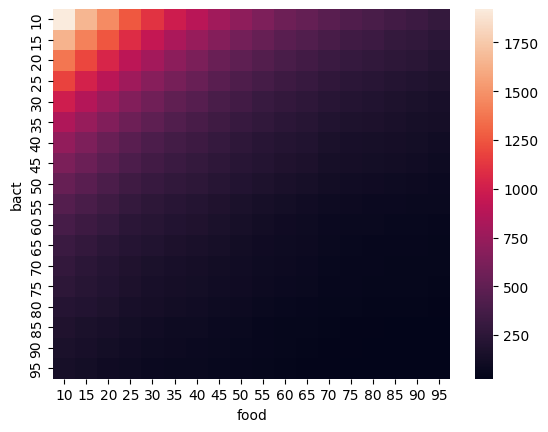

In [178]:
pmc100_matr = eval_len_for_two_bounds(pmc100, food_bounds = bounds[2:], bact_bounds = bounds[2:])
sns.heatmap(pmc100_matr)

<Axes: xlabel='food', ylabel='bact'>

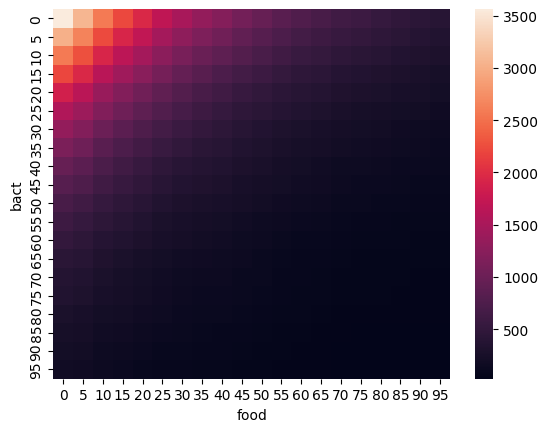

In [179]:
pmc100_matr = eval_len_for_two_bounds(pmc100, food_bounds = bounds, bact_bounds = bounds)
sns.heatmap(pmc100_matr)

<Axes: xlabel='food', ylabel='bact'>

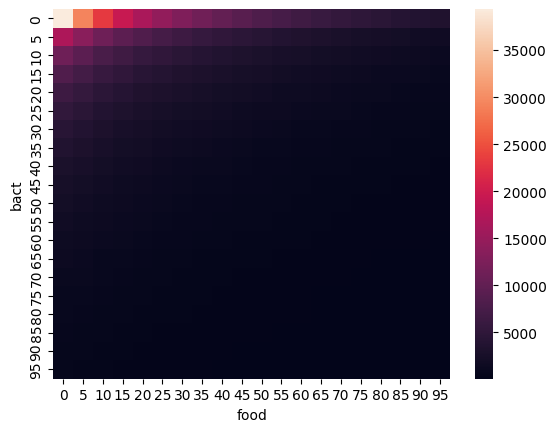

In [180]:
pmc95_matr = eval_len_for_two_bounds(pmc95, food_bounds = bounds, bact_bounds = bounds)
sns.heatmap(pmc95_matr)

- откорректировать словари, ускорить первичную разметку

- посмотреть статьи с гигантским количеством совпадений по бактериям/еде

- запустить NER и поиск зависимостей (посмотреть зависимость количества совместных упоминаний и наличия связи между понятиями)

- провести оценку релевантности статей (руками и не руками) (разработать какой-то индекс, посмотреть, что есть)




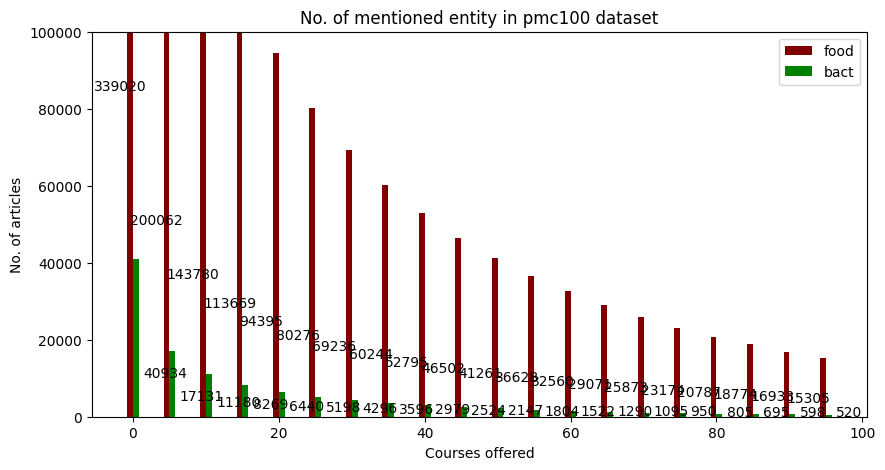

In [51]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(bounds-0.4, pmc100_food_bounds, color ='maroon',
        width = 0.8, label='food')
plt.bar(bounds+0.4, pmc100_bact_bounds, color ='green',
        width = 0.8, label='bact')

plt.xlabel("Courses offered")
plt.ylabel("No. of articles")
plt.title("No. of mentioned entity in pmc100 dataset")
plt.legend()
plt.ylim([0, 100_000])
addlabels(bounds - 0.4, pmc100_food_bounds, shift = -5)
addlabels(bounds + 0.4, pmc100_bact_bounds, shift = 1)

plt.show()

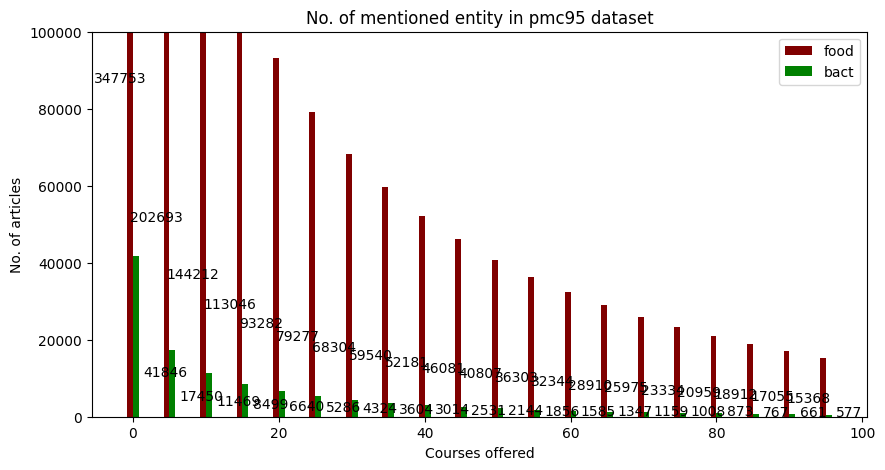

In [52]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(bounds-0.4, pmc95_food_bounds, color ='maroon',
        width = 0.8, label='food')
plt.bar(bounds+0.4, pmc95_bact_bounds, color ='green',
        width = 0.8, label='bact')

plt.xlabel("Courses offered")
plt.ylabel("No. of articles")
plt.title("No. of mentioned entity in pmc95 dataset")
plt.legend()
plt.ylim([0, 100_000])
addlabels(bounds - 0.4, pmc95_food_bounds, shift = -5)
addlabels(bounds + 0.4, pmc95_bact_bounds, shift = 1)

plt.show()

In [ ]:
u = set(pmc95.text_id.values).union(set(pmc100.text_id.values))
inters = set(pmc95.text_id.values).intersection(set(pmc100.text_id.values))

In [ ]:
len(u) - (pmc95.text_id.nunique() + pmc100.text_id.nunique())

0

In [ ]:
pmc95.text_id.nunique() - len(pmc95)

-13

In [ ]:
pmc100.text_id.nunique() - len(pmc100)

-8

### Gut labeling

In [108]:
import json
import os
from modules.functions import extract_text_from_json
from modules.entity_finder_class import (
    ComplexPatternFinder, 
    EntityMatcher
)
from modules.constants_and_paths import (
    path_to_save as path_to_jsons,
    ignorance_sec_types,
    food_list,
    bacteria_list,
    csv_path,
)

In [109]:

{k:'' for k in check_sec_types}

{'TITLE': '', 'ABSTRACT': ''}

In [131]:
def extract_text_from_json_by_sections(json_data, check_sec_types):
    all_text = ''
    for document in json_data.get('documents', []):
        for passage in document.get('passages', []):
            sec_type = passage.get('infons', {}).get('section_type', '')
            if sec_type in check_sec_types:
                all_text += passage.get('text', '') + "\n"
    return all_text

In [145]:
gut_list = ['gut', 'digestive', 'intestine','intestines', 'intestinal', 'digest']
micro_list = ['microbiota', 'microbiome']
digest_list = ['digestive']
intest_list = ['intestine', 'intestinal']

indicies = ["0" + str(i) for i in range(95,25,-5)]
indicies.insert(0, "100")
all_check_sec_types = ['TITLE', 'ABSTRACT']

In [142]:
em = EntityMatcher()
# Создание паттернов для матчера
em.create_pattern_dict("GUT", gut_list)
em.create_pattern_dict("BIOME", micro_list)
em.lemmatize_all_pattern_entities()

100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.50it/s]


In [143]:
em.pattern_dict

{'GUT': ['gut',
  'digestive',
  'intestine',
  'intestines',
  'intestinal',
  'digest'],
 'BIOME': ['microbiota', 'microbiome']}

In [125]:
em.entity_ids

{'GUT': 1, 'BIOME': 3}

In [144]:
check_sec_types

['TITLE', 'ABSTRACT']

In [ ]:
len_text = len(cur_extracted_abstract)
if len_text > 1_000_000:
    for i in range(len_text//1_000_000 + ((len_text % 1_000_000)>0)):
        cpf.label_full_text_spacy(text=cur_extracted_abstract[i:i+999_999], text_id=pmcid)
else:
    cpf.label_full_text_spacy(text=cur_extracted_abstract, text_id=pmcid)
    

In [147]:
for pmc_dir_id in indicies:
    cpf = ComplexPatternFinder(entity_matcher=em)
    cpf2 = ComplexPatternFinder(entity_matcher=em)
    cur_json_path = path_to_jsons.format(DIR_ID=pmc_dir_id)
    print("\n ----------------------------------------------\n")
    print("save path ", cur_json_path)
    print("\n")
    
    
    refd_json_lst = os.listdir(cur_json_path)
    data_jsons = {}

    for infile_refd in tqdm(refd_json_lst):
        pmcid = infile_refd.split("_")[0]
        with open(f"{cur_json_path}{infile_refd}") as f:
            # all_texts[pmcid] = extract_text_from_json(json.load(f), ignorance_sec_types)
            data_json = json.load(f)
            cur_extracted_abstract = extract_text_from_json_by_sections(data_json, check_sec_types[1:])
            len_text = len(cur_extracted_abstract)
            if len_text > 1_000_000:
                print(f"---------- {pmcid} has TOO LONG ABSTRACT -------------")
                continue
            cpf.label_full_text_spacy(text=cur_extracted_abstract, text_id=pmcid)

            cur_extracted_title = extract_text_from_json_by_sections(data_json, check_sec_types[:1])
            len_text = len(cur_extracted_title)
            cpf2.label_full_text_spacy(text=cur_extracted_title, text_id=pmcid)
                
    pd.DataFrame(cpf.num_labels_for_text).to_csv(csv_path.format(DIR_ID=pmc_dir_id)+'_ABSTRACT'+".csv")
    pd.DataFrame(cpf2.num_labels_for_text).to_csv(csv_path.format(DIR_ID=pmc_dir_id)+'_TITLE'+".csv")
    


 ----------------------------------------------

save path  /home/echukhrova/nlp_project/PMC_Dataset/refd_PMC095XXXX/




 23%|█████████████████                                                         | 100600/435344 [09:05<50:09, 111.23it/s]

---------- PMC9615638 has TOO LONG ABSTRACT -------------


 49%|████████████████████████████████████▌                                     | 215358/435344 [22:35<23:04, 158.84it/s]


KeyboardInterrupt: 

In [114]:
indicies

['100',
 '095',
 '090',
 '085',
 '080',
 '075',
 '070',
 '065',
 '060',
 '055',
 '050',
 '045',
 '040',
 '035',
 '030']